# Data Scanning and Preprocessing

## Importing needed libraries

In [448]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  accuracy_score, r2_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Importing the data

In [304]:
data = pd.read_csv("total_crime_data.csv")
data

Financial Year  Financial Quarter         Force Name  \
0             2012/13                  1       Action Fraud   
1             2012/13                  1  Avon and Somerset   
2             2012/13                  1  Avon and Somerset   
3             2012/13                  1  Avon and Somerset   
4             2012/13                  1  Avon and Somerset   
...               ...                ...                ...   
258900        2023/24                  1          Wiltshire   
258901        2023/24                  1          Wiltshire   
258902        2023/24                  1       Action Fraud   
258903        2023/24                  1              CIFAS   
258904        2023/24                  1         UK Finance   

                                      Offence Description  \
0                 Fraud offences recorded by Action Fraud   
1        Abandoning child under two years (outcomes only)   
2                          Absconding from lawful custody   
3       Abuse of children through prostitution and por...   
4           Abuse of position of trust of a sexual nature   
...                                                   ...   
258900                                   Violent disorder   
258901                                           Wildlife   
258902            Fraud offences recorded by Action Fraud   
258903                   Fraud offences recorded by CIFAS   
258904              Fraud offences recorded by UK Finance   

                               Offence Group  \
0                             Fraud offences   
1                Violence against the person   
2       Miscellaneous crimes against society   
3                            Sexual offences   
4                            Sexual offences   
...                                      ...   
258900                 Public order offences   
258901  Miscellaneous crimes against society   
258902                        Fraud offences   
258903                        Fraud offences   
258904                        Fraud offences   

                            Offence Subgroup Offence Code  Number of Offences  
0                        Fraud: Action Fraud           AF               20323  
1                    Violence without injury           12                   0  
2       Miscellaneous crimes against society           80                   1  
3                      Other sexual offences           71                   0  
4                      Other sexual offences           73                   3  
...                                      ...          ...                 ...  
258900                 Public order offences          62A                   0  
258901  Miscellaneous crimes against society           96                   5  
258902                   Fraud: Action Fraud           AF               79986  
258903                          Fraud: CIFAS        CIFAS               81062  
258904                     Fraud: UK Finance   UK Finance              117875  

[258905 rows x 8 columns]

In [501]:
data.head(5)

Financial Year  Financial Quarter         Force Name  \
0        2012/13                  1       Action Fraud   
1        2012/13                  1  Avon and Somerset   
2        2012/13                  1  Avon and Somerset   
3        2012/13                  1  Avon and Somerset   
4        2012/13                  1  Avon and Somerset   

                                 Offence Description  \
0            Fraud offences recorded by Action Fraud   
1   Abandoning child under two years (outcomes only)   
2                     Absconding from lawful custody   
3  Abuse of children through prostitution and por...   
4      Abuse of position of trust of a sexual nature   

                          Offence Group                      Offence Subgroup  \
0                        Fraud offences                   Fraud: Action Fraud   
1           Violence against the person               Violence without injury   
2  Miscellaneous crimes against society  Miscellaneous crimes against society   
3                       Sexual offences                 Other sexual offences   
4                       Sexual offences                 Other sexual offences   

  Offence Code  Number of Offences  
0           AF               20323  
1           12                   0  
2           80                   1  
3           71                   0  
4           73                   3

In [61]:
data.tail(100)

Financial Year  Financial Quarter    Force Name  \
258805        2023/24                  1     Wiltshire   
258806        2023/24                  1     Wiltshire   
258807        2023/24                  1     Wiltshire   
258808        2023/24                  1     Wiltshire   
258809        2023/24                  1     Wiltshire   
...               ...                ...           ...   
258900        2023/24                  1     Wiltshire   
258901        2023/24                  1     Wiltshire   
258902        2023/24                  1  Action Fraud   
258903        2023/24                  1         CIFAS   
258904        2023/24                  1    UK Finance   

                                      Offence Description  \
258805                             Corporate manslaughter   
258806  Criminal damage to a building other than a dwe...   
258807                      Criminal damage to a dwelling   
258808                       Criminal damage to a vehicle   
258809                  Cruelty to children/young persons   
...                                                   ...   
258900                                   Violent disorder   
258901                                           Wildlife   
258902            Fraud offences recorded by Action Fraud   
258903                   Fraud offences recorded by CIFAS   
258904              Fraud offences recorded by UK Finance   

                               Offence Group  \
258805           Violence against the person   
258806             Criminal damage and arson   
258807             Criminal damage and arson   
258808             Criminal damage and arson   
258809           Violence against the person   
...                                      ...   
258900                 Public order offences   
258901  Miscellaneous crimes against society   
258902                        Fraud offences   
258903                        Fraud offences   
258904                        Fraud offences   

                            Offence Subgroup Offence Code  Number of Offences  
258805                              Homicide          4.1                   0  
258806                       Criminal damage          58B                 156  
258807                       Criminal damage          58A                 277  
258808                       Criminal damage          58C                 359  
258809               Violence without injury          11A                  49  
...                                      ...          ...                 ...  
258900                 Public order offences          62A                   0  
258901  Miscellaneous crimes against society           96                   5  
258902                   Fraud: Action Fraud           AF               79986  
258903                          Fraud: CIFAS        CIFAS               81062  
258904                     Fraud: UK Finance   UK Finance              117875  

[100 rows x 8 columns]

In [62]:
data.shape

(258905, 8)

In [63]:
data.describe()

Financial Quarter  Number of Offences
count      258905.000000       258905.000000
mean            2.463031          229.901837
std             1.128399         1724.363276
min             1.000000         -268.000000
25%             1.000000            0.000000
50%             2.000000            9.000000
75%             3.000000           83.000000
max             4.000000       132693.000000

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258905 entries, 0 to 258904
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Financial Year       258905 non-null  object
 1   Financial Quarter    258905 non-null  int64 
 2   Force Name           258905 non-null  object
 3   Offence Description  258905 non-null  object
 4   Offence Group        258905 non-null  object
 5   Offence Subgroup     258905 non-null  object
 6   Offence Code         258905 non-null  object
 7   Number of Offences   258905 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 15.8+ MB


In [374]:
print("Sum of Missing values: \n", data.isnull().sum())

Sum of Missing values: 
 Financial Year         0
Financial Quarter      0
Force Name             0
Offence Description    0
Offence Group          0
Offence Subgroup       0
Offence Code           0
Number of Offences     0
dtype: int64


In [66]:
print("Sum of duplicated data is:", data.duplicated().sum())

Sum of duplicated data is: 0


In [211]:
print(data.columns)

Index(['Financial Year', 'Financial Quarter', 'Force Name',
       'Offence Description', 'Offence Group', 'Offence Subgroup',
       'Offence Code', 'Number of Offences'],
      dtype='object')


# Exploratory Data Analysis

In [216]:
# Function to filter the data
def filter_data(data, year=None, quarter=None, force=None):
    filtered_df = data.copy()
    
    if year:
        filtered_df = filtered_df[filtered_df['Financial Year'] == year]
    if quarter:
        filtered_df = filtered_df[filtered_df['Financial Quarter'] == quarter]
    if force:
        filtered_df = filtered_df[filtered_df['Force Name'] == force]
    
    return filtered_df

In [217]:
# Filter by year
filtered_by_force = filter_data(data, force= force )
print(f"Filtered by force:\n{filtered_by_force}")

Filtered by force:
       Financial Year  Financial Quarter  Force Name  \
134705        2017/18                  2  UK Finance   
134708        2017/18                  3  UK Finance   
134711        2017/18                  4  UK Finance   
157770        2018/19                  1  UK Finance   
157773        2018/19                  2  UK Finance   
157776        2018/19                  3  UK Finance   
157779        2018/19                  4  UK Finance   
181196        2019/20                  1  UK Finance   
181199        2019/20                  2  UK Finance   
181202        2019/20                  3  UK Finance   
181205        2019/20                  4  UK Finance   
204968        2020/21                  1  UK Finance   
204971        2020/21                  2  UK Finance   
204974        2020/21                  3  UK Finance   
204977        2020/21                  4  UK Finance   
228740        2021/22                  1  UK Finance   
228743        2021/22        

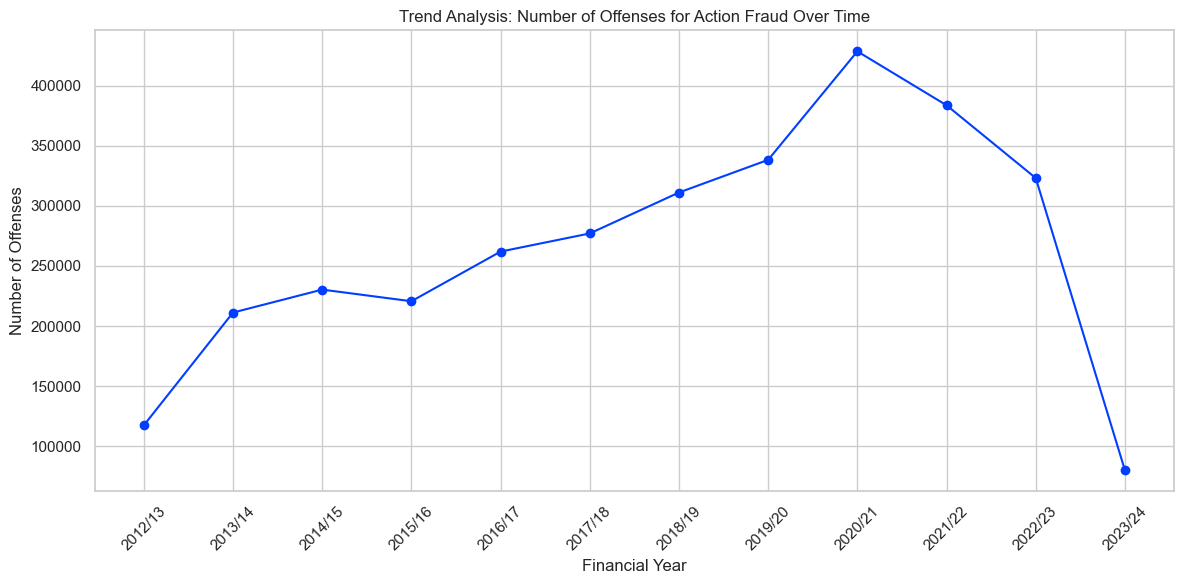

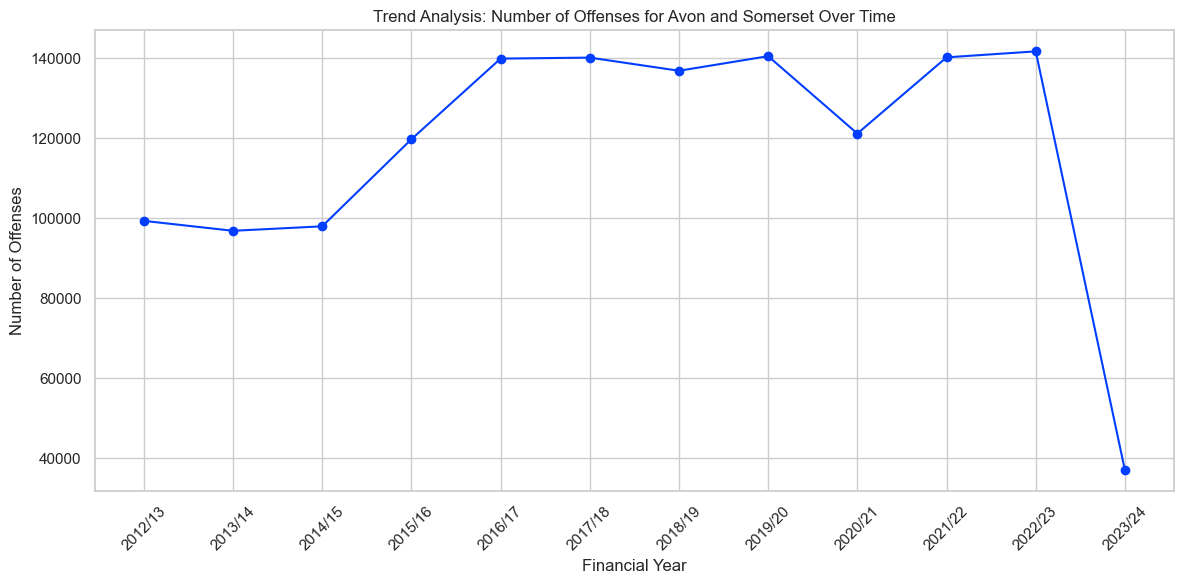

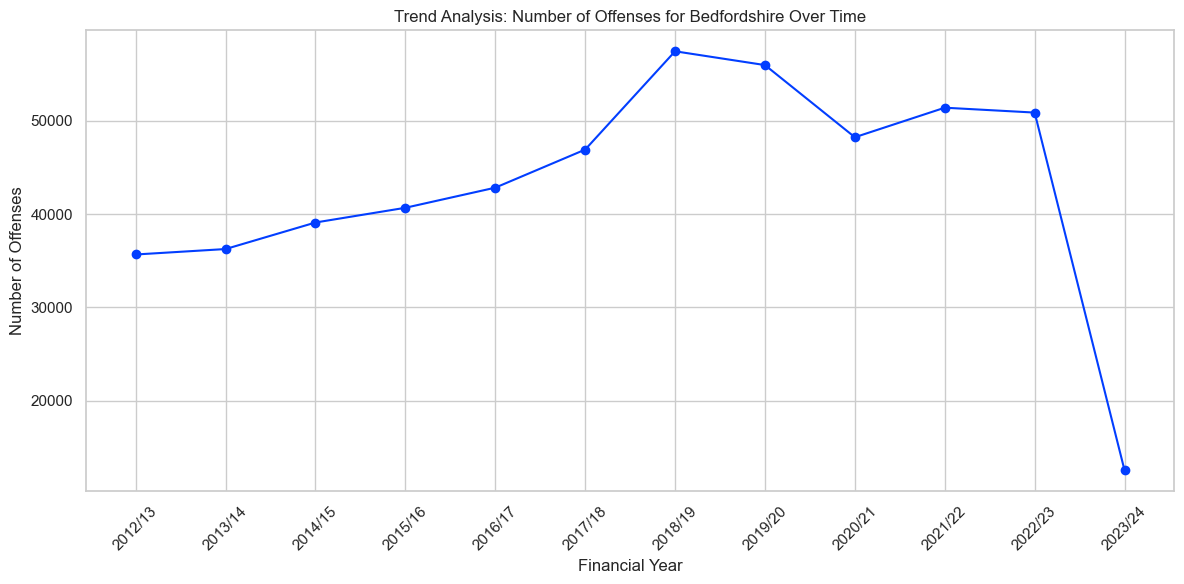

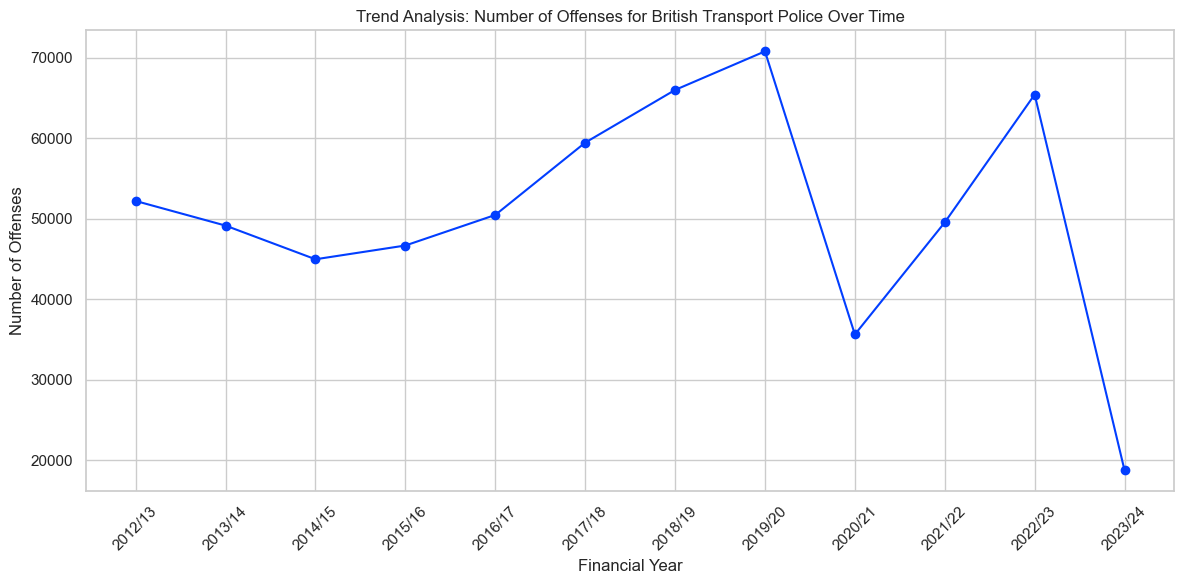

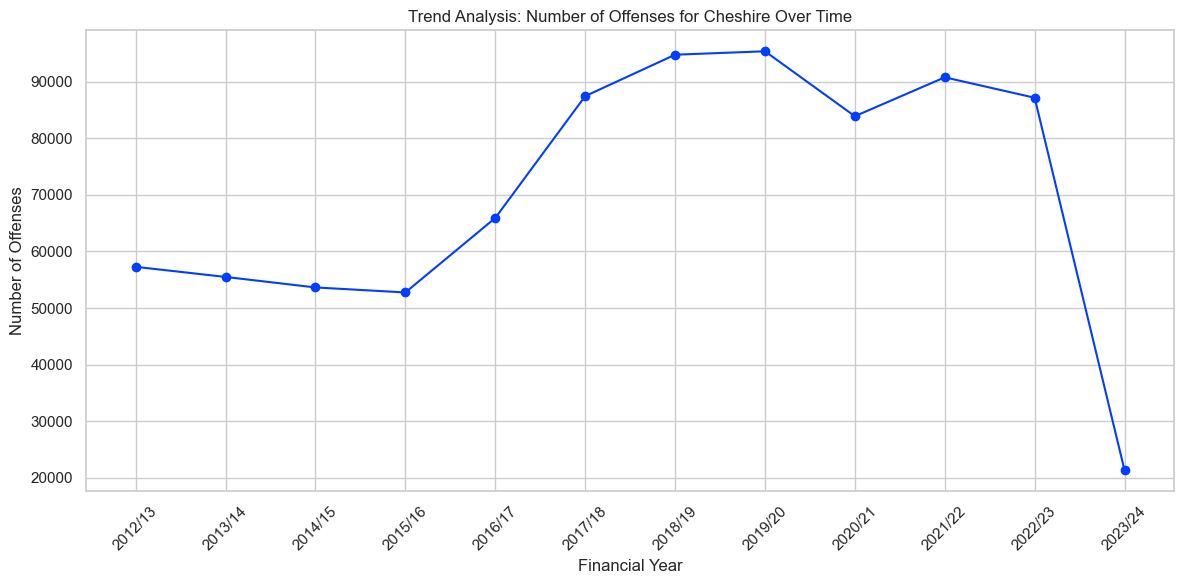

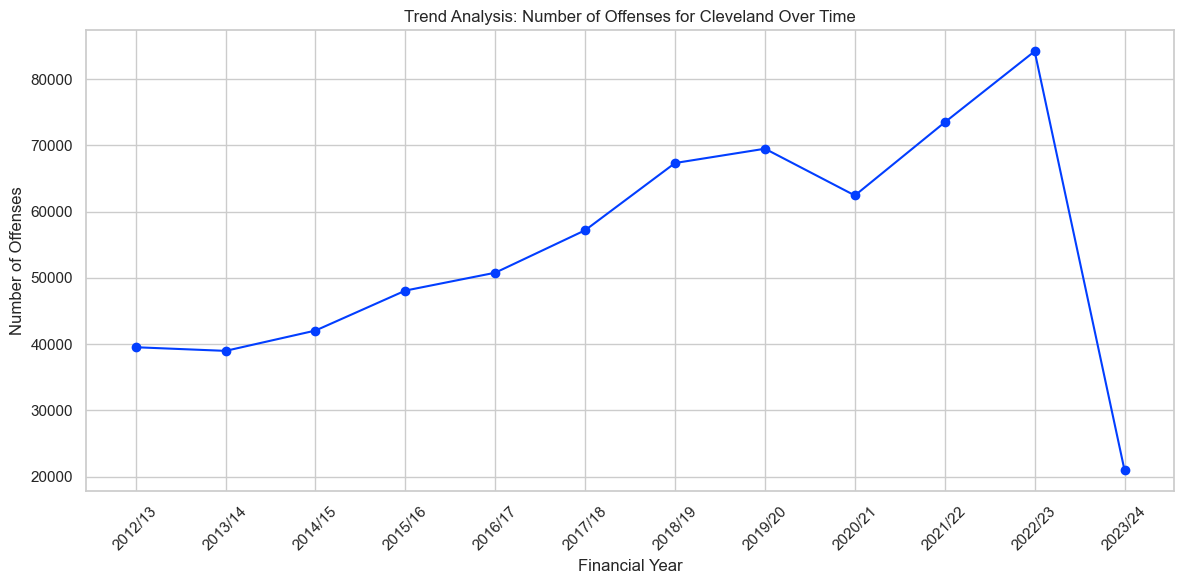

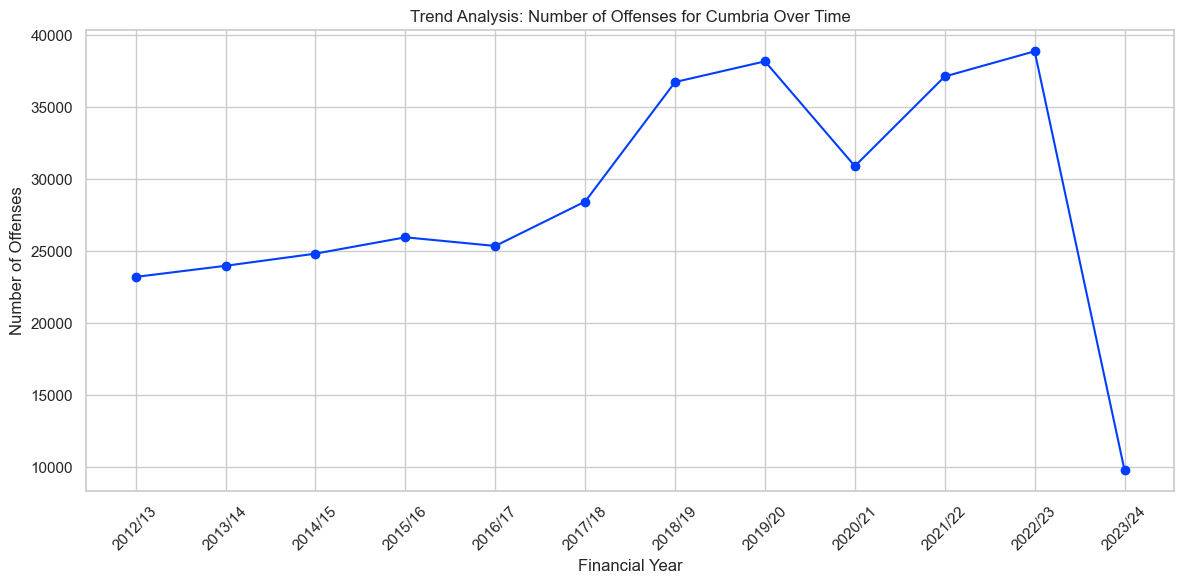

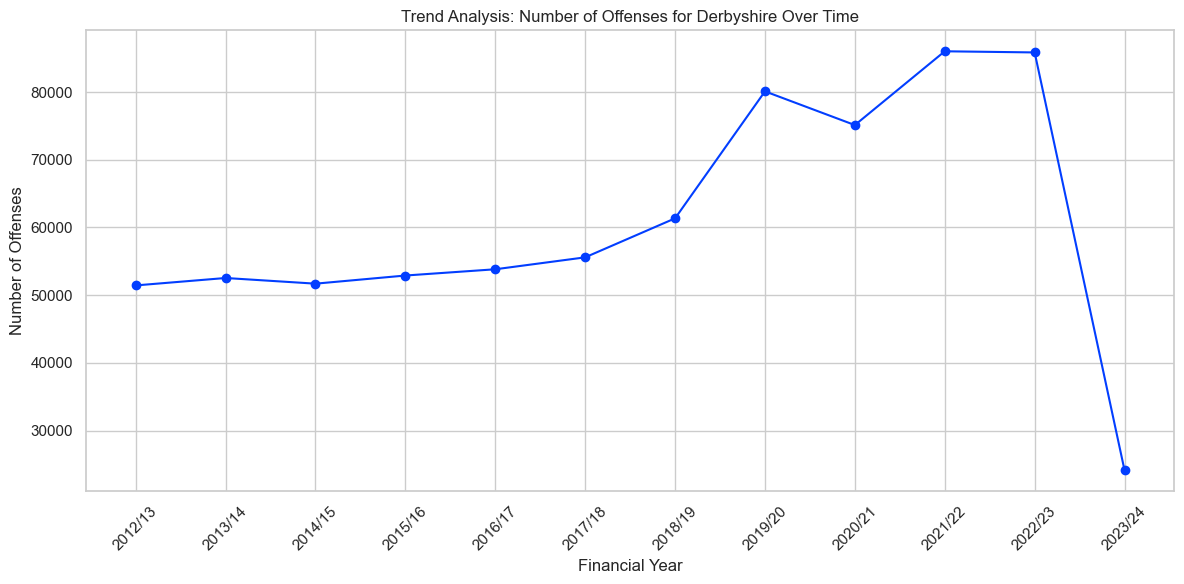

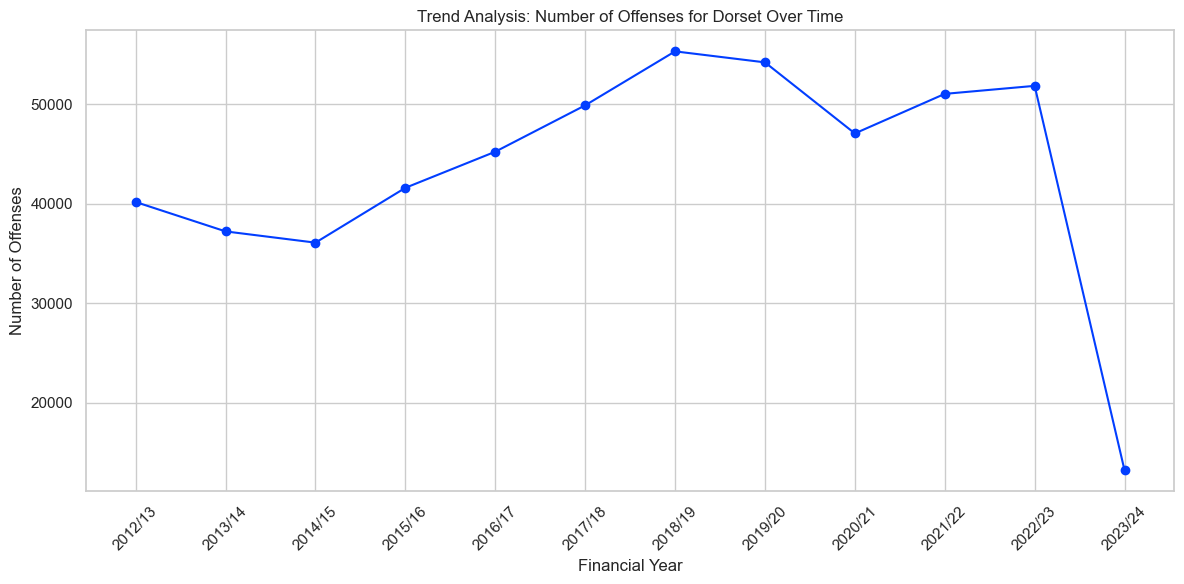

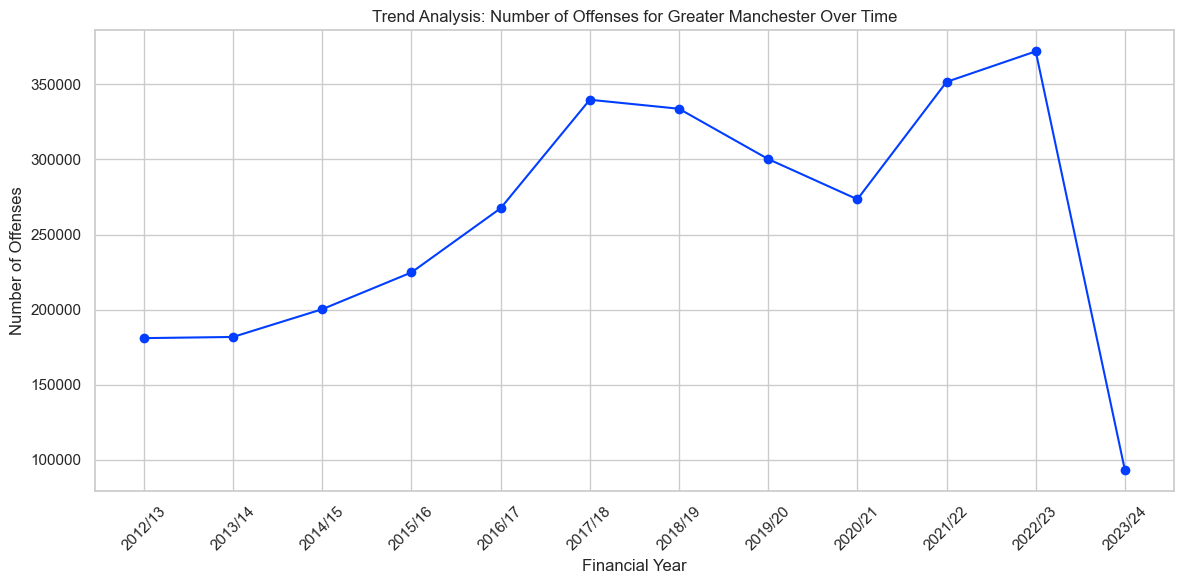

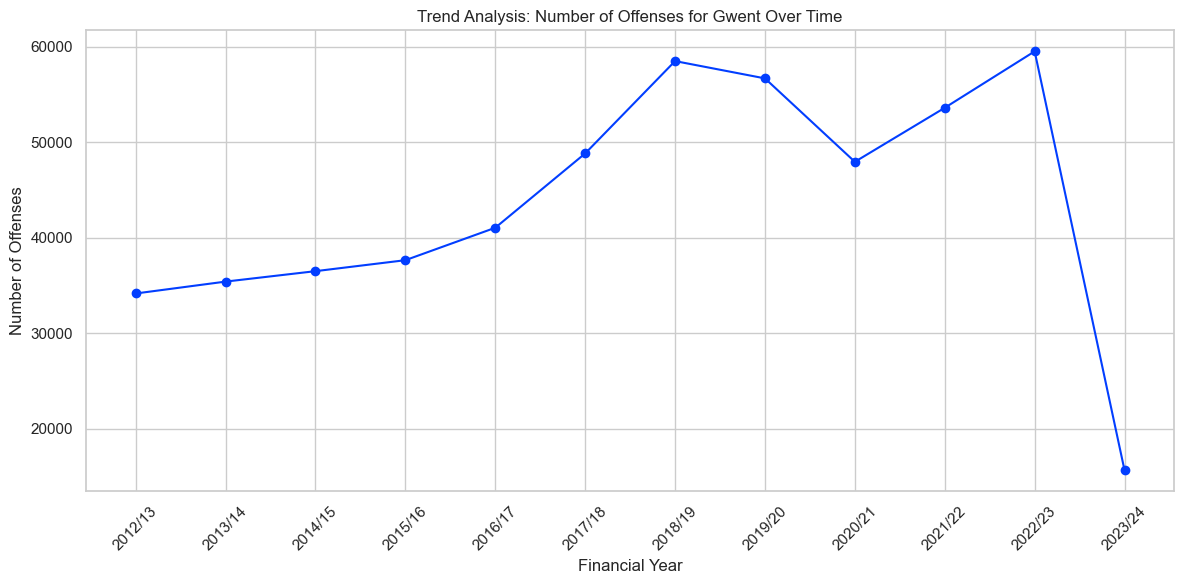

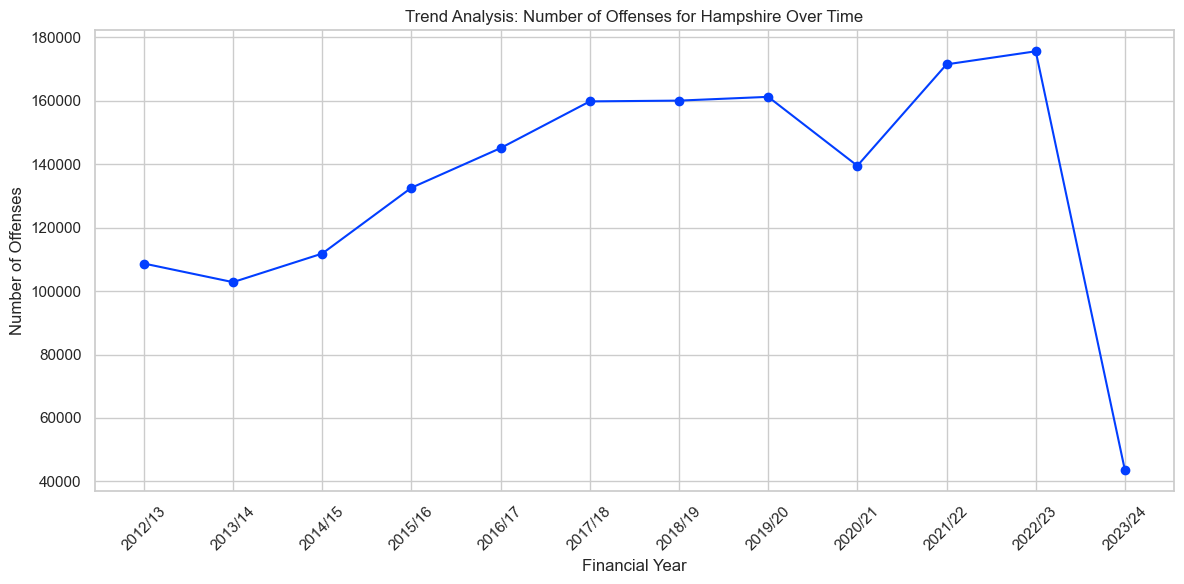

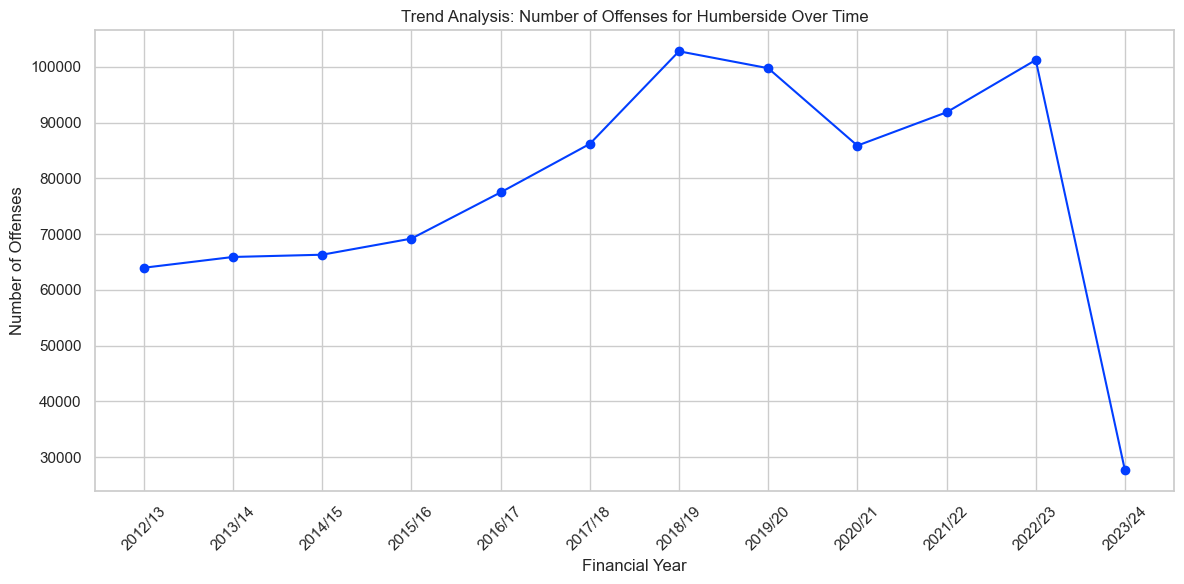

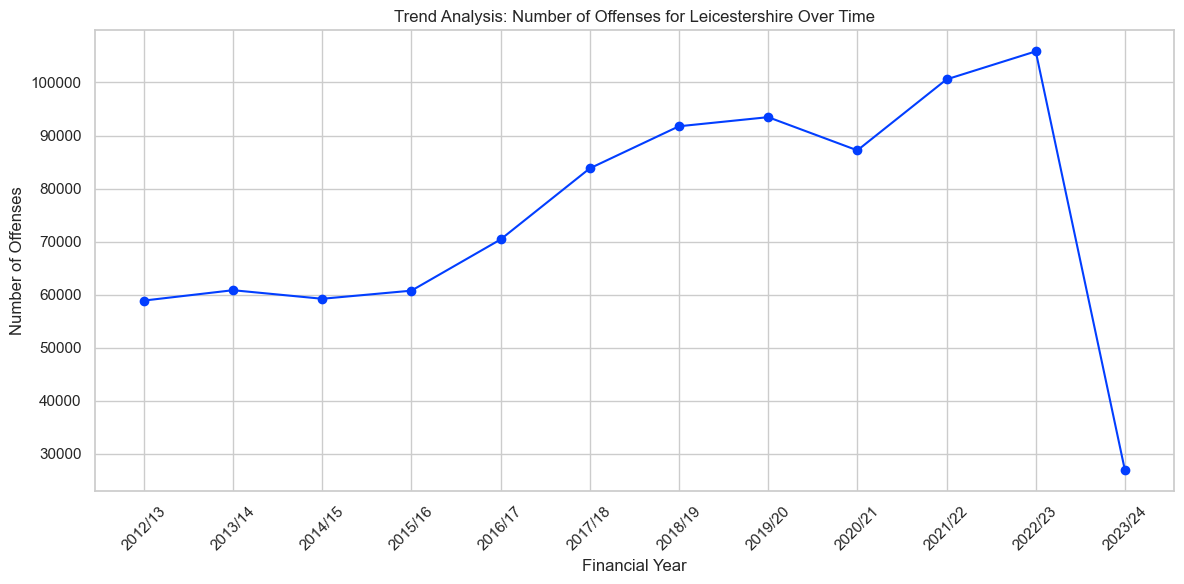

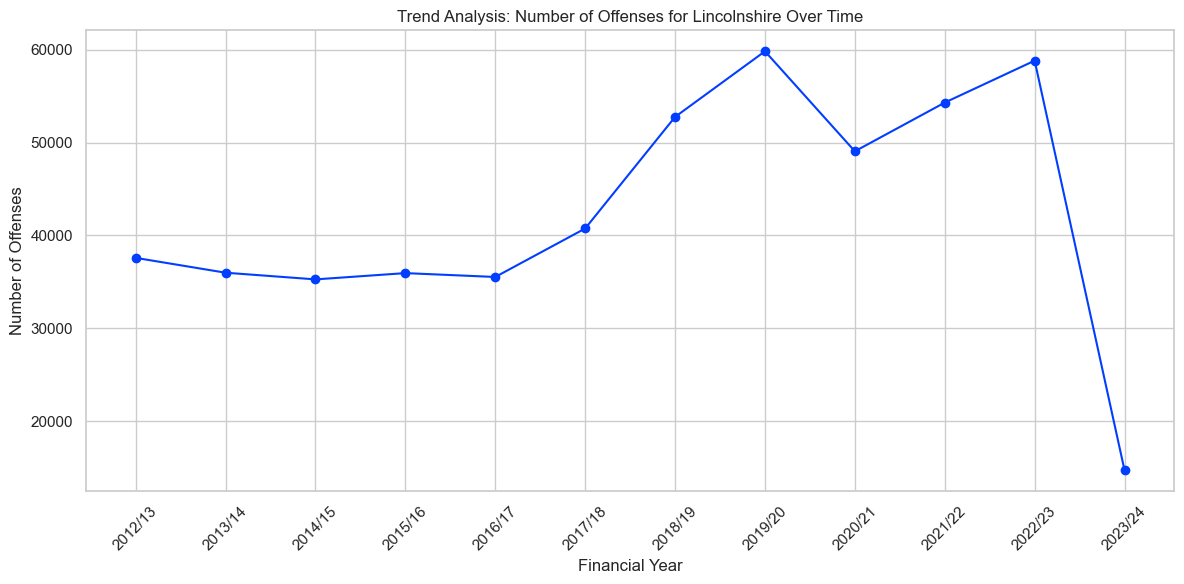

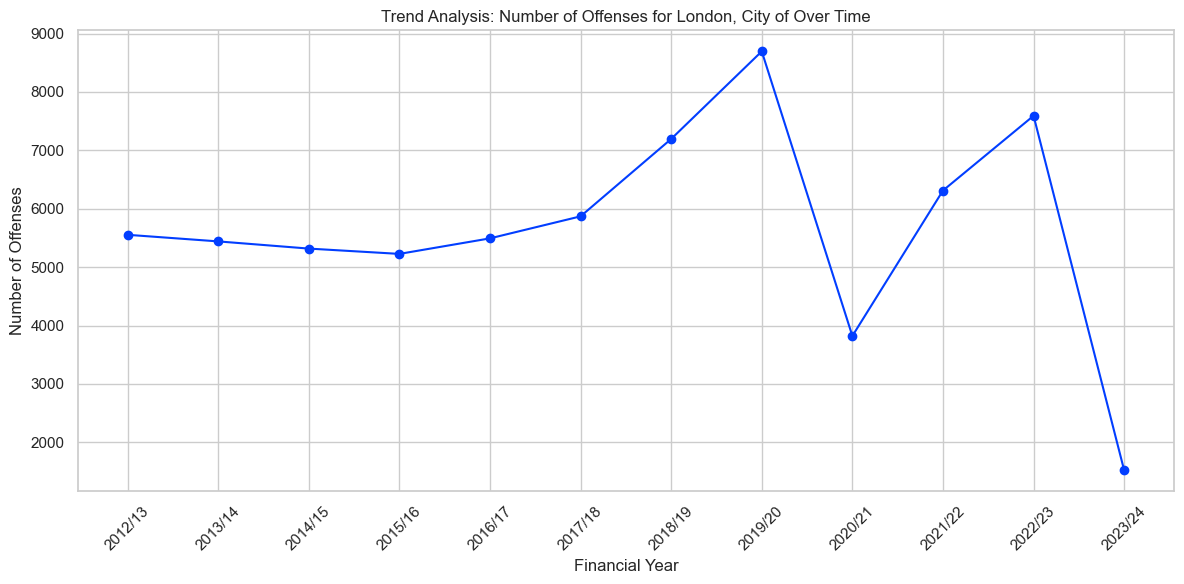

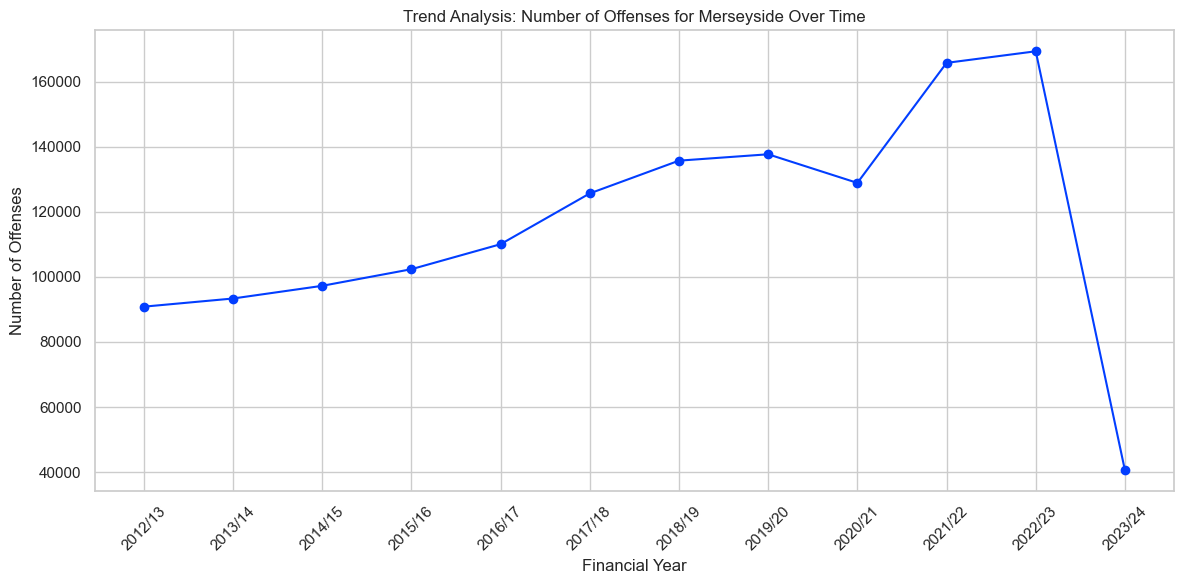

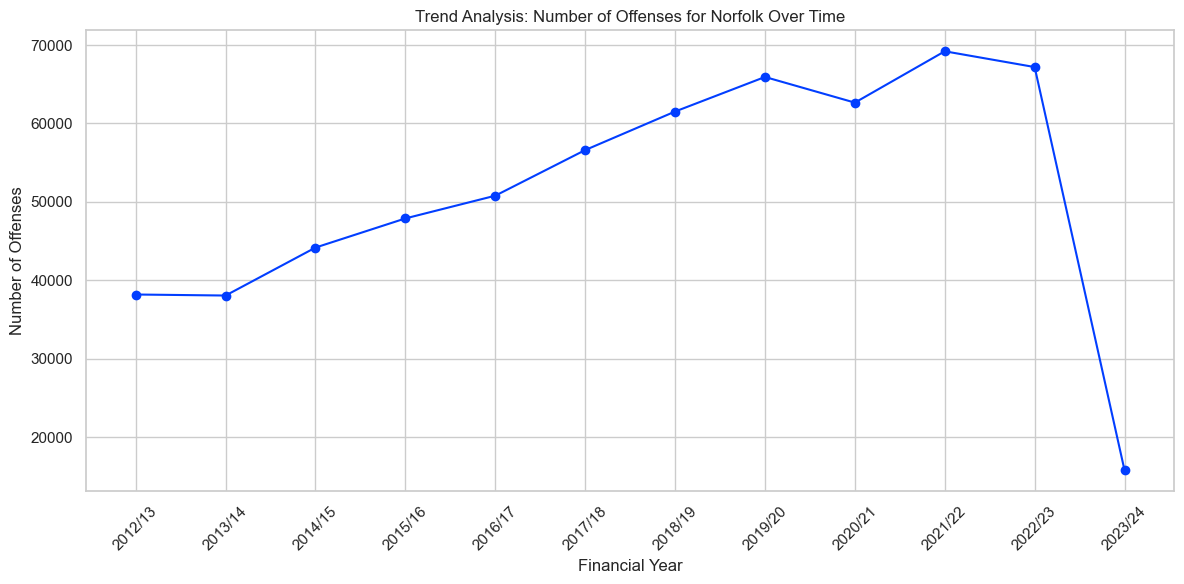

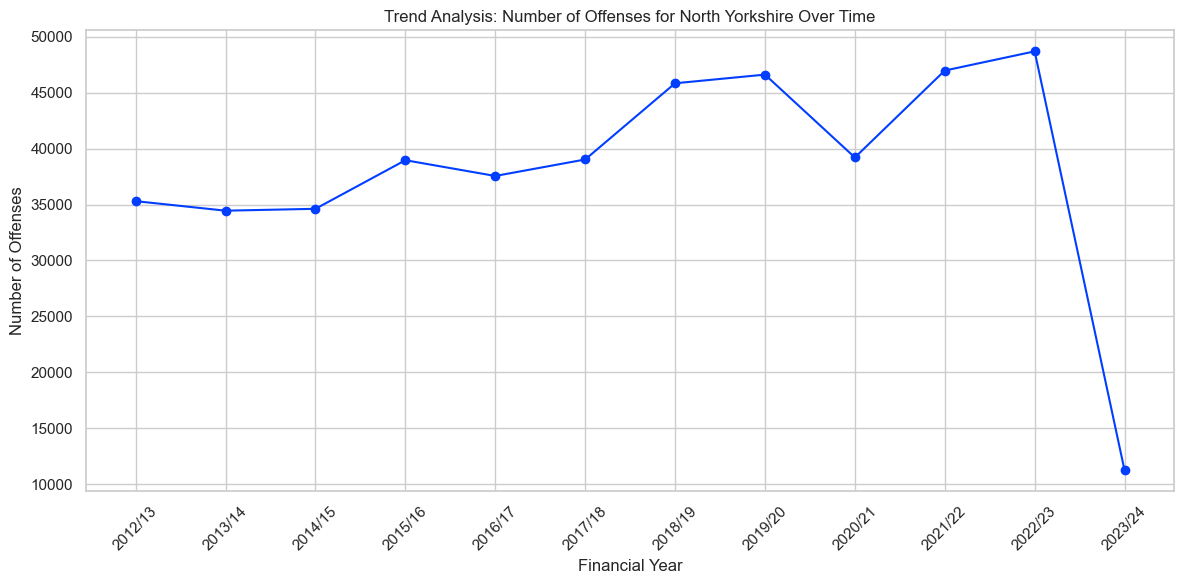

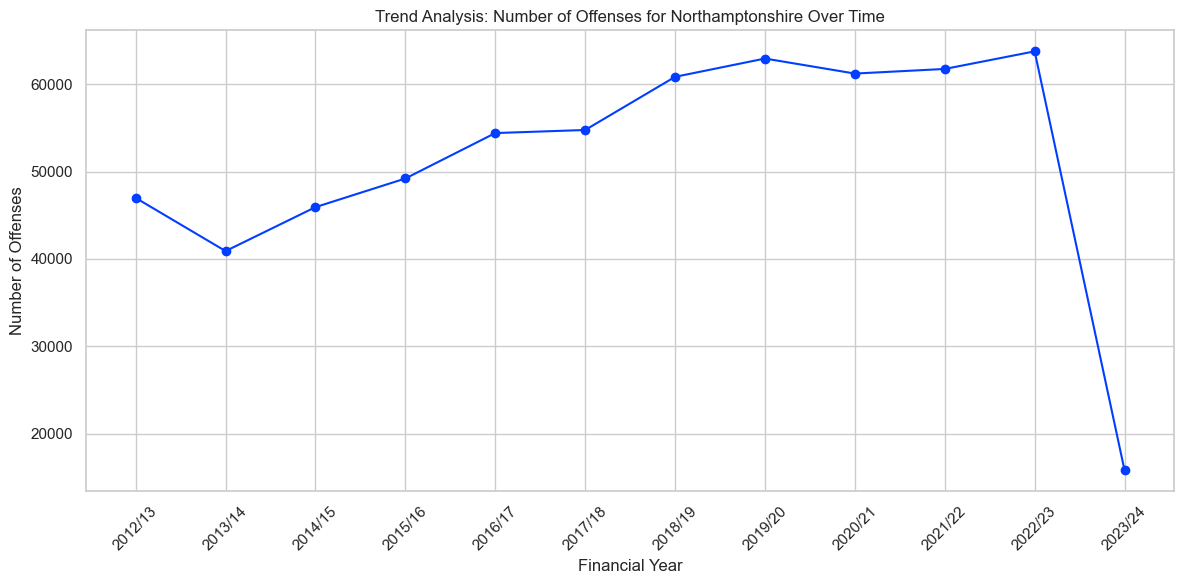

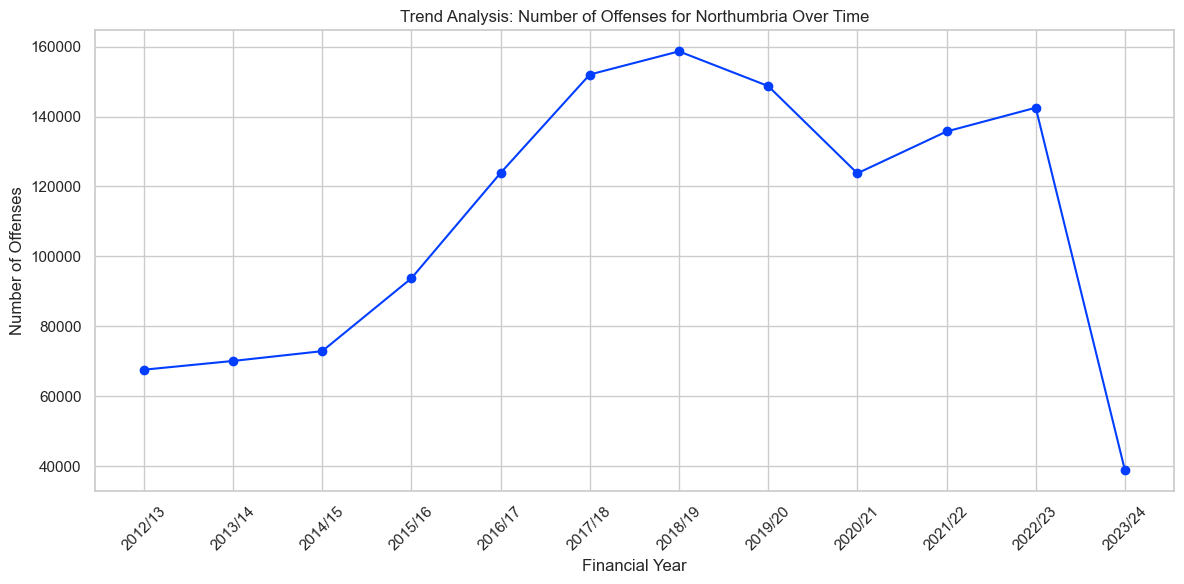

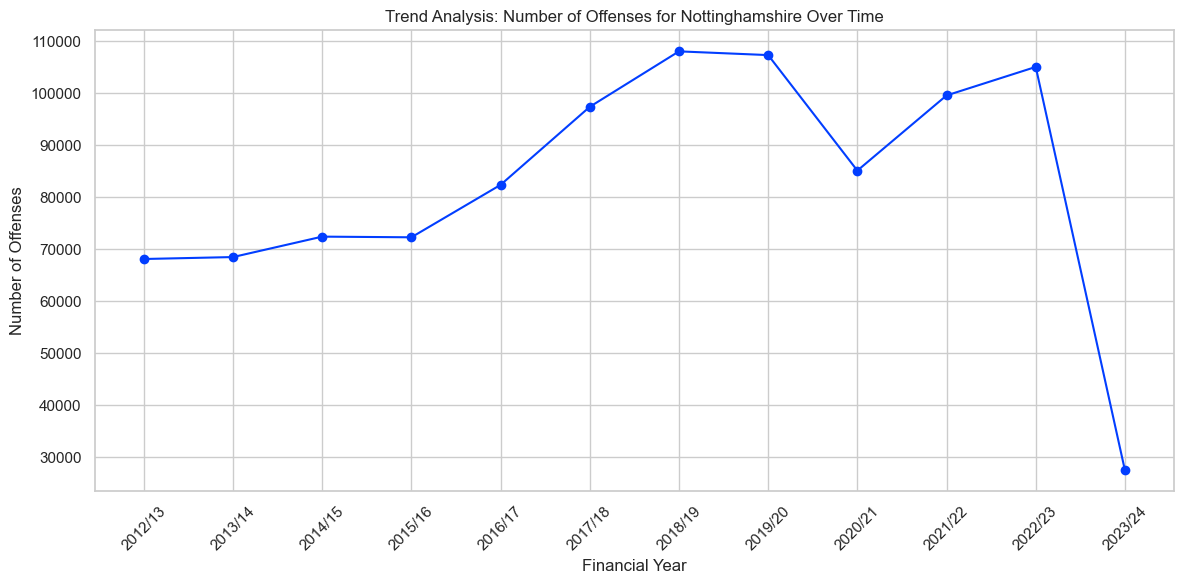

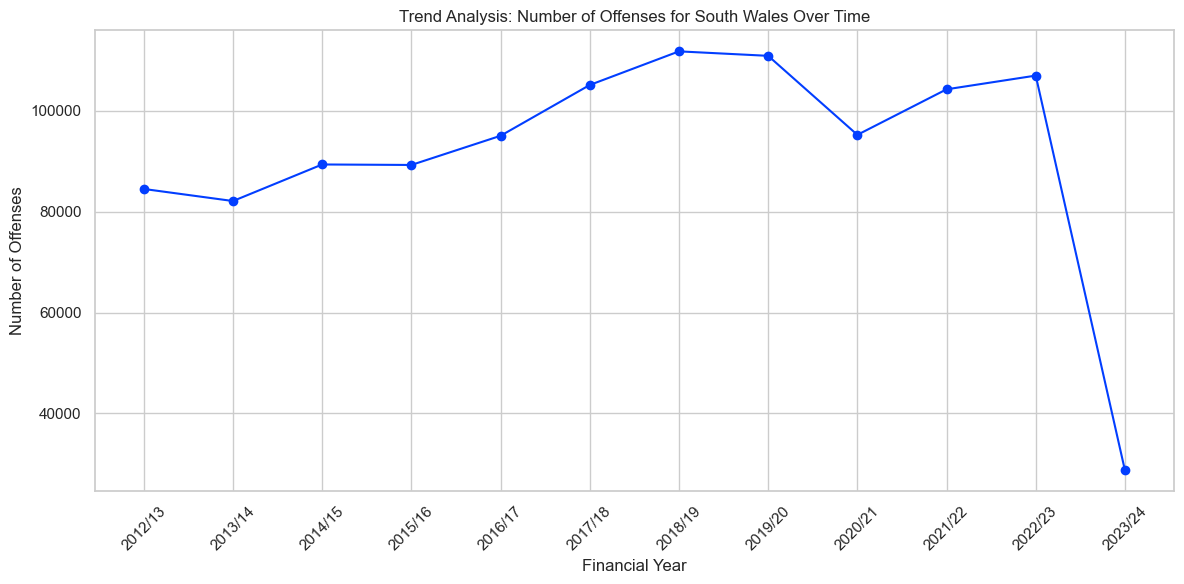

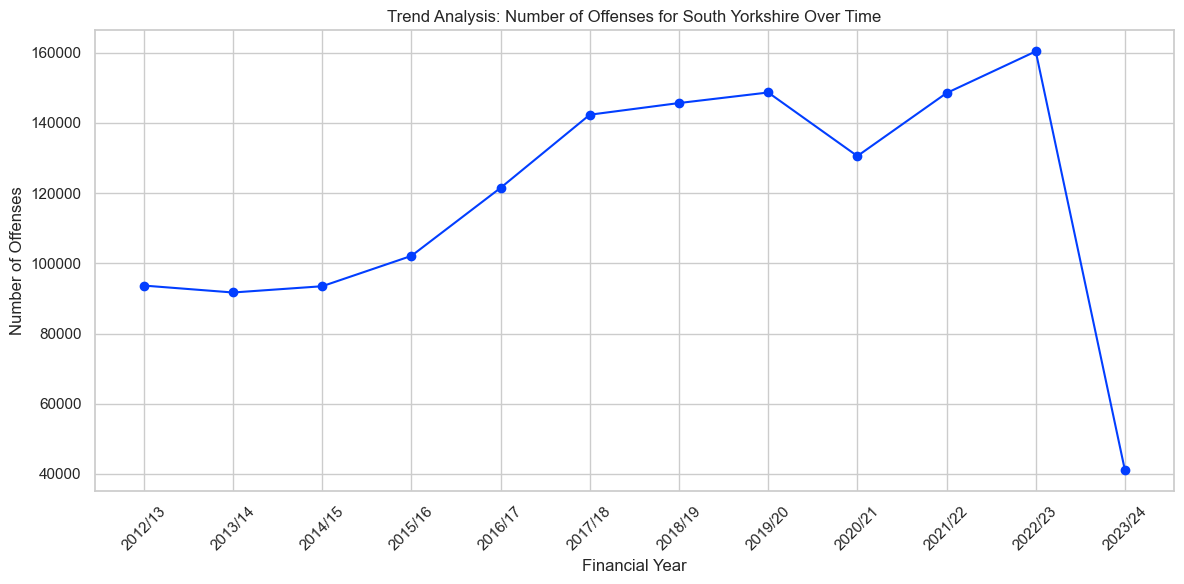

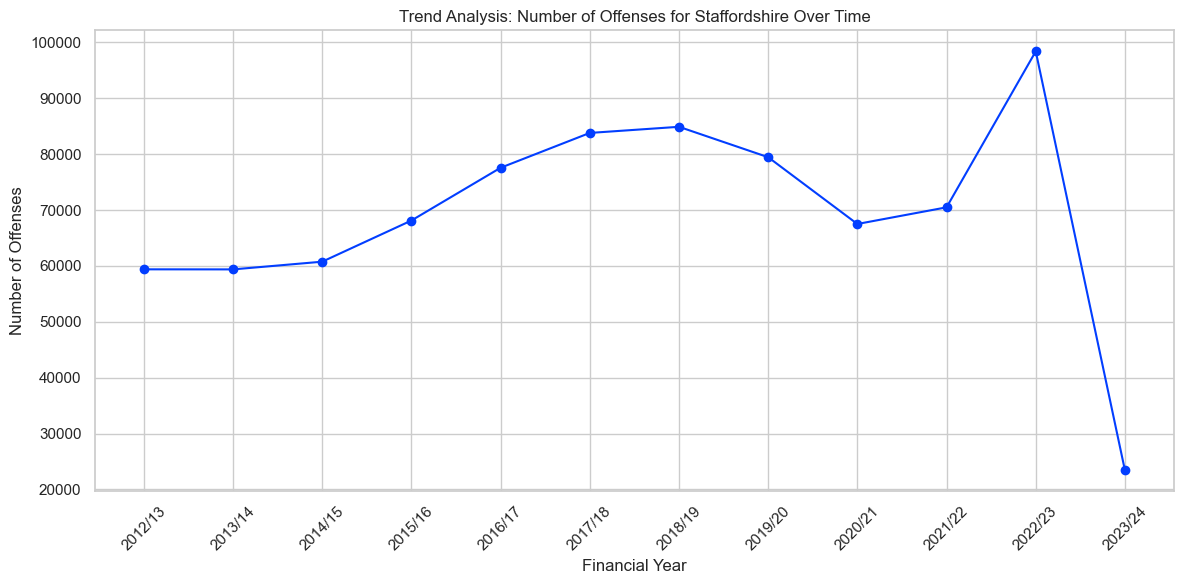

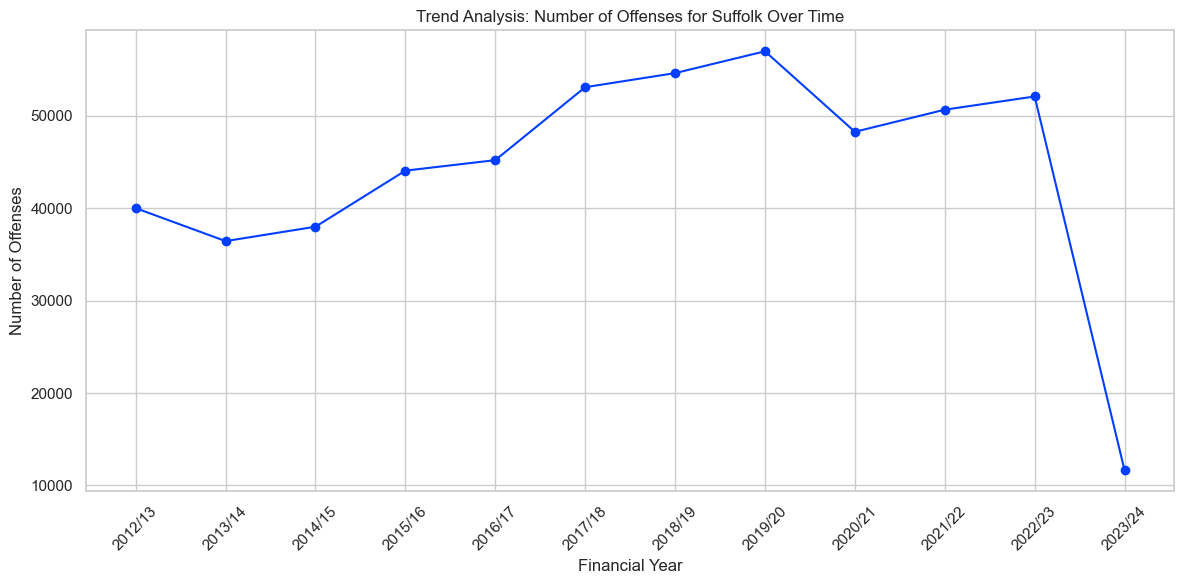

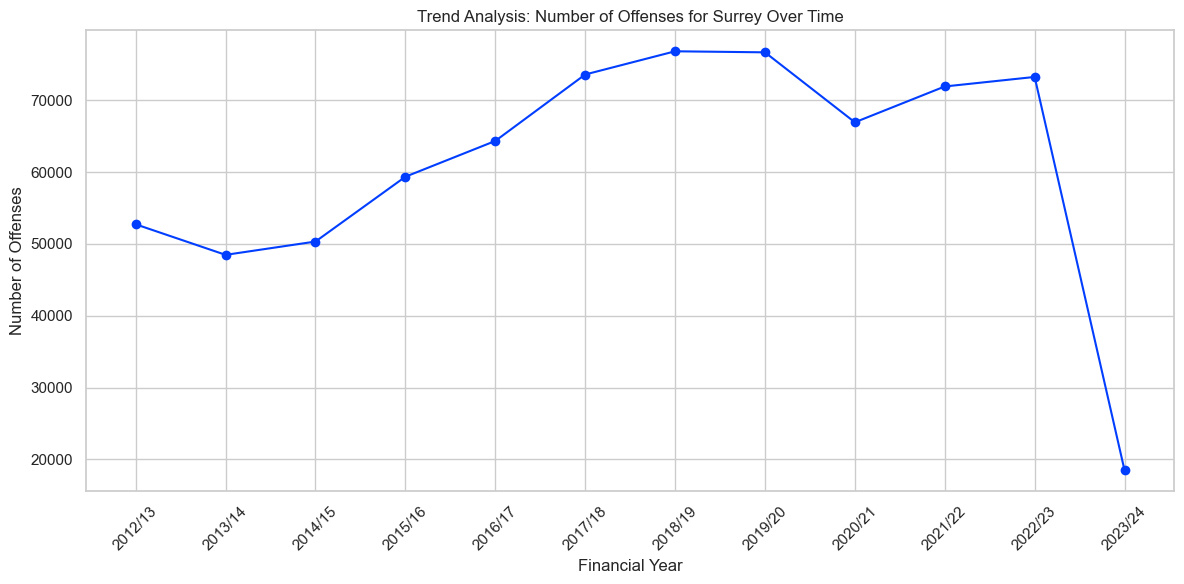

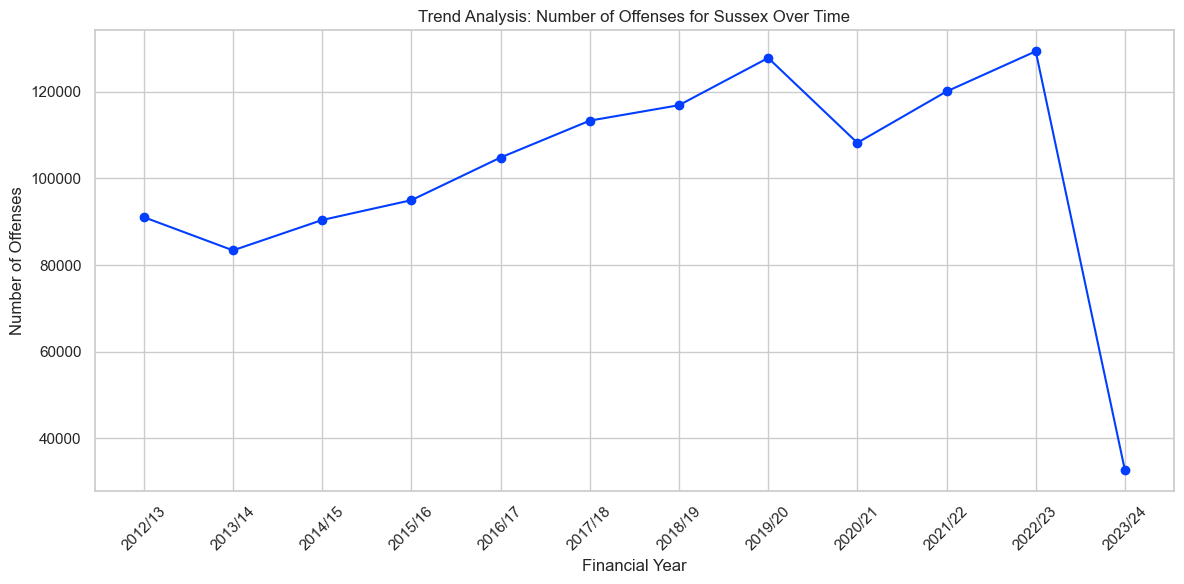

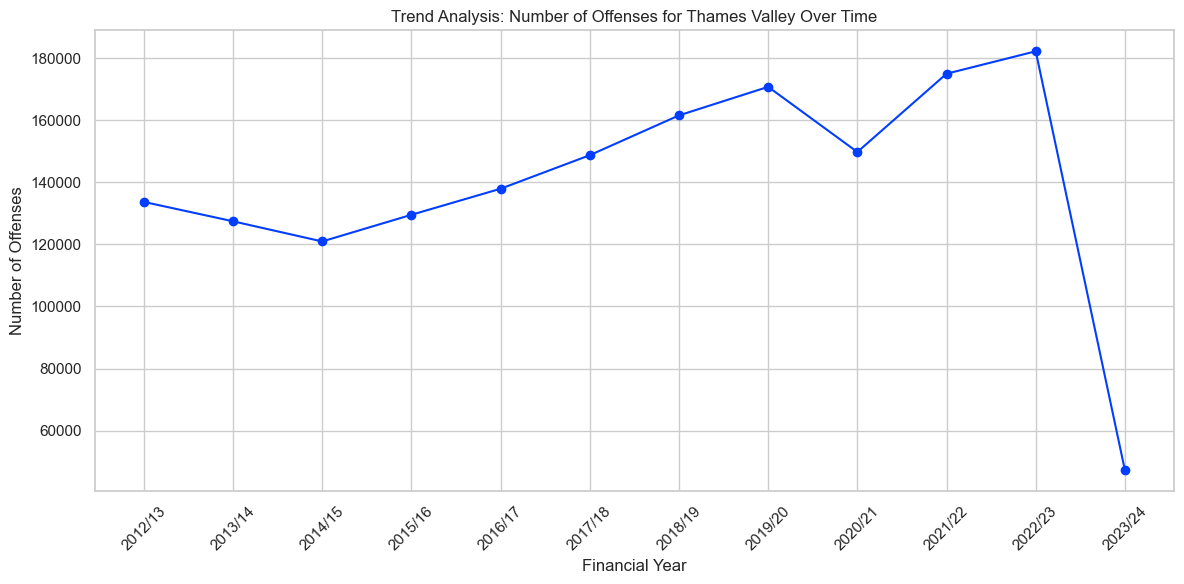

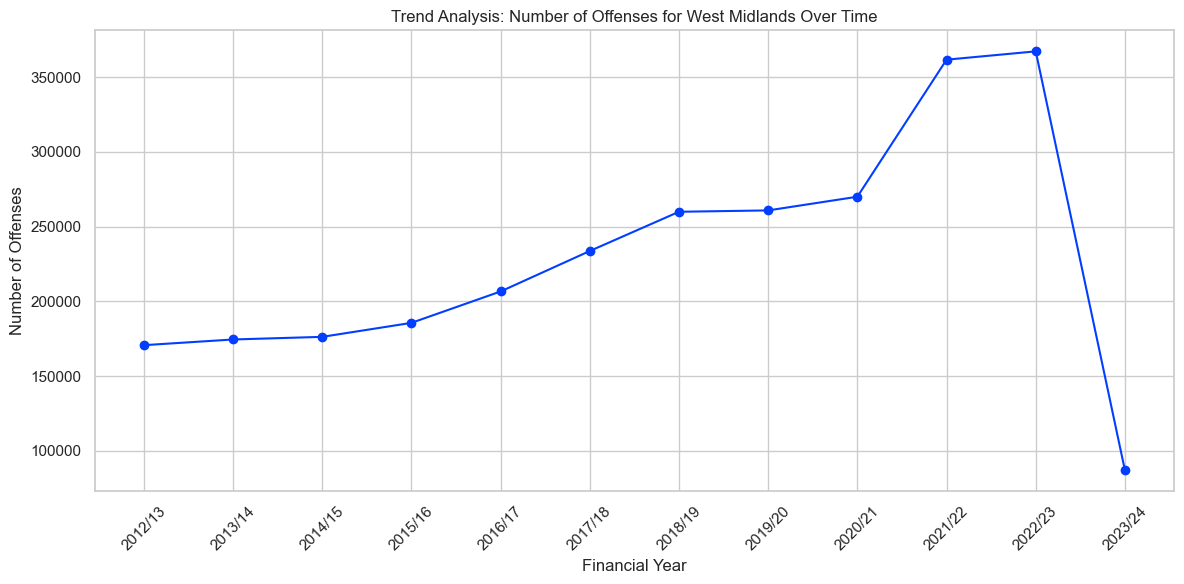

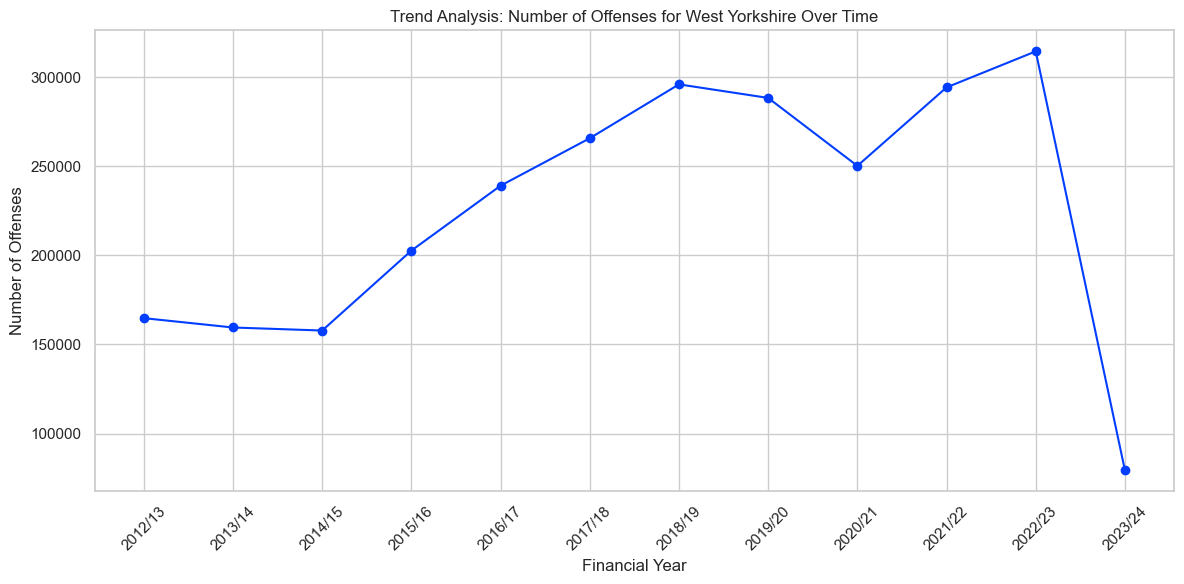

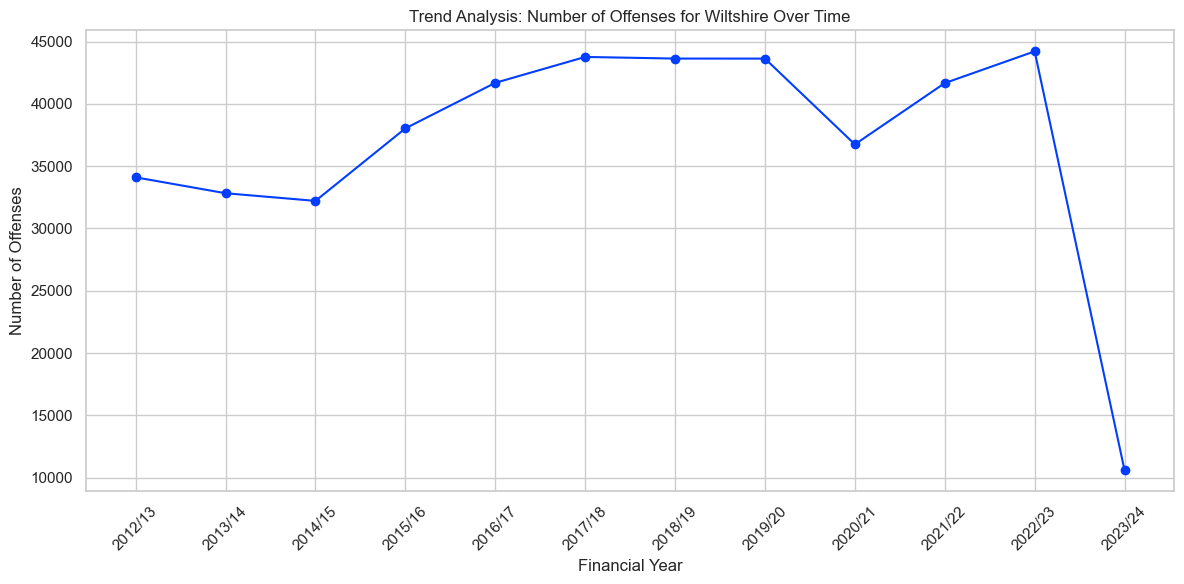

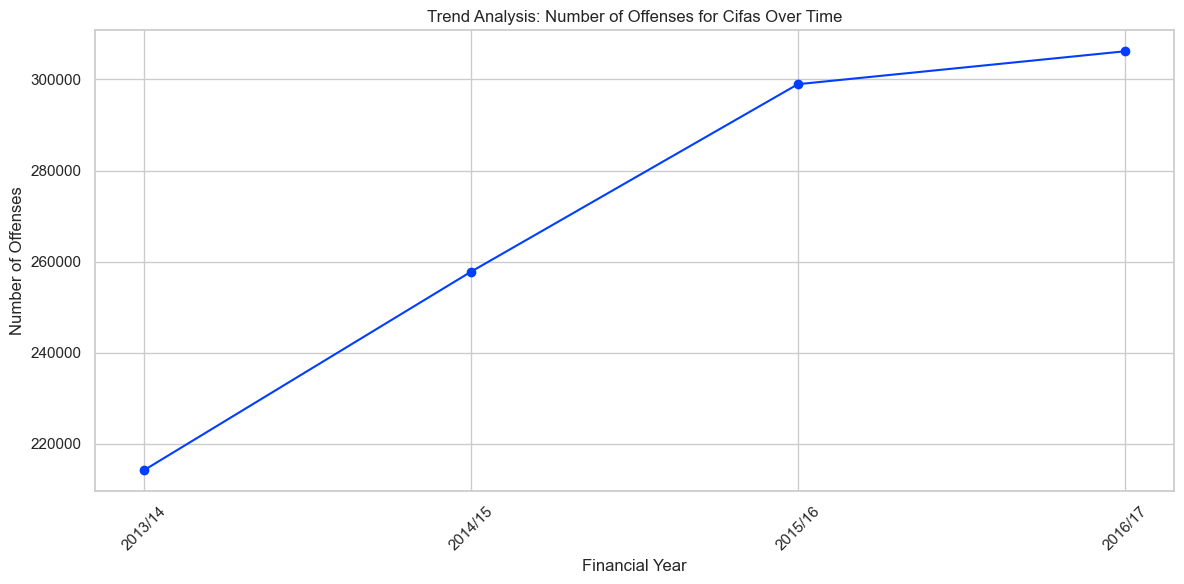

In [218]:
# Get unique years
forces = data['Force Name'].unique()

# Create a separate figure for each year
for force in forces:
    # Filter data for the current year
    year_data = data[data['Force Name'] == force]
    
    # Filter by year
    filtered_by_force = filter_data(data, force= force )
    # Filter by year
    filtered_by_force = filter_data(data, force= force )
    
    # Aggregate the data by Financial Year
    yearly_offenses = filtered_by_force.groupby('Financial Year')['Number of Offences'].sum().reset_index()

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_offenses['Financial Year'], yearly_offenses['Number of Offences'], marker='o', linestyle='-')
    plt.title(f'Trend Analysis: Number of Offenses for {force} Over Time')
    plt.xlabel('Financial Year')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Offenses')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

In [219]:
# Aggregate the data by Financial Year
yearly_offenses = filtered_by_force.groupby('Financial Year')['Number of Offences'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(yearly_offenses['Financial Year'], yearly_offenses['Number of Offences'], marker='o', linestyle='-')
plt.title('Trend Analysis: Number of Offenses for Avon and Somerset Over Time')
plt.xlabel('Financial Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Offenses')
plt.grid(True)
plt.tight_layout()
plt.show()

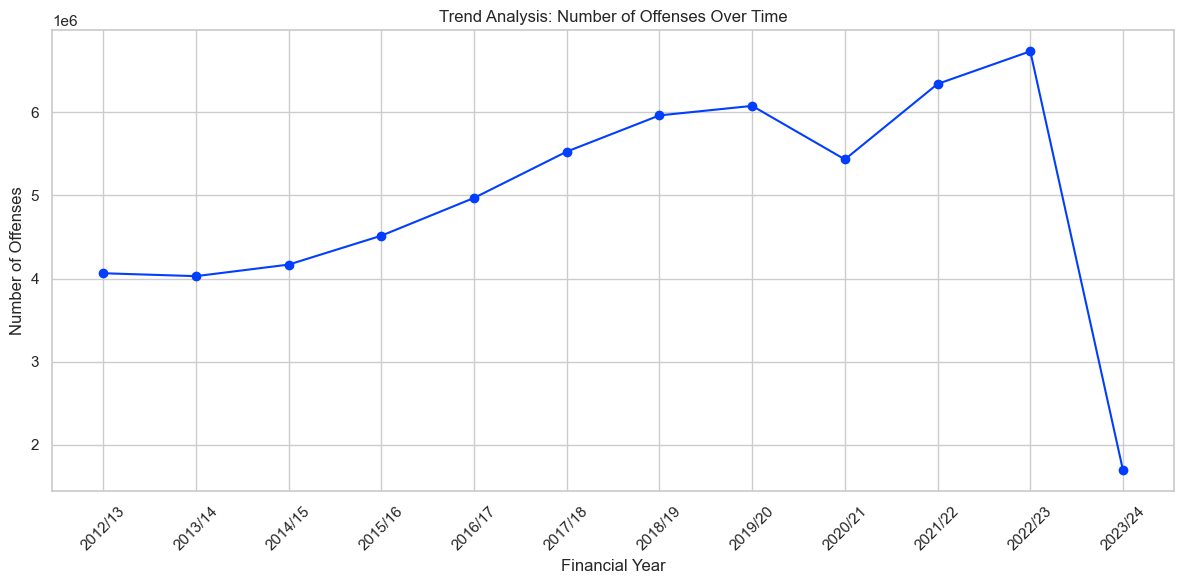

In [220]:
# Aggregate the data by Financial Year
yearly_offenses = data.groupby('Financial Year')['Number of Offences'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(yearly_offenses['Financial Year'], yearly_offenses['Number of Offences'], marker='o', linestyle='-')
plt.title('Trend Analysis: Number of Offenses Over Time')
plt.xlabel('Financial Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Offenses')
plt.grid(True)
plt.tight_layout()
plt.show()

In [488]:
total_yearly_offense =data.groupby('Financial Year')['Number of Offences'].sum().reset_index()
total_yearly_offense

Financial Year  Number of Offences
0         2012/13             4063571
1         2013/14             4028456
2         2014/15             4167619
3         2015/16             4515903
4         2016/17             4970709
5         2017/18             5528510
6         2018/19             5964467
7         2019/20             6078988
8         2020/21             5434426
9         2021/22             6343500
10        2022/23             6736588
11        2023/24             1689998

In [222]:
sns.barplot(data=total_yearly_offense, x='Financial Year', y='Number of Offences')
plt.title('Number of Offenses Over Time')
plt.xlabel('Financial Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Offenses')

Text(0, 0.5, 'Number of Offenses')

In [408]:

total_yearly_Force_offense =data.groupby(['Financial Year', 'Force Name'])['Number of Offences'].sum().reset_index()
total_yearly_Force_offense

Financial Year                Force Name  Number of Offences
0          2012/13              Action Fraud              117402
1          2012/13         Avon and Somerset               99355
2          2012/13              Bedfordshire               35678
3          2012/13  British Transport Police               52189
4          2012/13                     CIFAS              217369
..             ...                       ...                 ...
560        2023/24              Warwickshire               10341
561        2023/24               West Mercia               23370
562        2023/24             West Midlands               87016
563        2023/24            West Yorkshire               79361
564        2023/24                 Wiltshire               10585

[565 rows x 3 columns]

In [224]:
total_yearly_Force_offense_max = total_yearly_Force_offense.loc[total_yearly_Force_offense['Number of Offences'].idxmax()]
total_yearly_Force_offense_max

Financial Year                    2019/20
Force Name            Metropolitan Police
Number of Offences                 906112
Name: 357, dtype: object

In [225]:
total_yearly_Force_offense_min = total_yearly_Force_offense.loc[total_yearly_Force_offense['Number of Offences'].idxmin()]

total_yearly_Force_offense_min

Financial Year                2023/24
Force Name            London, City of
Number of Offences               1521
Name: 543, dtype: object

In [226]:
yearly_pivot_table = total_yearly_Force_offense.pivot(index = 'Force Name',columns = 'Financial Year', values = 'Number of Offences').fillna(0).reset_index()
yearly_pivot_table


Financial Year                 Force Name   2012/13   2013/14   2014/15  \
0                            Action Fraud  117402.0  211221.0  230323.0   
1                       Avon and Somerset   99355.0   96867.0   97989.0   
2                            Bedfordshire   35678.0   36262.0   39105.0   
3                British Transport Police   52189.0   49130.0   44949.0   
4                                   CIFAS  217369.0       0.0       0.0   
5                          Cambridgeshire   46435.0   43970.0   46321.0   
6                                Cheshire   57287.0   55501.0   53647.0   
7                                   Cifas       0.0  214156.0  257762.0   
8                               Cleveland   39523.0   38973.0   42041.0   
9                                 Cumbria   23226.0   23998.0   24842.0   
10                             Derbyshire   51441.0   52538.0   51701.0   
11                     Devon and Cornwall   85454.0   85207.0   80243.0   
12                                 Dorset   40164.0   37212.0   36082.0   
13                                 Durham   30088.0   32806.0   32924.0   
14                            Dyfed-Powys   19182.0   18618.0   18975.0   
15                                  Essex  100144.0   99346.0   99740.0   
16              Financial Fraud Action UK  113143.0   96534.0  104982.0   
17                        Gloucestershire   30095.0   29480.0   29247.0   
18                     Greater Manchester  181055.0  181827.0  200280.0   
19                                  Gwent   34153.0   35397.0   36490.0   
20                              Hampshire  108708.0  102828.0  111836.0   
21                          Hertfordshire   53104.0   51358.0   56598.0   
22                             Humberside   63975.0   65908.0   66313.0   
23                                   Kent   98566.0  108870.0  110287.0   
24                             Lancashire   93933.0   95372.0   92559.0   
25                         Leicestershire   58878.0   60834.0   59220.0   
26                           Lincolnshire   37574.0   35974.0   35255.0   
27                        London, City of    5554.0    5441.0    5318.0   
28                             Merseyside   90840.0   93348.0   97244.0   
29                    Metropolitan Police  770220.0  698729.0  700886.0   
30                                Norfolk   38191.0   38060.0   44175.0   
31                            North Wales   37840.0   36540.0   36743.0   
32                        North Yorkshire   35301.0   34449.0   34617.0   
33                       Northamptonshire   46983.0   40898.0   45930.0   
34                            Northumbria   67574.0   70078.0   72881.0   
35                        Nottinghamshire   68146.0   68519.0   72447.0   
36                            South Wales   84528.0   82133.0   89388.0   
37                        South Yorkshire   93657.0   91682.0   93466.0   
38                          Staffordshire   59396.0   59384.0   60763.0   
39                                Suffolk   40009.0   36441.0   38000.0   
40                                 Surrey   52740.0   48486.0   50339.0   
41                                 Sussex   91064.0   83393.0   90407.0   
42                          Thames Valley  133675.0  127431.0  120942.0   
43                             UK Finance       0.0       0.0       0.0   
44                           Warwickshire   29616.0   28377.0   27294.0   
45                            West Mercia   60537.0   58014.0   60763.0   
46                          West Midlands  170713.0  174524.0  176280.0   
47                         West Yorkshire  164760.0  159513.0  157811.0   
48                              Wiltshire   34106.0   32829.0   32214.0   

Financial Year   2015/16   2016/17   2017/18   2018/19   2019/20   2020/21  \
0               220638.0  261943.0  277033.0  311086.0  338250.0  428489.0   
1               119771.0  139958.0  140207.0  136917.0  140564.0  121199.0   
2              

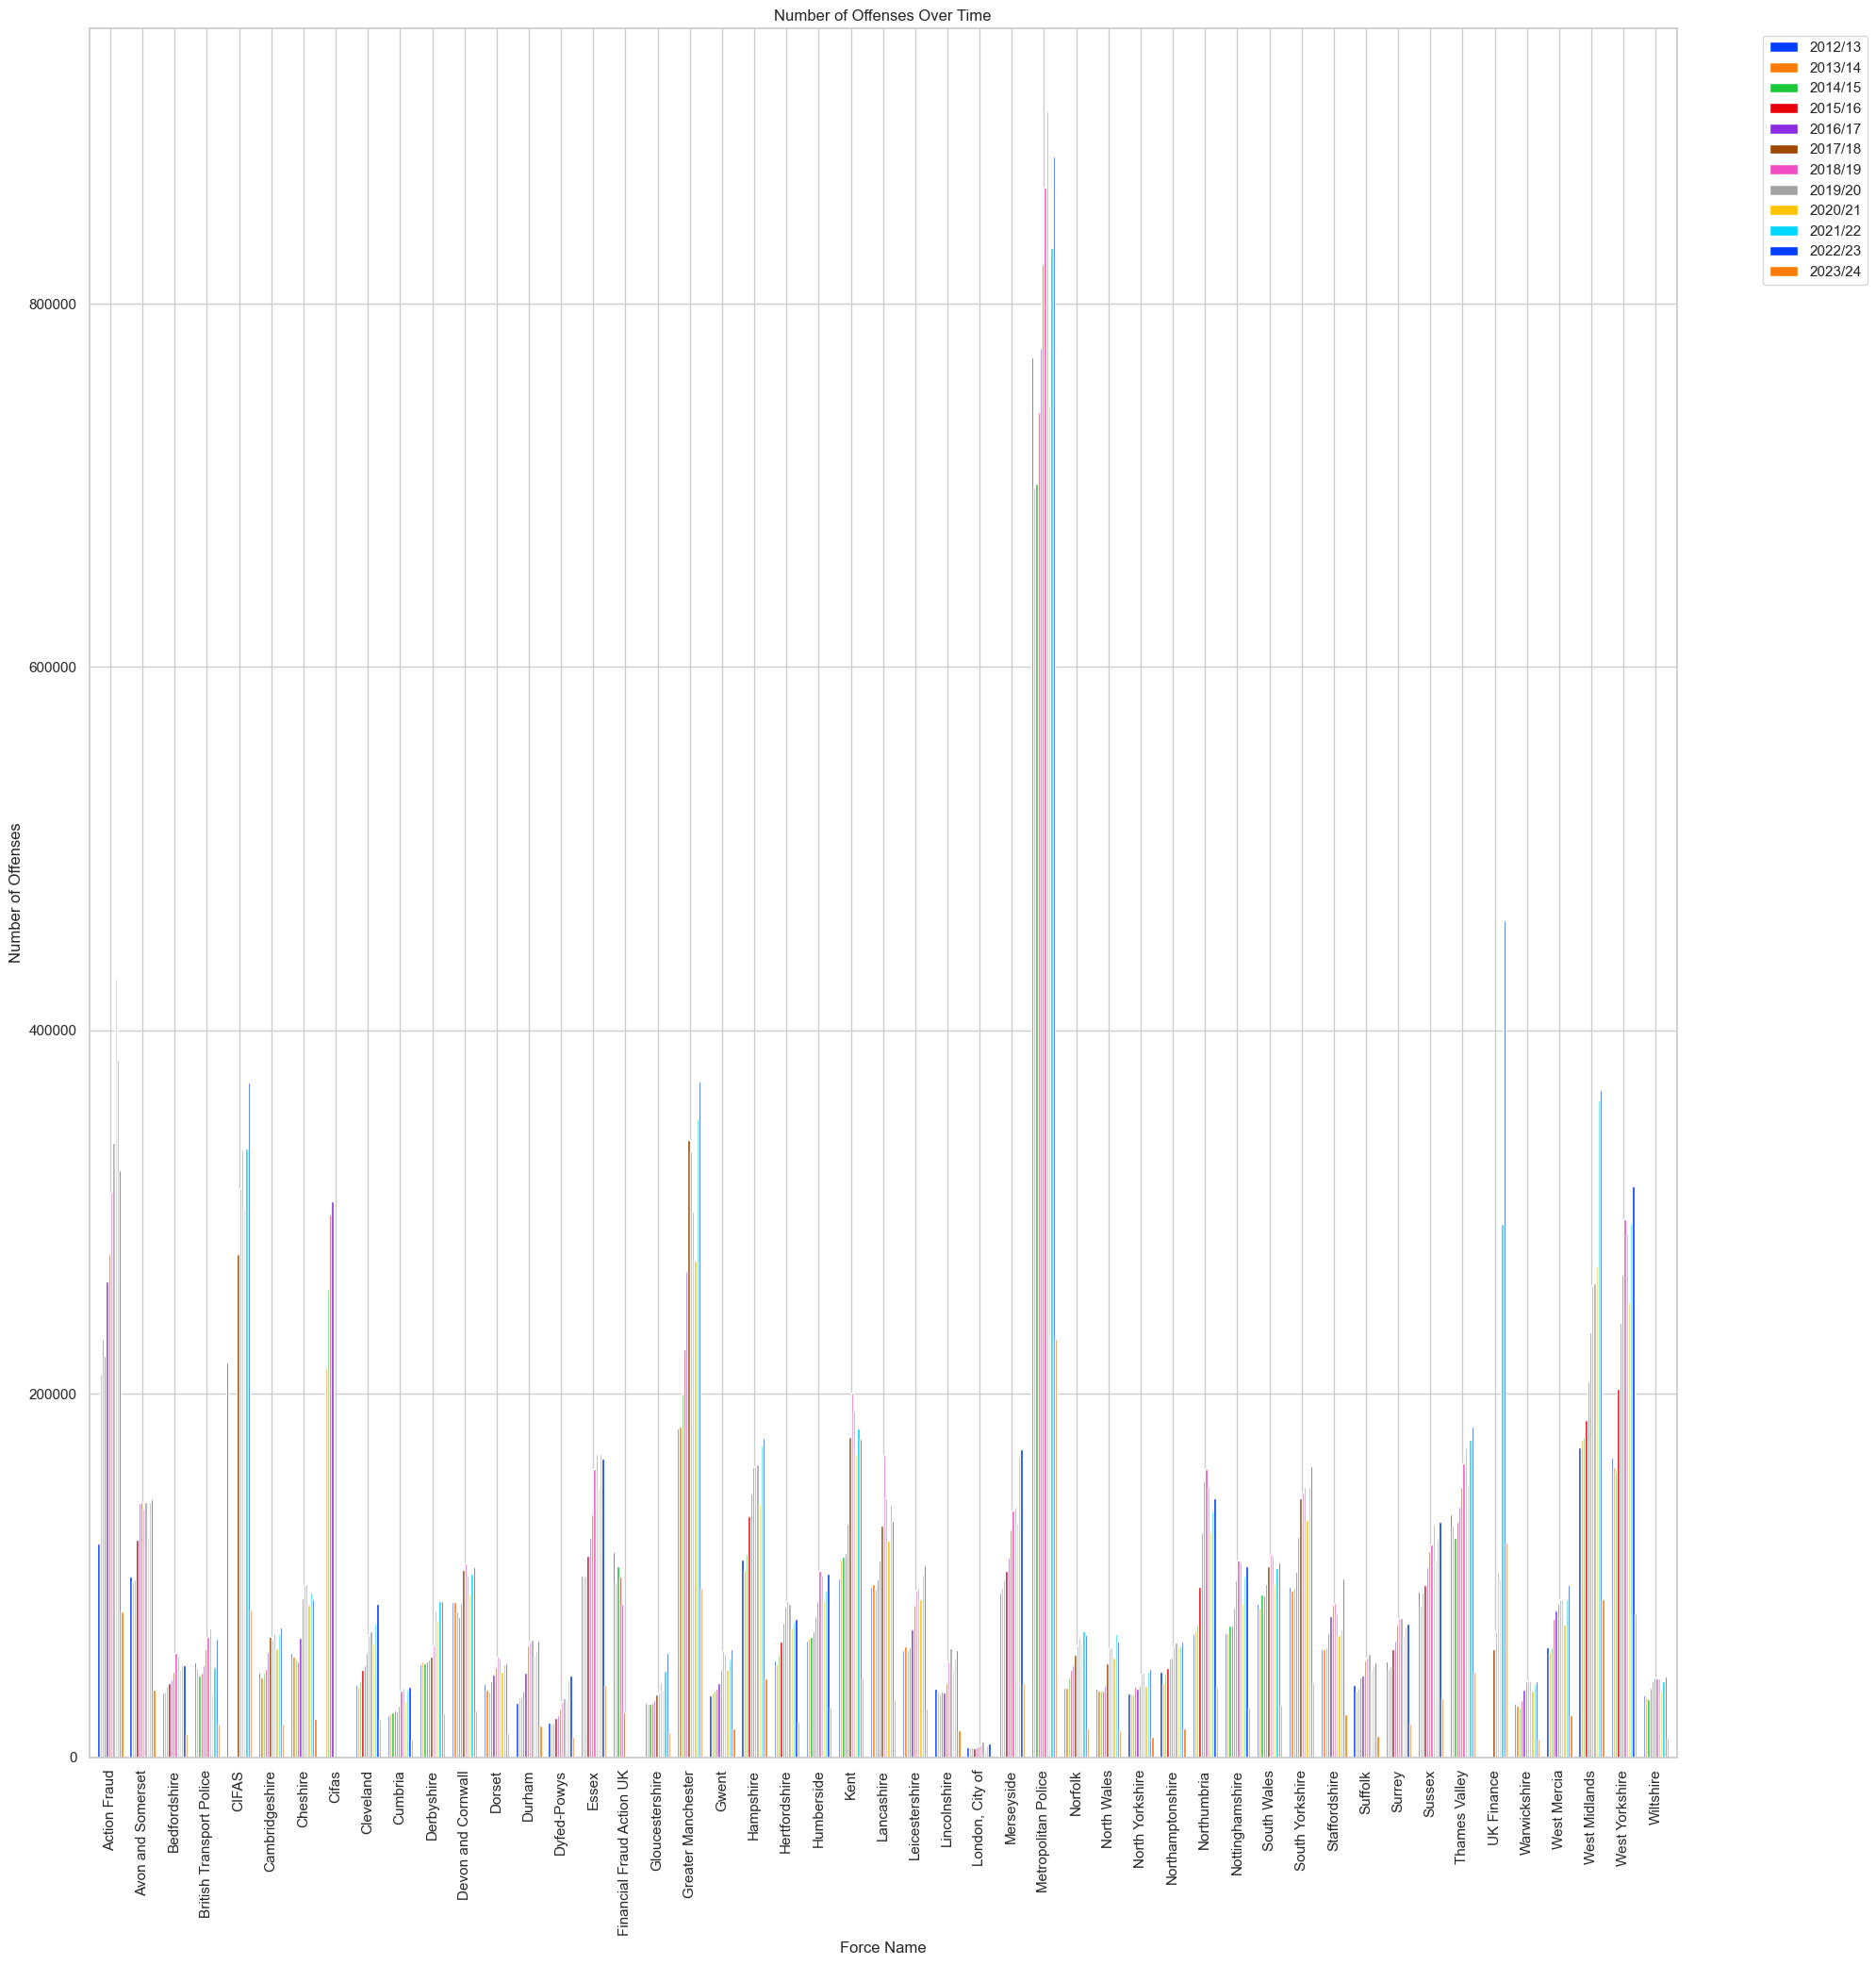

In [192]:
sns.set(style="whitegrid", palette="bright")

# Plot the pivot table as a bar plot
fig, ax = plt.subplots(figsize=(20, 21))
yearly_pivot_table.plot(kind='bar', stacked=False, ax=ax, width=0.8)

# Set plot title and labels
plt.title('Number of Offenses Over Time')
plt.xlabel('Force Name')
plt.xticks(rotation=90)
plt.ylabel('Number of Offenses')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [163]:
plt.figure(figsize=(20, 20))
sns.set(style="dark")

sns.barplot(data = total_yearly_Force_offense, x='Force Name',y = 'Number of Offences', hue = 'Financial Year', palette = 'bright', dodge =True)

plt.title('Number of Offenses Over Time')
plt.xlabel('Financial Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Offenses')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
# Aggregate the data by Financial Year and Force Name
aggregated_data = data.groupby(['Financial Year', 'Force Name'])['Number of Offences'].sum().reset_index()

# Plot the data
plt.figure(figsize=(18, 10))
sns.barplot(data=aggregated_data, x='Financial Year', y='Number of Offences', hue='Force Name')

plt.title('Count of Offenses for Each Force Over the Years')
plt.xlabel('Financial Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Offenses')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

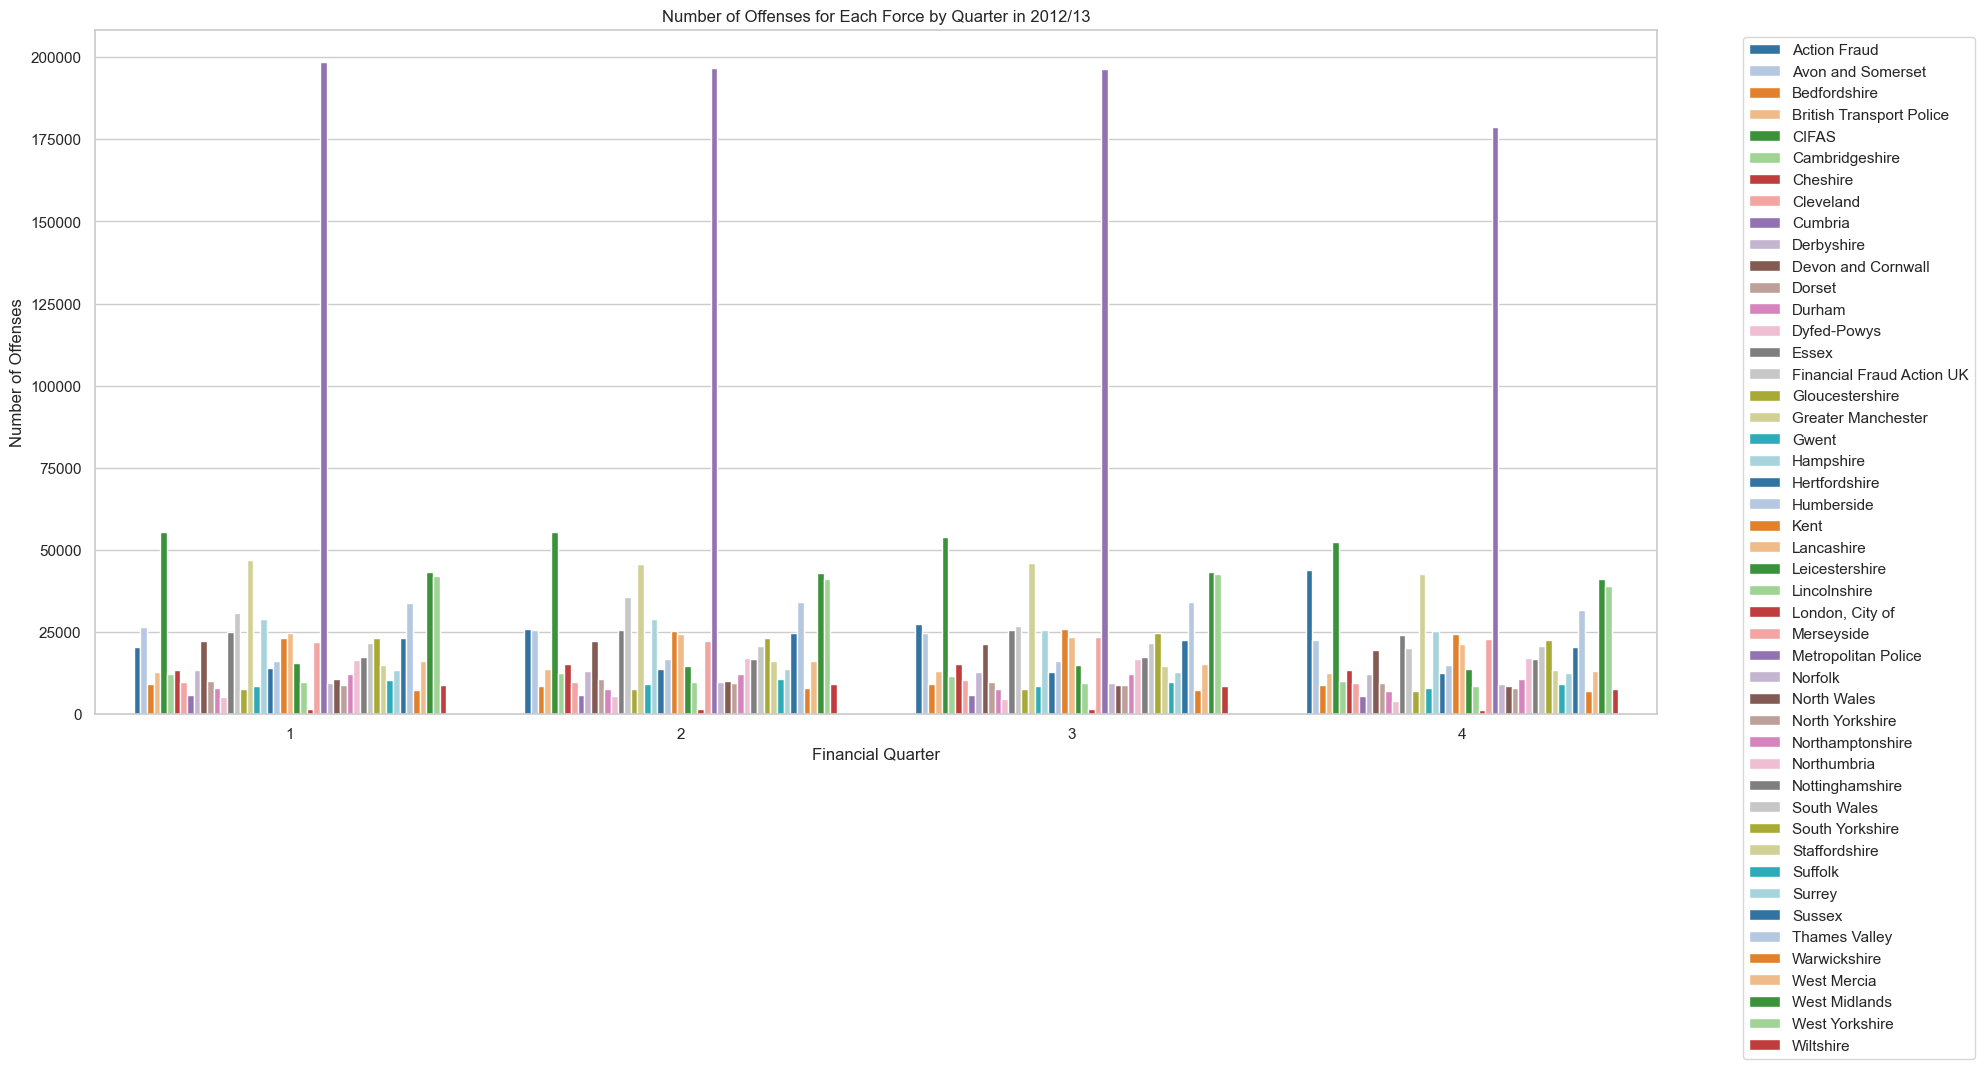

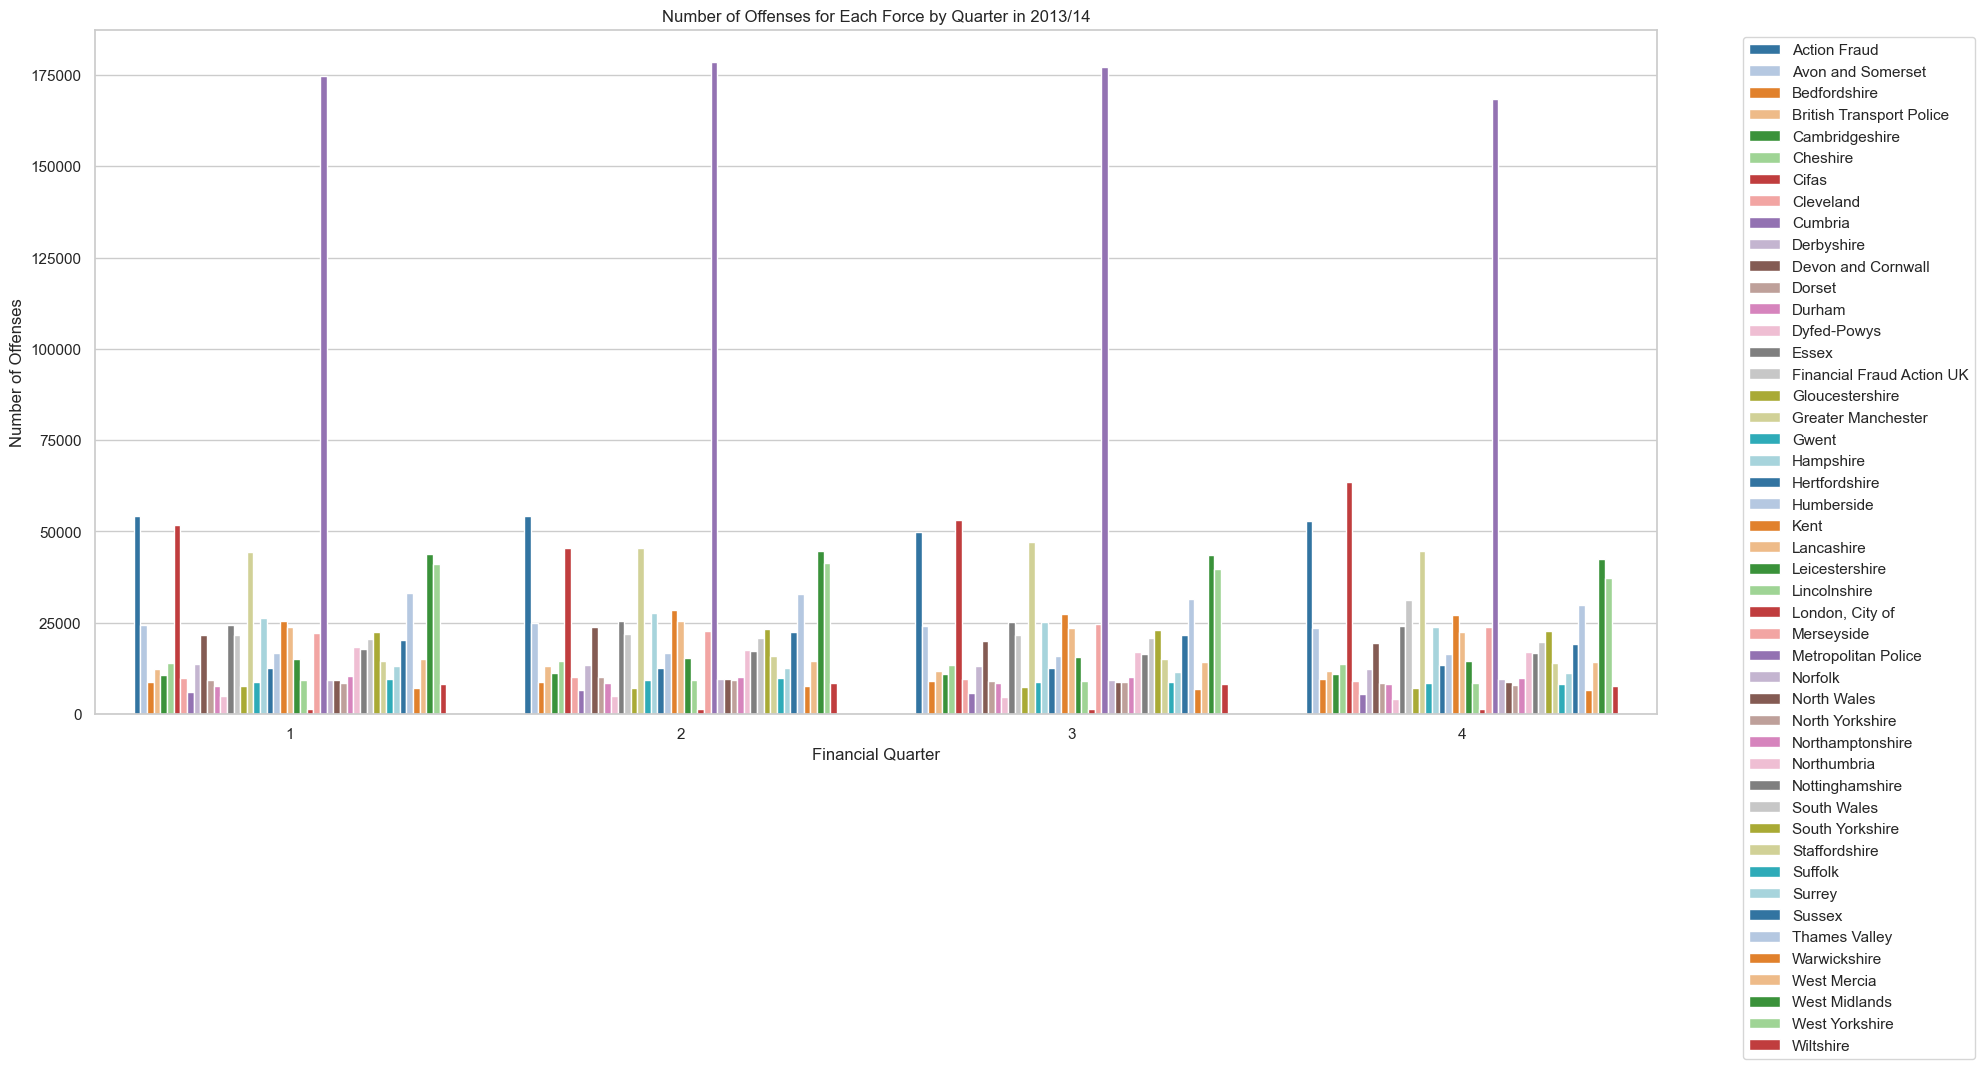

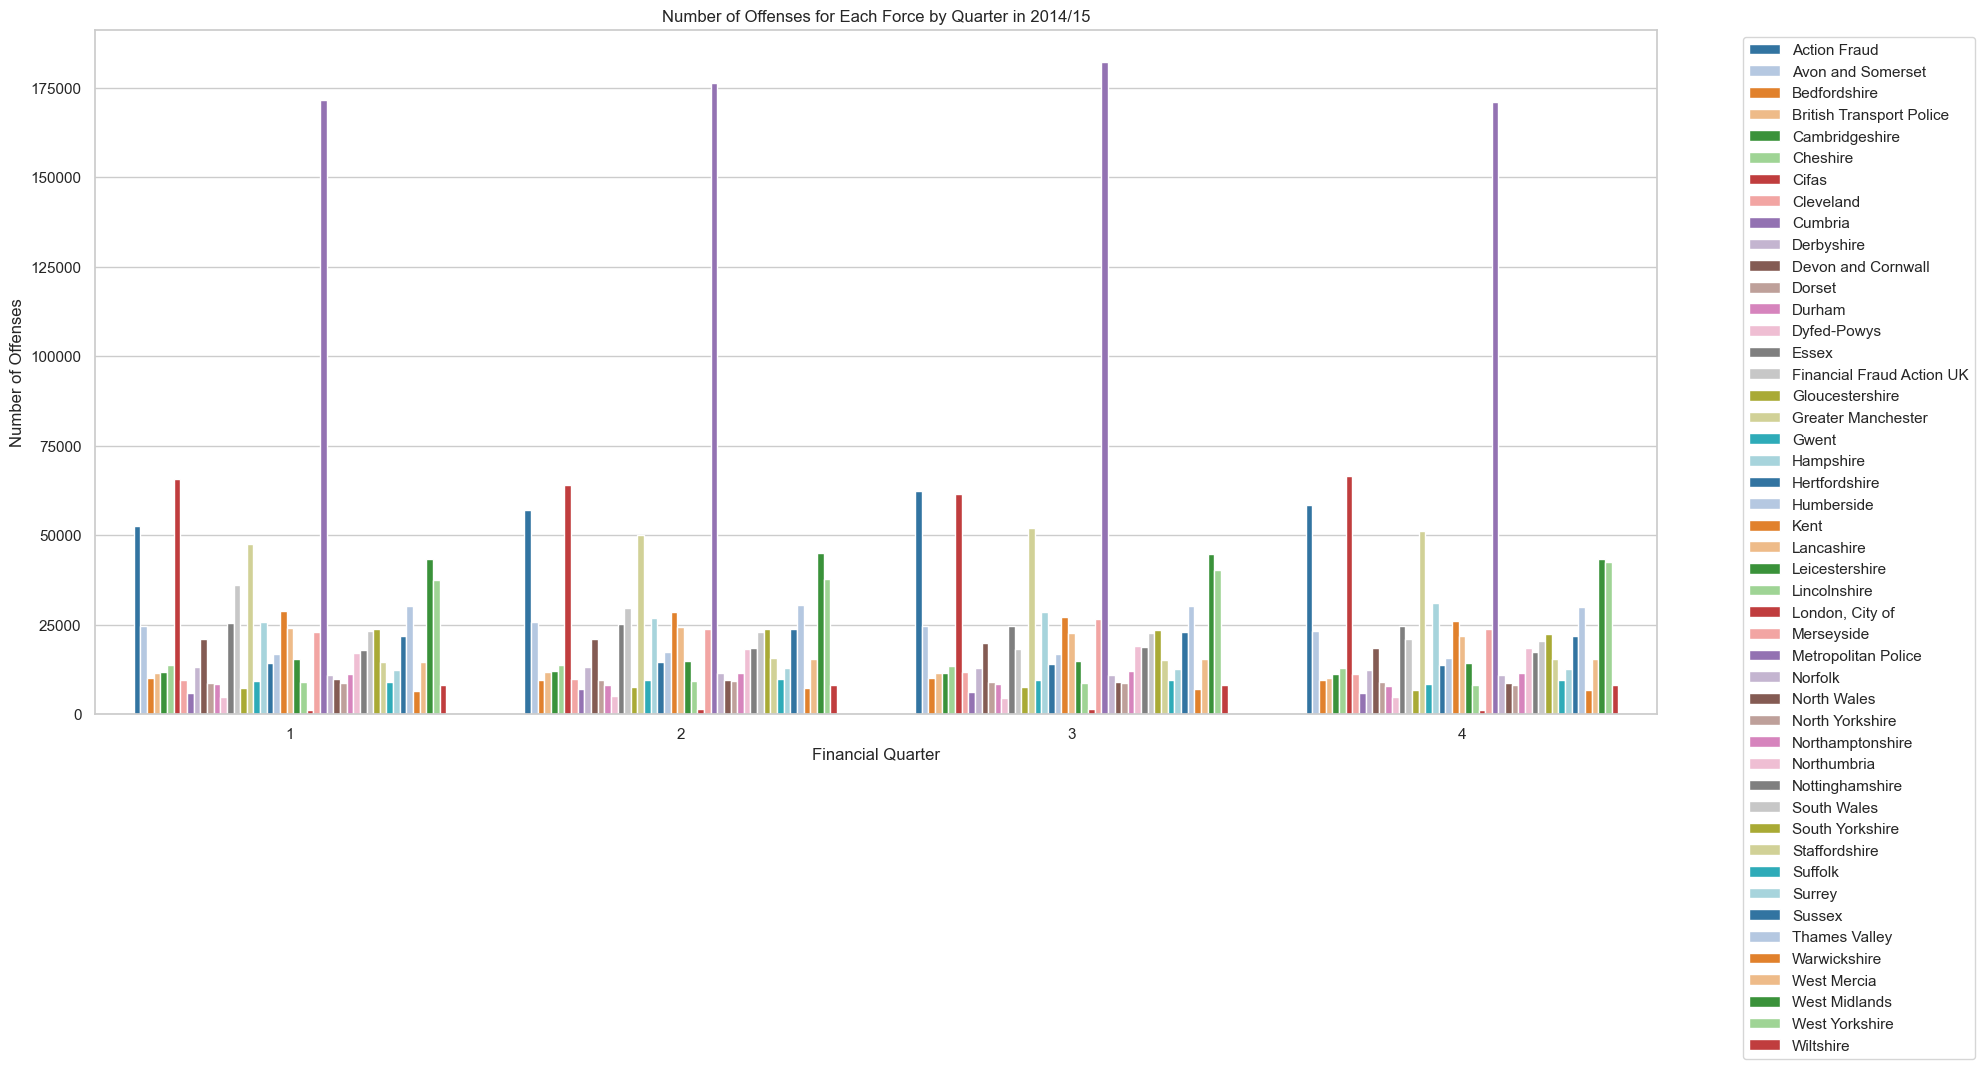

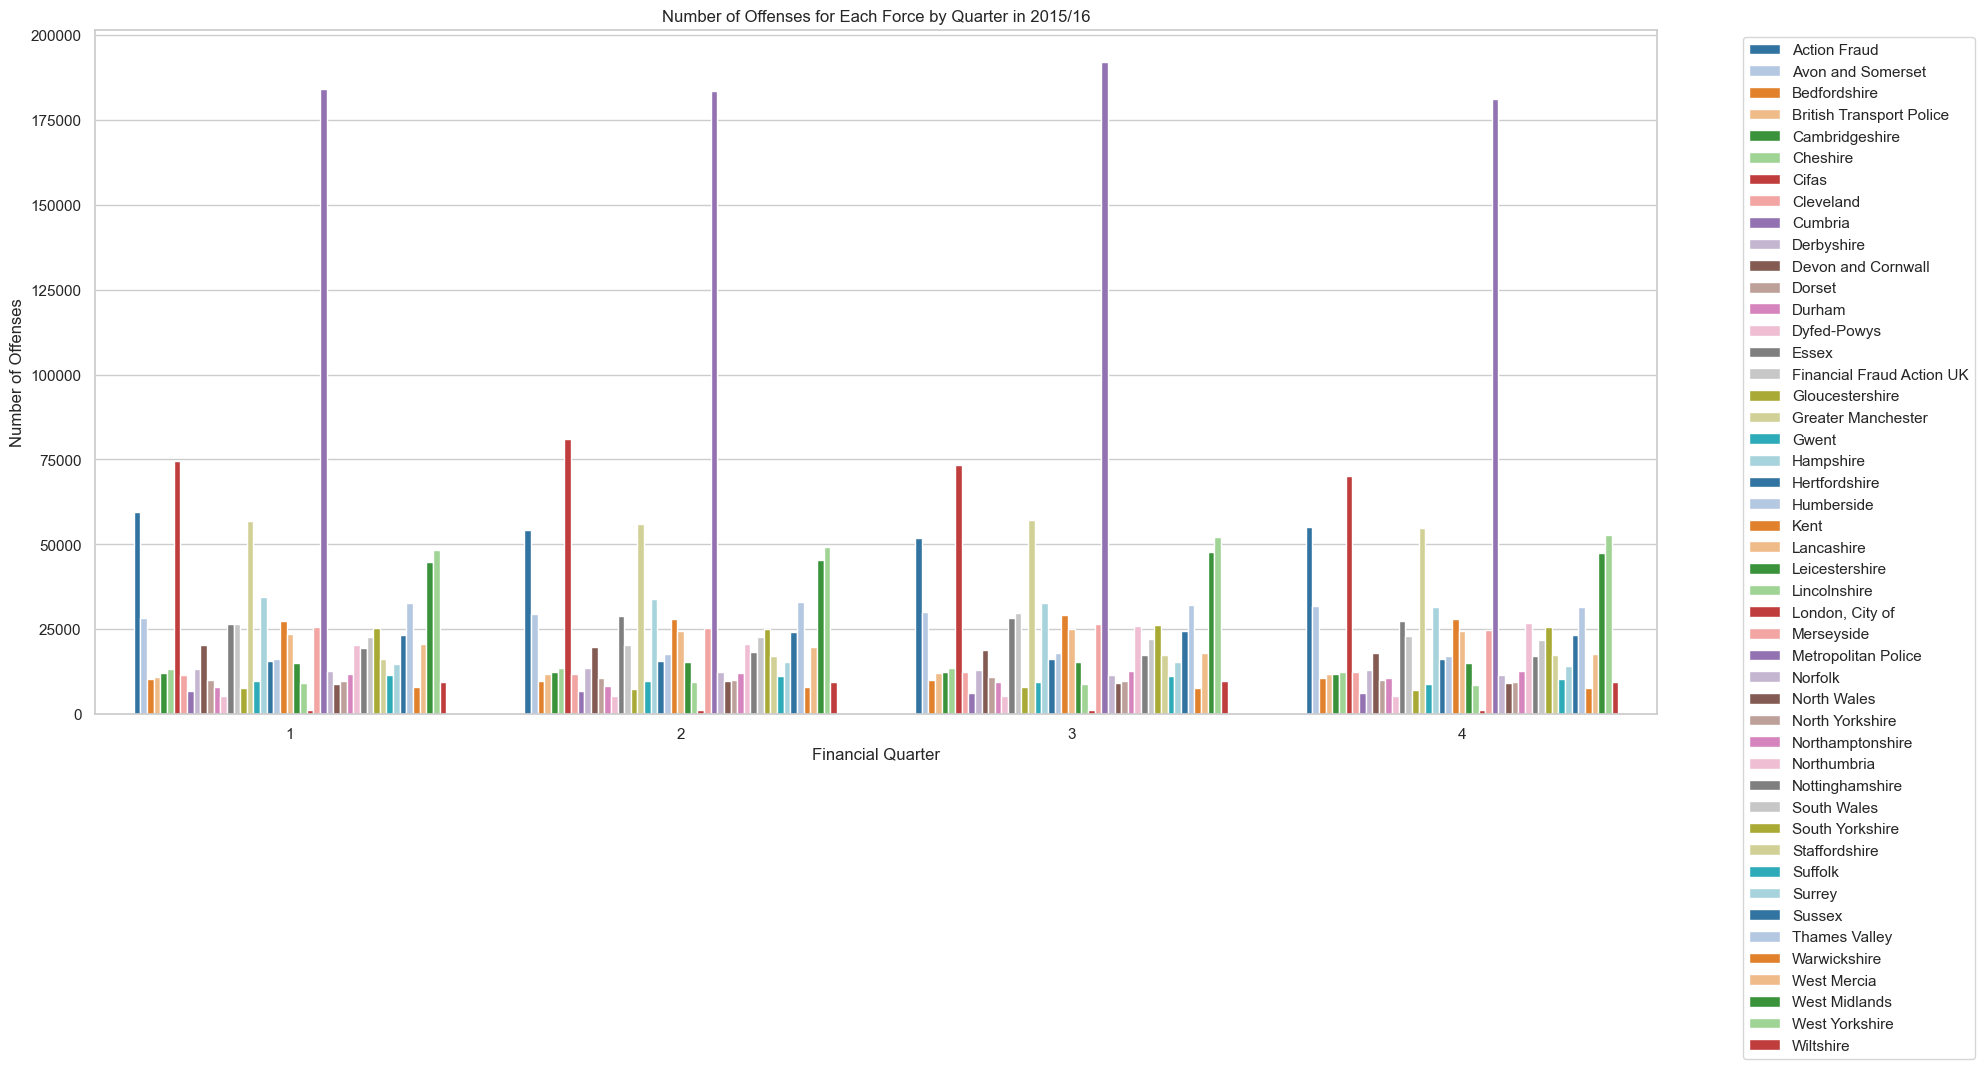

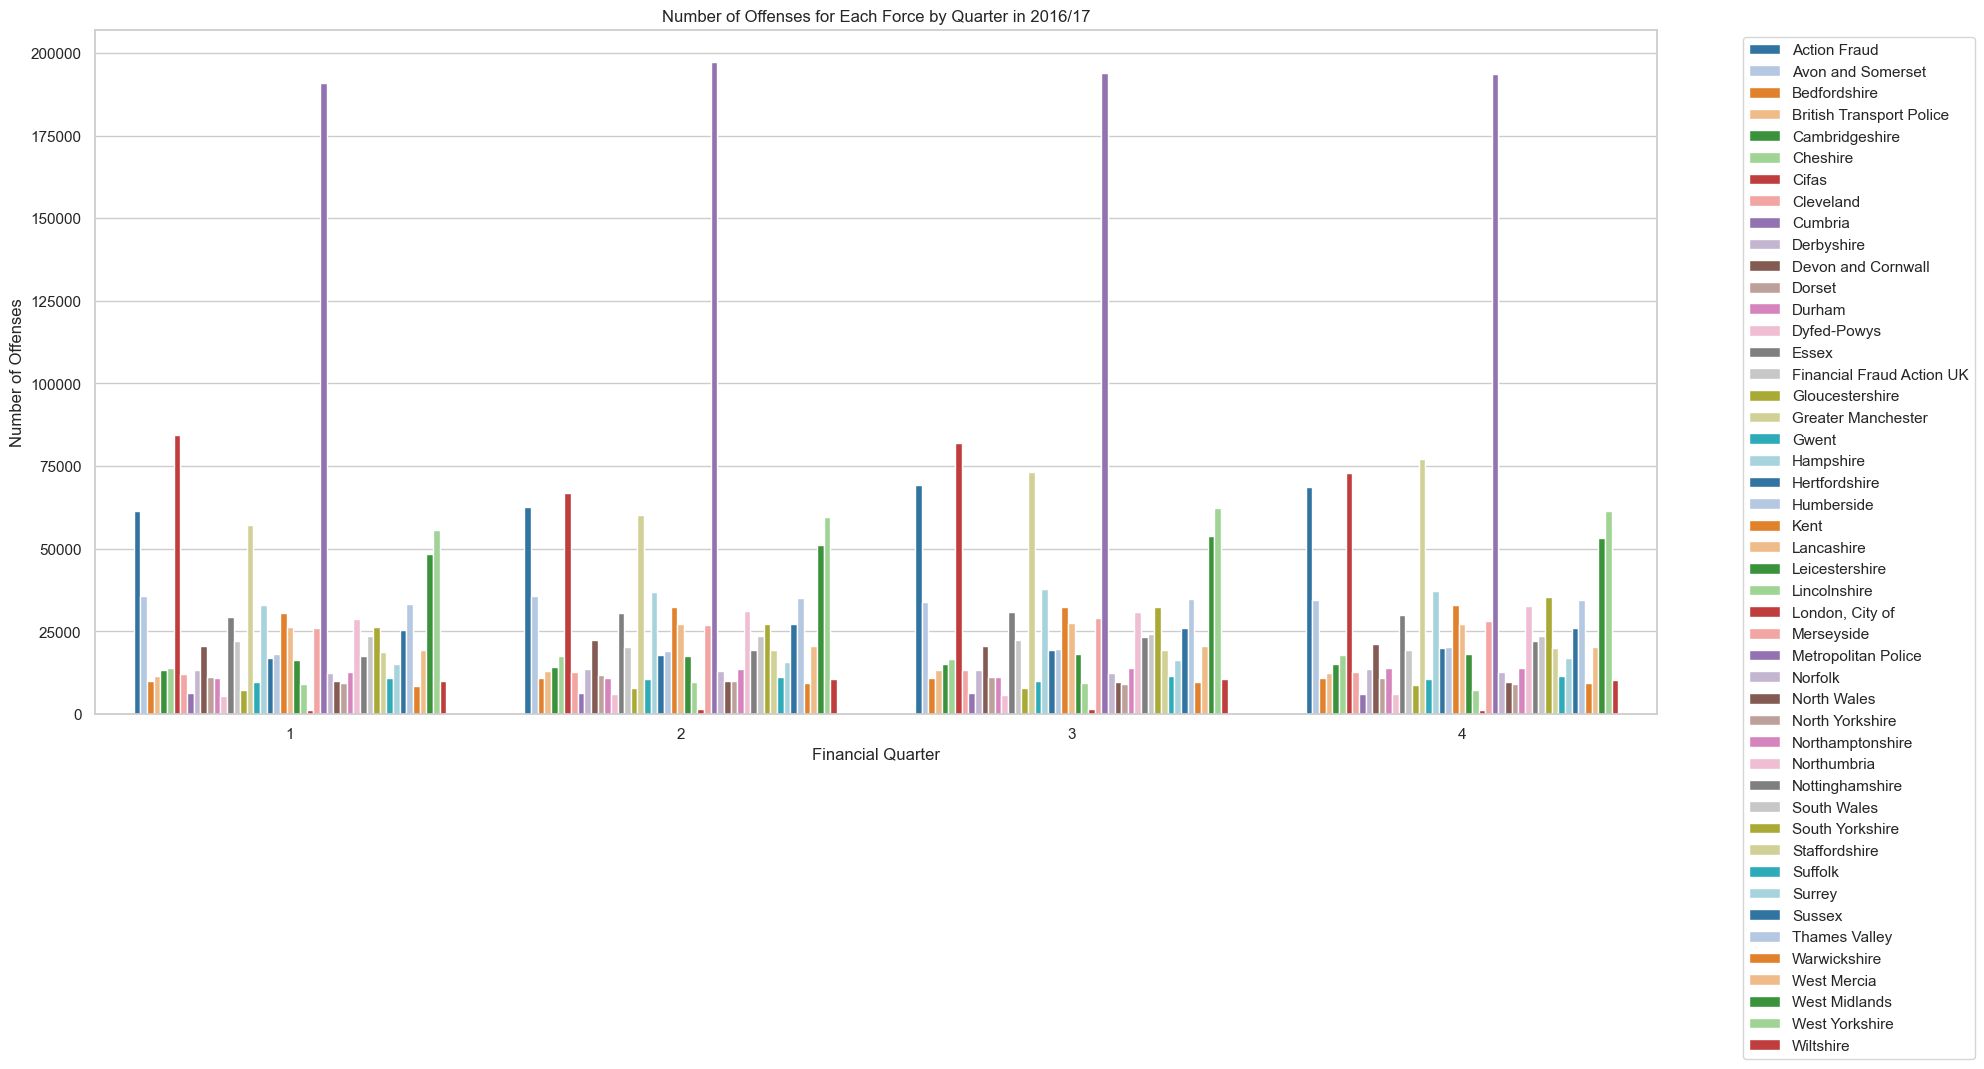

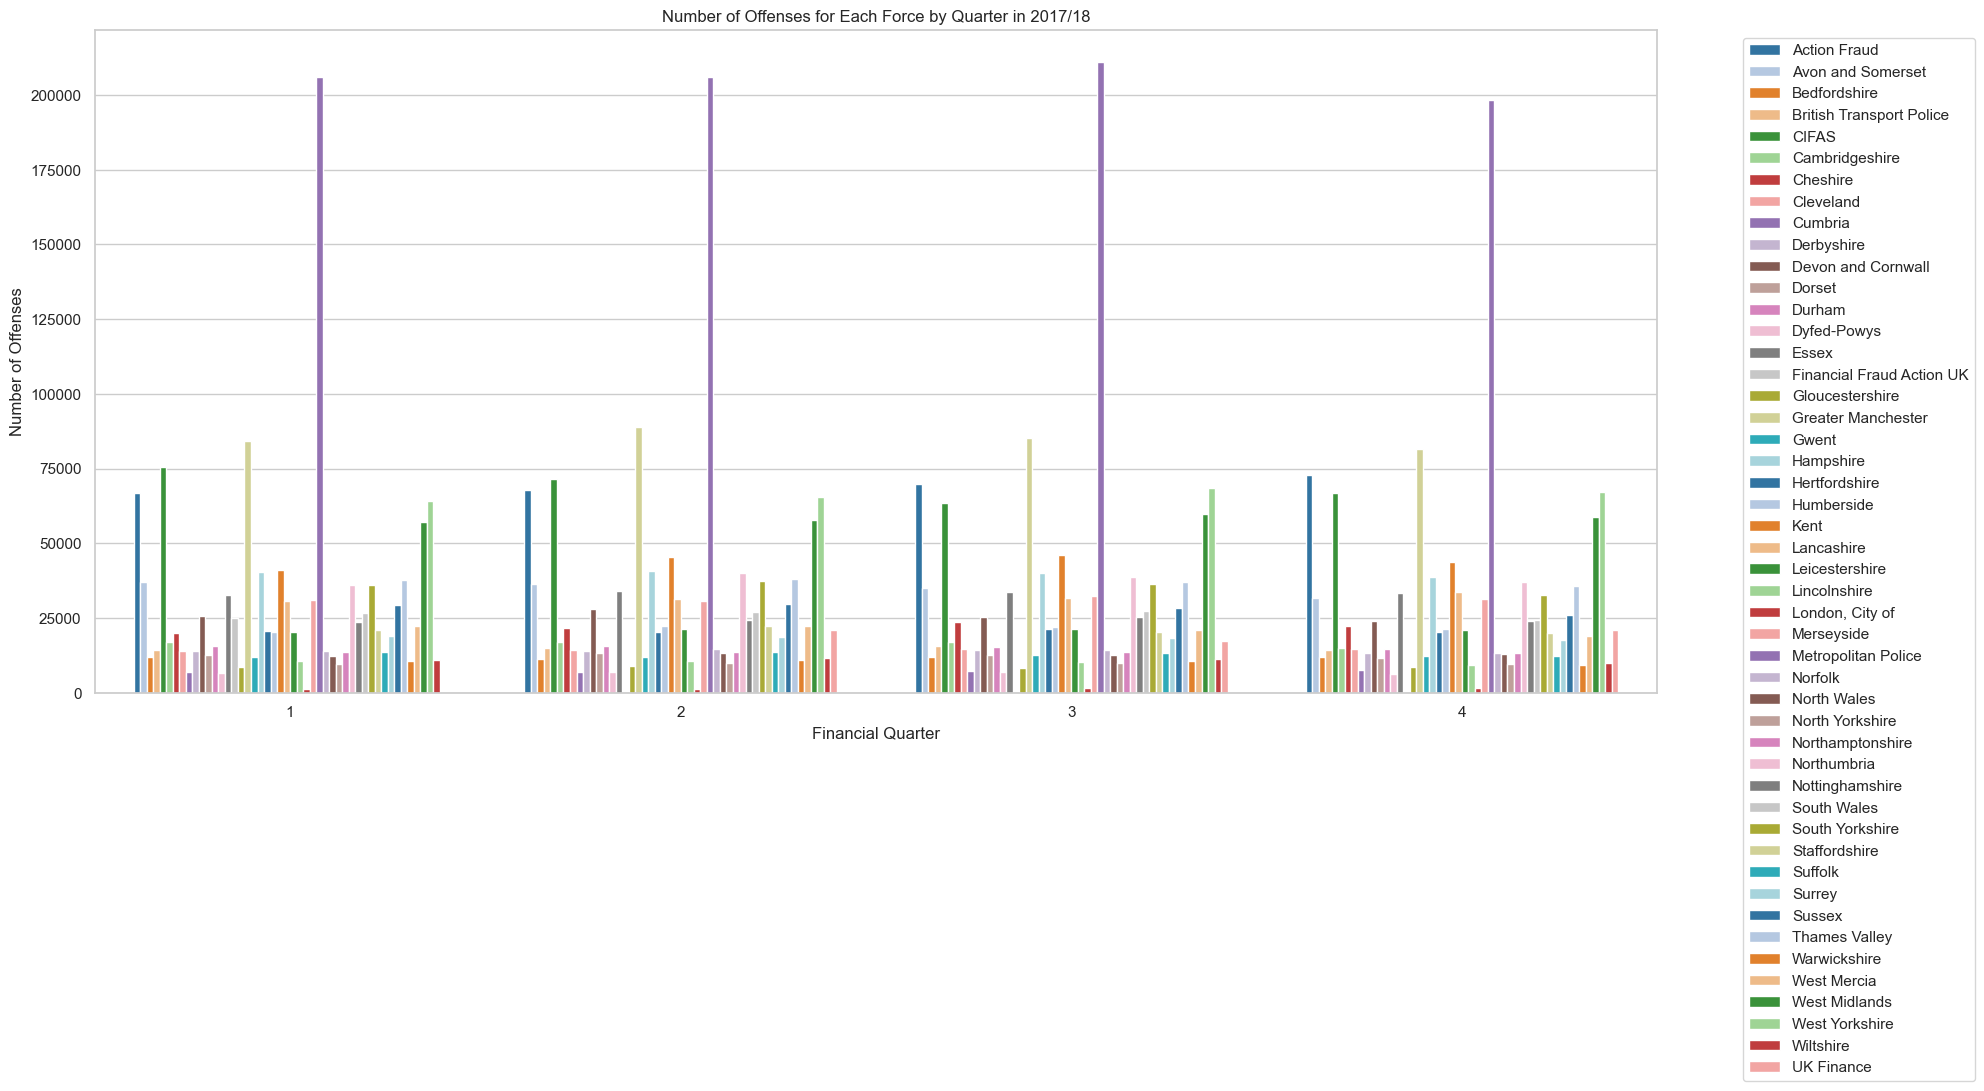

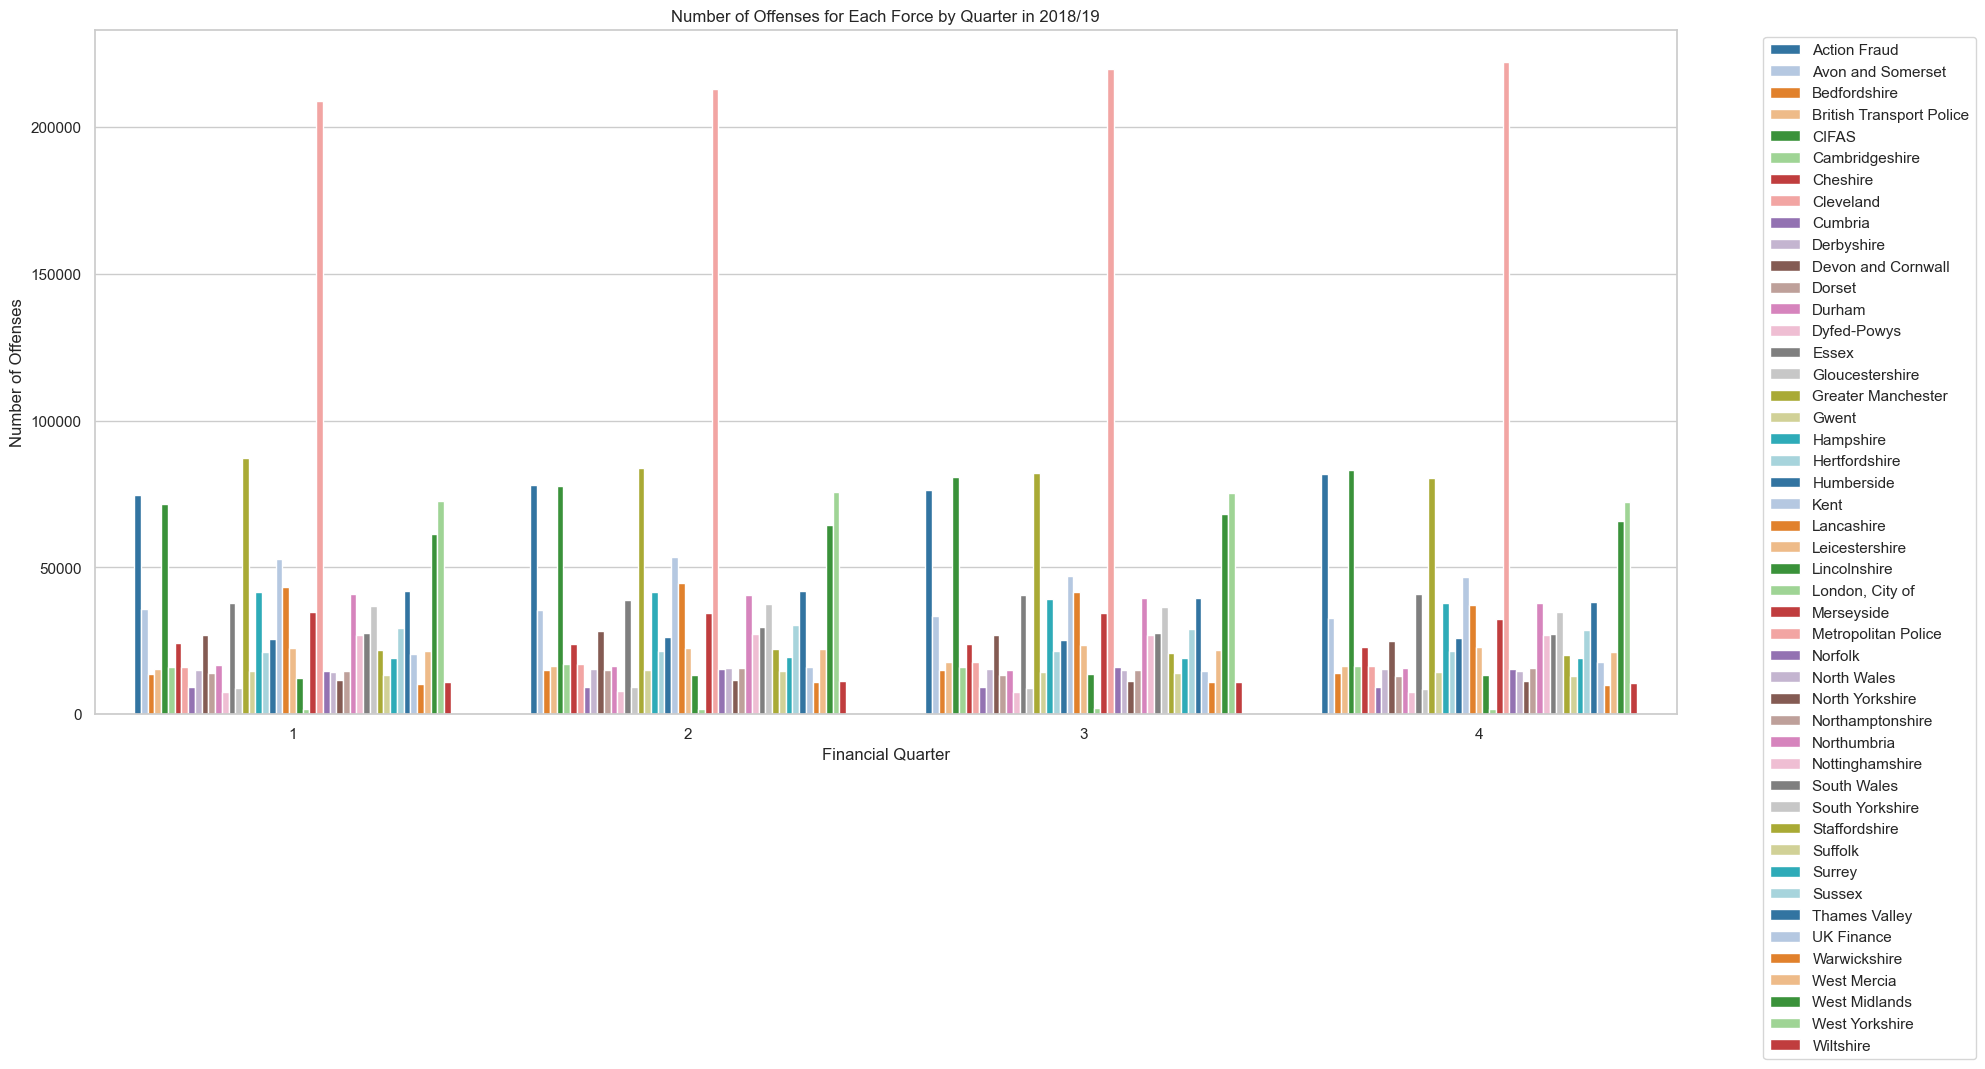

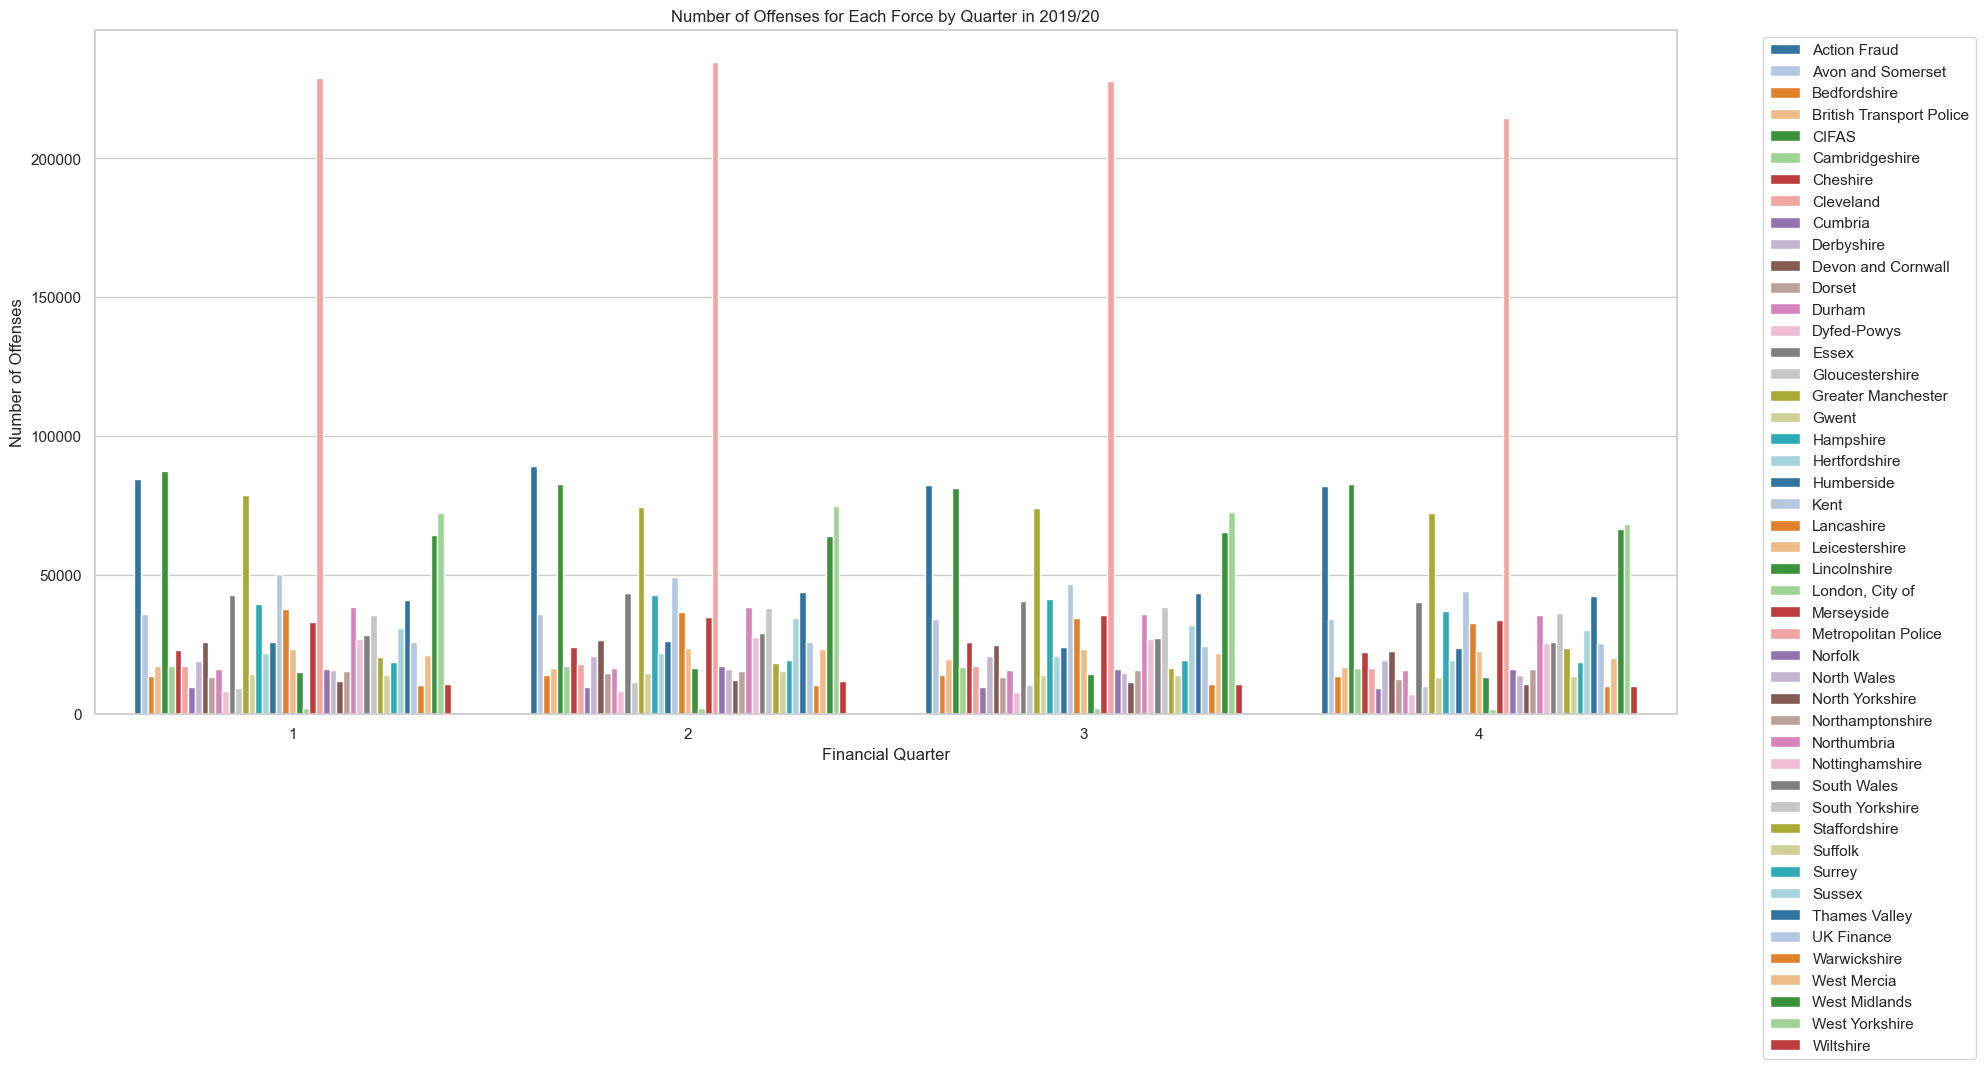

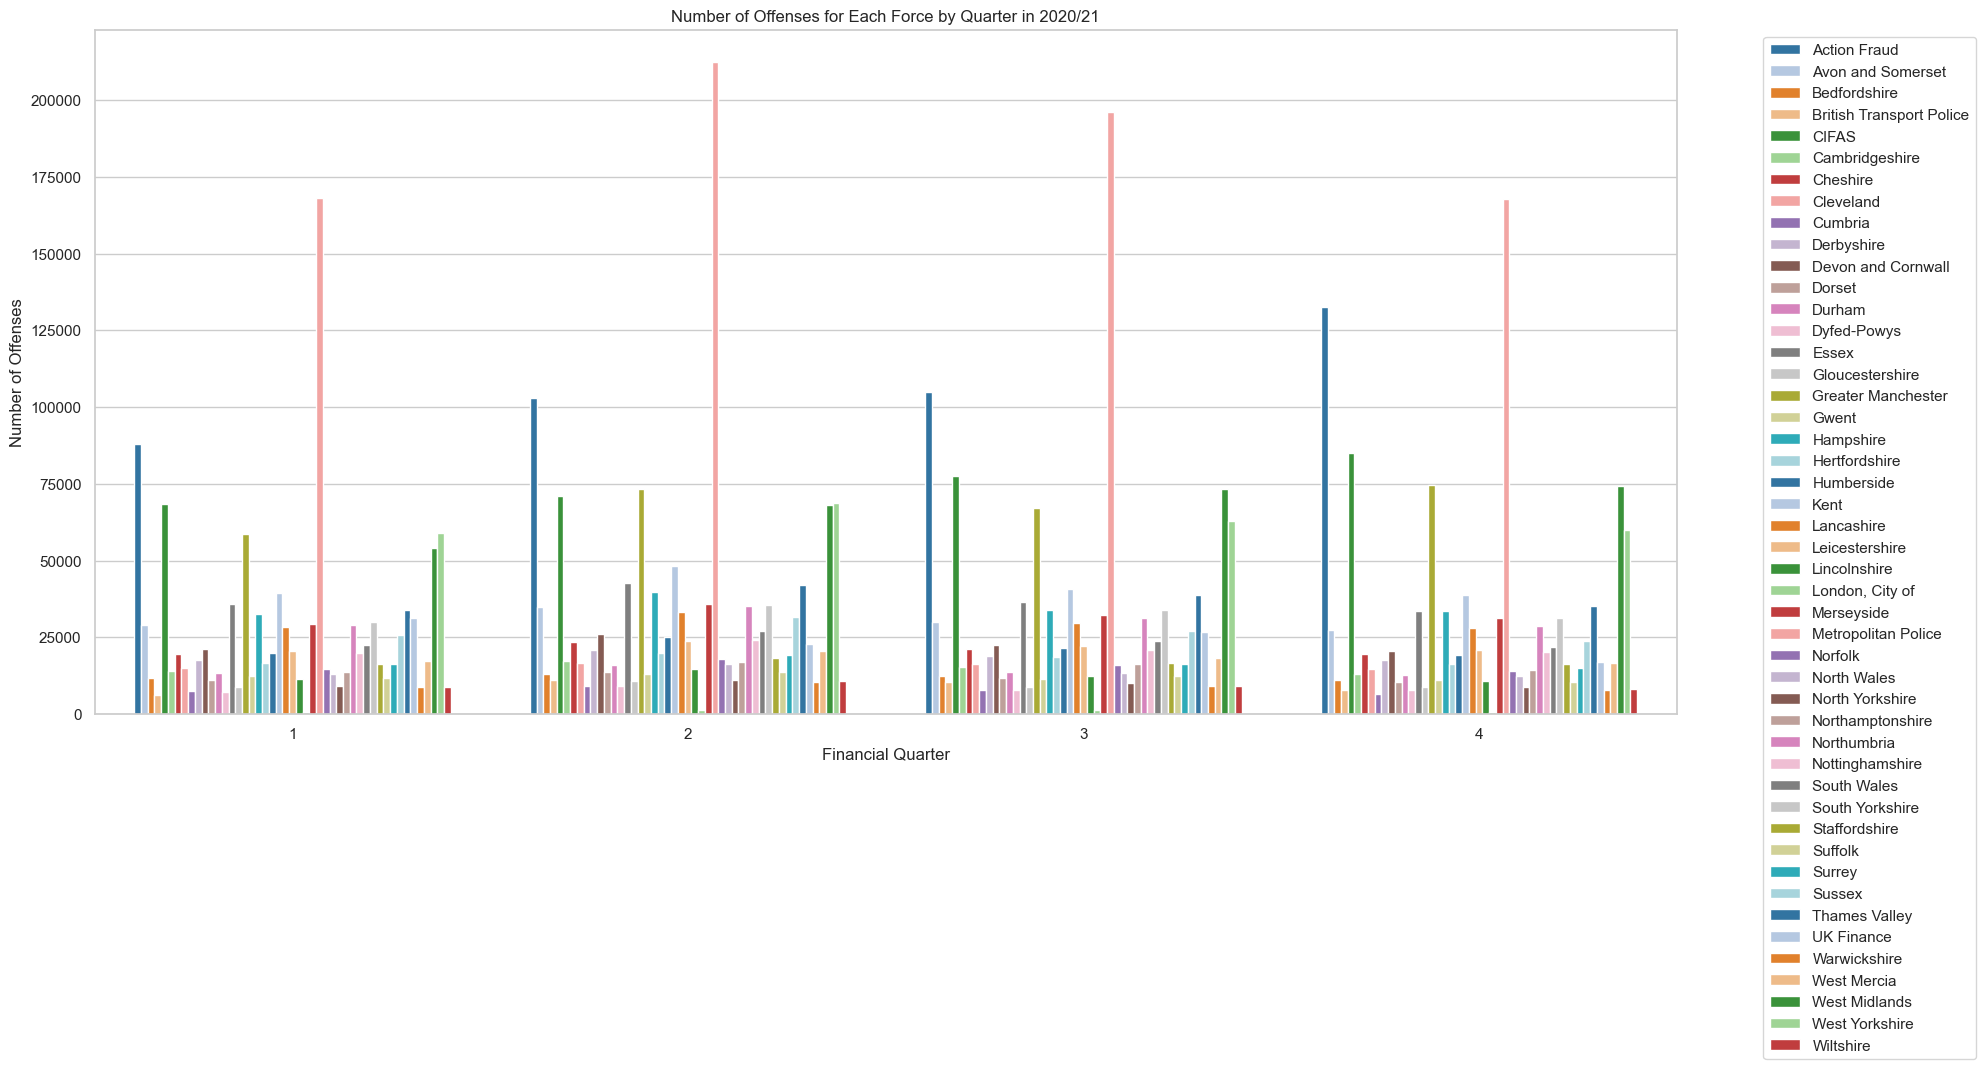

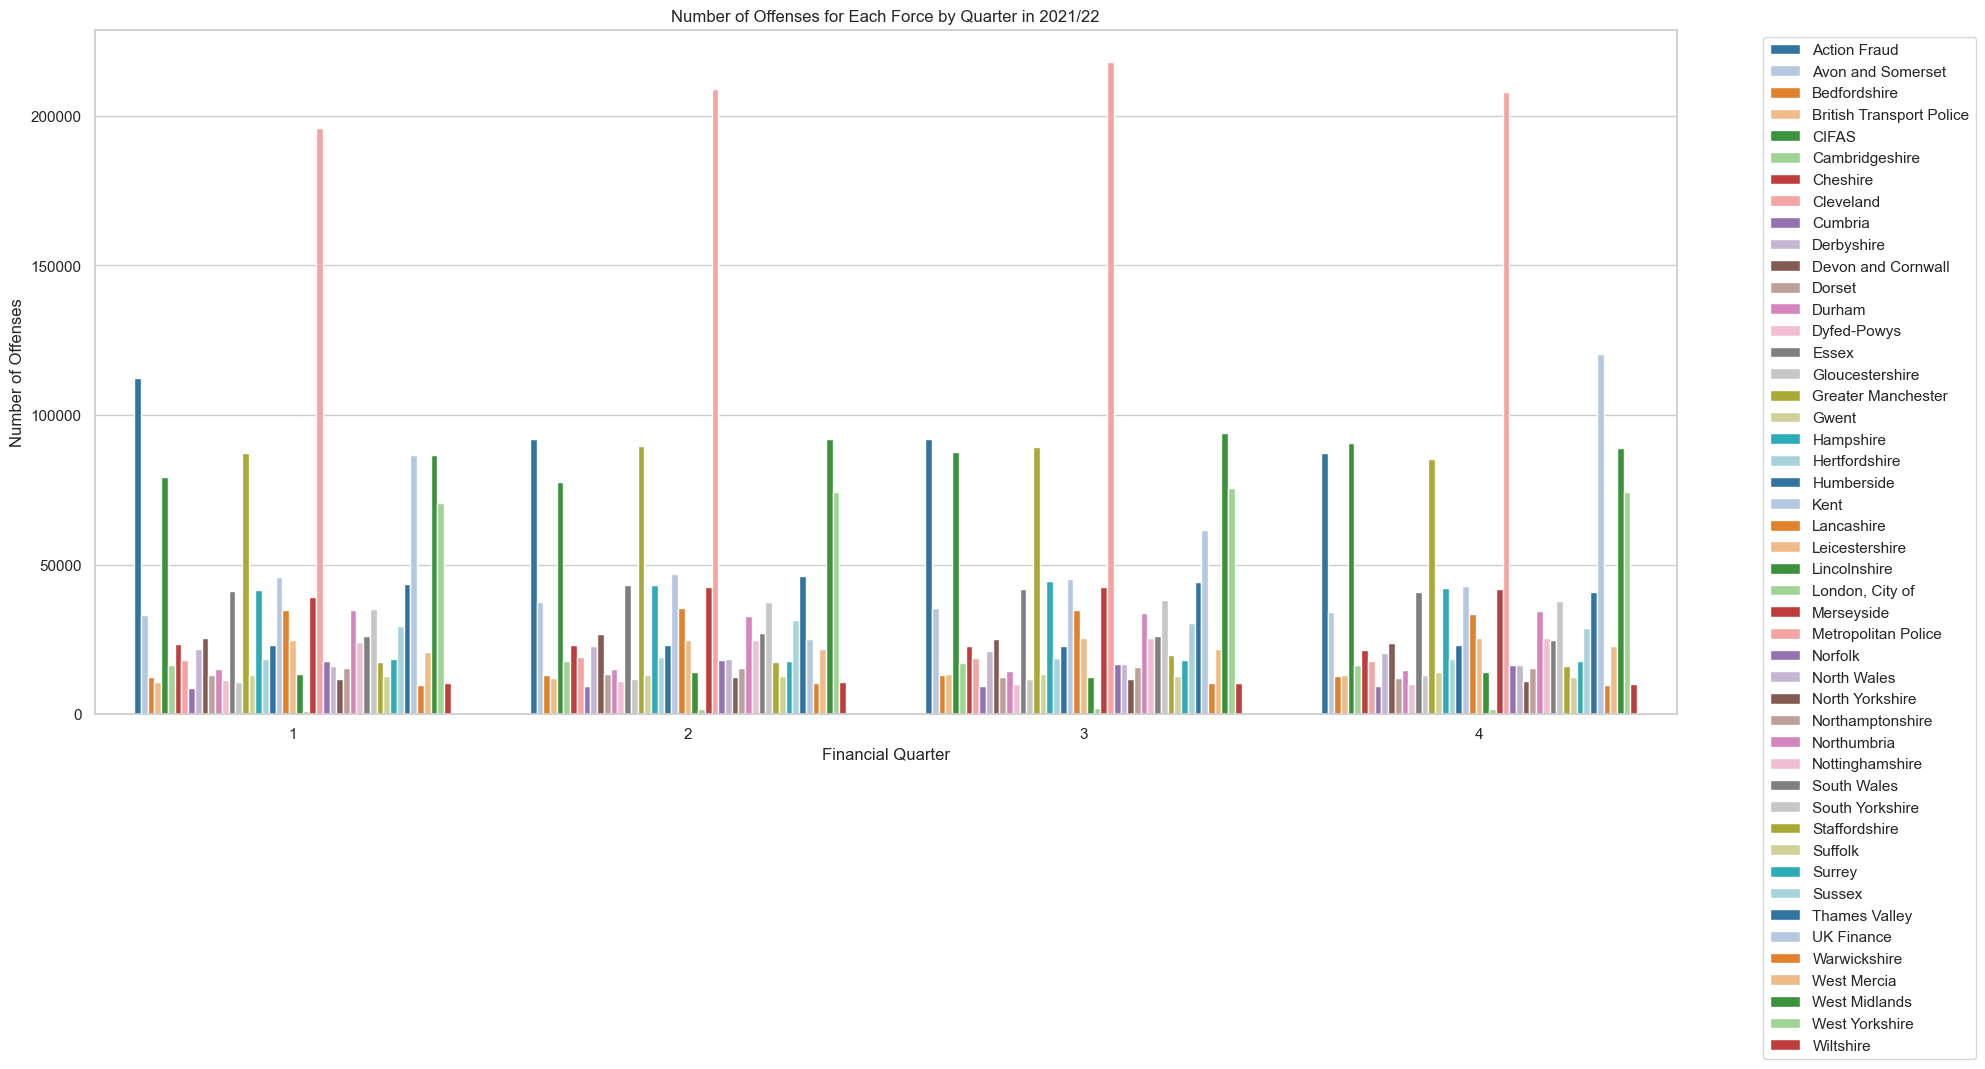

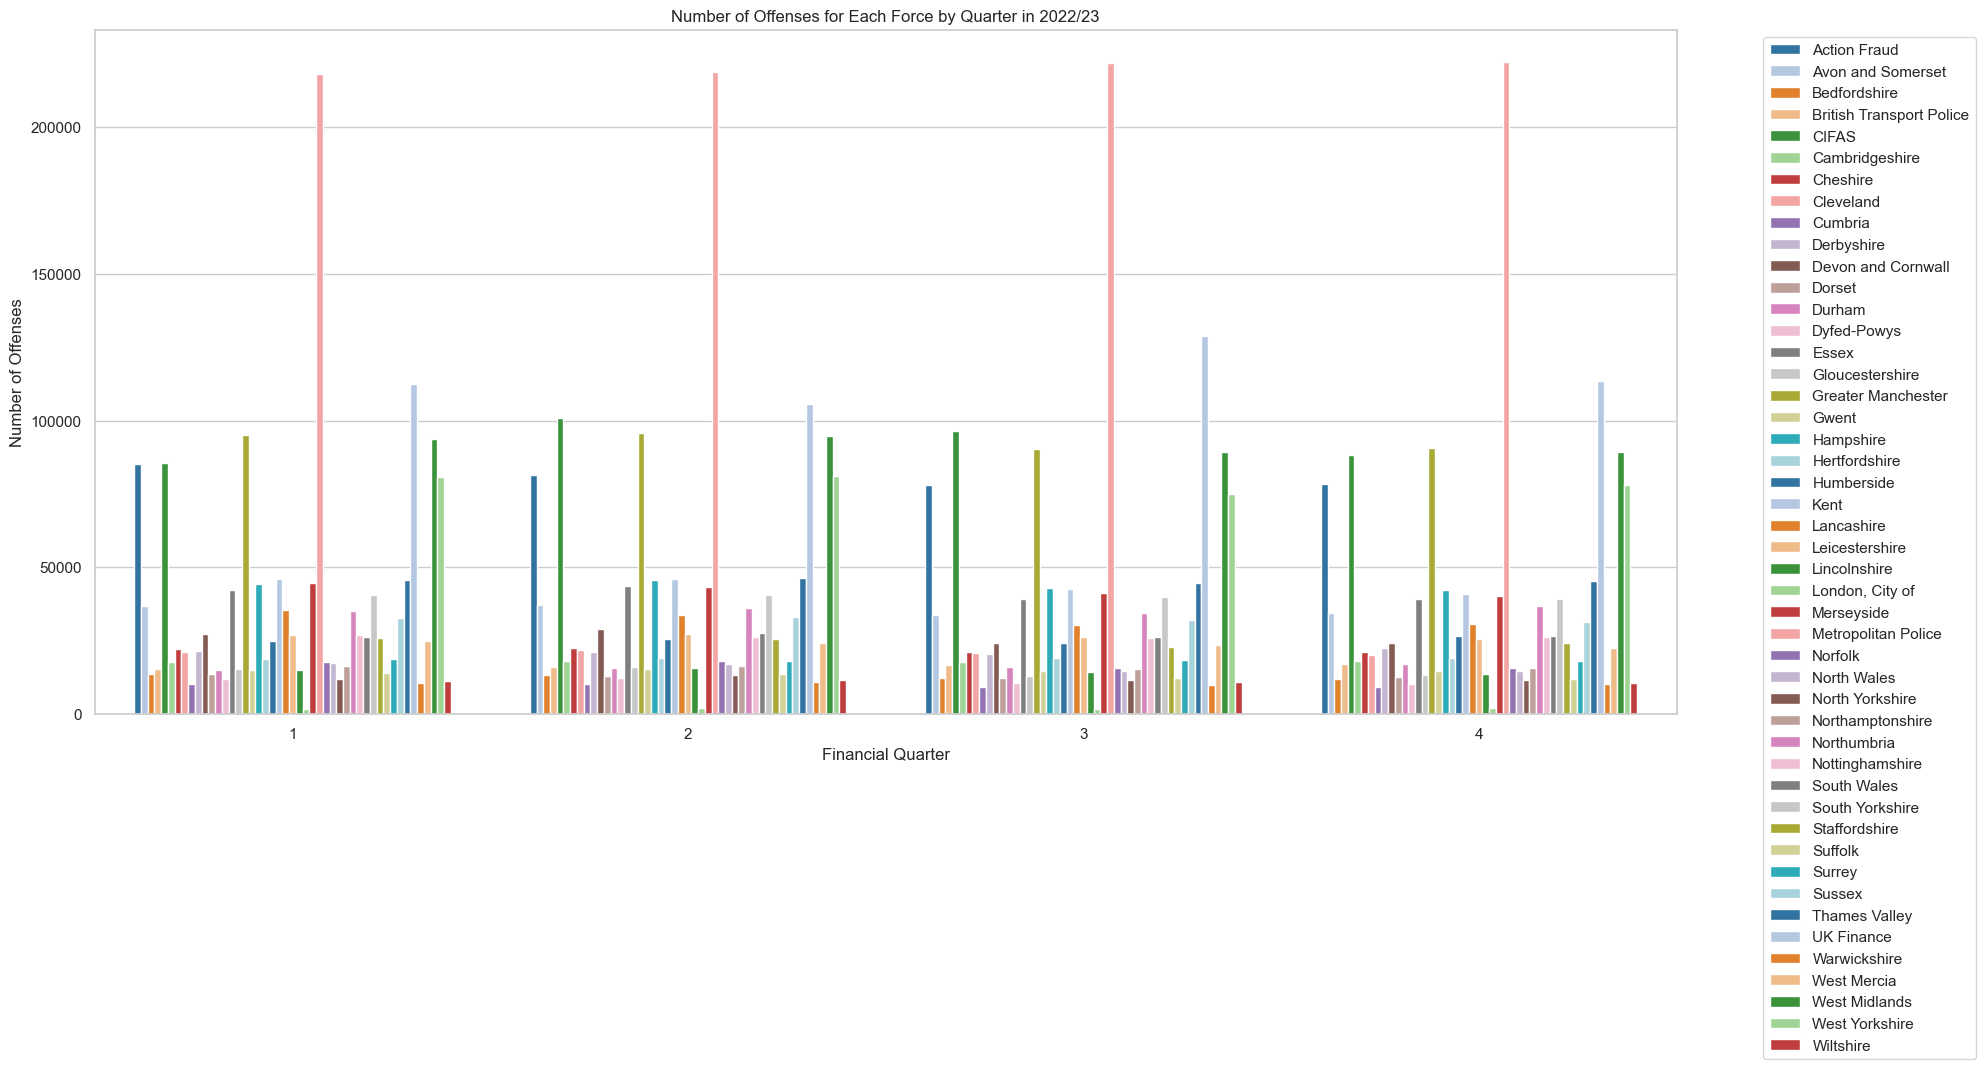

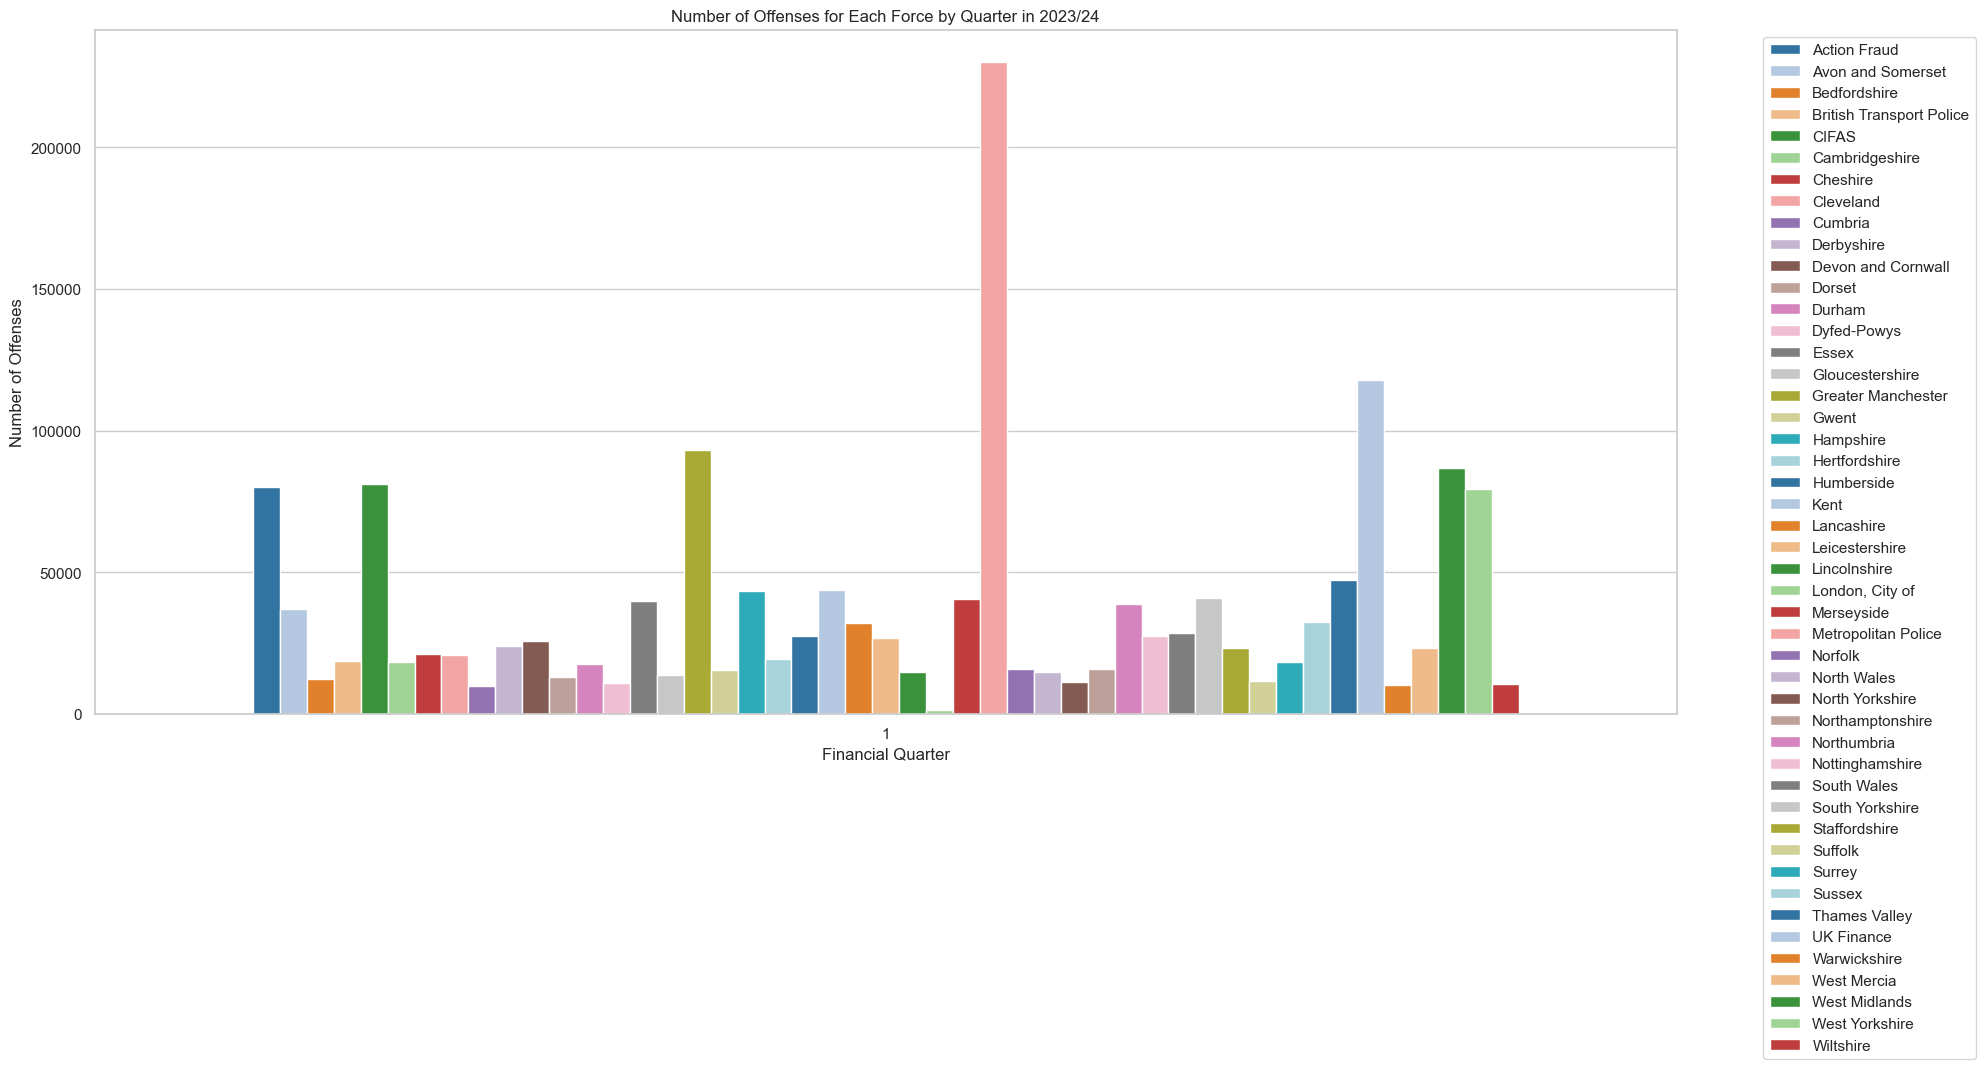

In [37]:
# Ensure seaborn styles are set
sns.set(style="whitegrid")

# Get unique years
years = data['Financial Year'].unique()

# Create a separate figure for each year
for year in years:
    # Filter data for the current year
    year_data = data[data['Financial Year'] == year]
    
    # Aggregate the data by Financial Quarter and Force Name
    aggregated_data = year_data.groupby(['Financial Quarter', 'Force Name'])['Number of Offences'].sum().reset_index()
    
    # Get distinct colors for each force
    unique_forces = aggregated_data['Force Name'].unique()
    palette = sns.color_palette("tab20", len(unique_forces))  # 'tab20' has 20 distinct colors
    
    # Create the plot
    plt.figure(figsize=(20, 10))
    
    # Plot with distinct colors
    bar_plot = sns.barplot(
        data=aggregated_data, 
        x='Financial Quarter', 
        y='Number of Offences', 
        hue='Force Name', 
        dodge=True,
        palette=palette
    )
    
    # Adjust legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set plot title and labels
    plt.title(f'Number of Offenses for Each Force by Quarter in {year}')
    plt.xlabel('Financial Quarter')
    plt.ylabel('Number of Offenses')
    
    # Improve layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [198]:
quarterly_number_of_Offence = data.groupby(['Financial Year', 'Financial Quarter', 'Force Name'])['Number of Offences'].sum().reset_index()
quarterly_number_of_Offence

Financial Year  Financial Quarter                Force Name  \
0           2012/13                  1              Action Fraud   
1           2012/13                  1         Avon and Somerset   
2           2012/13                  1              Bedfordshire   
3           2012/13                  1  British Transport Police   
4           2012/13                  1                     CIFAS   
...             ...                ...                       ...   
2110        2023/24                  1              Warwickshire   
2111        2023/24                  1               West Mercia   
2112        2023/24                  1             West Midlands   
2113        2023/24                  1            West Yorkshire   
2114        2023/24                  1                 Wiltshire   

      Number of Offences  
0                  20323  
1                  26604  
2                   9010  
3                  12681  
4                  55423  
...                  ...  
2110               10341  
2111               23370  
2112               87016  
2113               79361  
2114               10585  

[2115 rows x 4 columns]

In [306]:
Quartely_NoOffence_pivot_table = quarterly_number_of_Offence.pivot_table(index=['Financial Year', 'Financial Quarter'], 
                                          values='Number of Offences', 
                                          columns='Force Name').fillna(0).reset_index()
Quartely_NoOffence_pivot_table

Force Name Financial Year  Financial Quarter  Action Fraud  Avon and Somerset  \
0                 2012/13                  1       20323.0            26604.0   
1                 2012/13                  2       25754.0            25550.0   
2                 2012/13                  3       27464.0            24686.0   
3                 2012/13                  4       43861.0            22515.0   
4                 2013/14                  1       54377.0            24271.0   
5                 2013/14                  2       54232.0            24963.0   
6                 2013/14                  3       49746.0            24093.0   
7                 2013/14                  4       52866.0            23540.0   
8                 2014/15                  1       52517.0            24585.0   
9                 2014/15                  2       57039.0            25602.0   
10                2014/15                  3       62238.0            24467.0   
11                2014/15                  4       58529.0            23335.0   
12                2015/16                  1       59475.0            28417.0   
13                2015/16                  2       54204.0            29418.0   
14                2015/16                  3       51927.0            30140.0   
15                2015/16                  4       55032.0            31796.0   
16                2016/17                  1       61375.0            35751.0   
17                2016/17                  2       62703.0            35781.0   
18                2016/17                  3       69327.0            33863.0   
19                2016/17                  4       68538.0            34563.0   
20                2017/18                  1       66776.0            37141.0   
21                2017/18                  2       67696.0            36293.0   
22                2017/18                  3       69746.0            35035.0   
23                2017/18                  4       72815.0            31738.0   
24                2018/19                  1       74813.0            35643.0   
25                2018/19                  2       78175.0            35310.0   
26                2018/19                  3       76410.0            33362.0   
27                2018/19                  4       81688.0            32602.0   
28                2019/20                  1       84746.0            35905.0   
29                2019/20                  2       89239.0            36061.0   
30                2019/20                  3       82305.0            34394.0   
31                2019/20                  4       81960.0            34204.0   
32                2020/21                  1       87920.0            29084.0   
33                2020/21                  2      103097.0            34772.0   
34                2020/21                  3      104779.0            30043.0   
35                2020/21                  4      132693.0            27300.0   
36                2021/22                  1      112292.0            33204.0   
37                2021/22                  2       92073.0            37346.0   
38                2021/22                  3       92033.0            35612.0   
39                2021/22                  4       87246.0            34109.0   
40                2022/23                  1       85038.0            36711.0   
41                2022/23                  2       81563.0            37091.0   
42                2022/23                  3       78190.0            33634.0   
43                2022/23                  4       78312.0            34335.0   
44                2023/24                  1       79986.0            36922.0   

Force Name  Bedfordshire  British Transport Police     CIFAS  Cambridgeshire  \
0                 9010.0                   12681.0   55423.0         12069.0   
1                 8646.0                   13871.0   55474.0         12431.0   
2                 9102.0         

In [239]:
quarterly_number_of_Offence_max = quarterly_number_of_Offence.loc[quarterly_number_of_Offence['Number of Offences'].idxmax()]

quarterly_number_of_Offence_max

Financial Year                    2019/20
Financial Quarter                       2
Force Name            Metropolitan Police
Number of Offences                 234582
Name: 1390, dtype: object

In [238]:
quarterly_number_of_Offence_min = quarterly_number_of_Offence.loc[quarterly_number_of_Offence['Number of Offences'].idxmin()]

quarterly_number_of_Offence_min

Financial Year                2020/21
Financial Quarter                   1
Force Name            London, City of
Number of Offences                632
Name: 1529, dtype: object

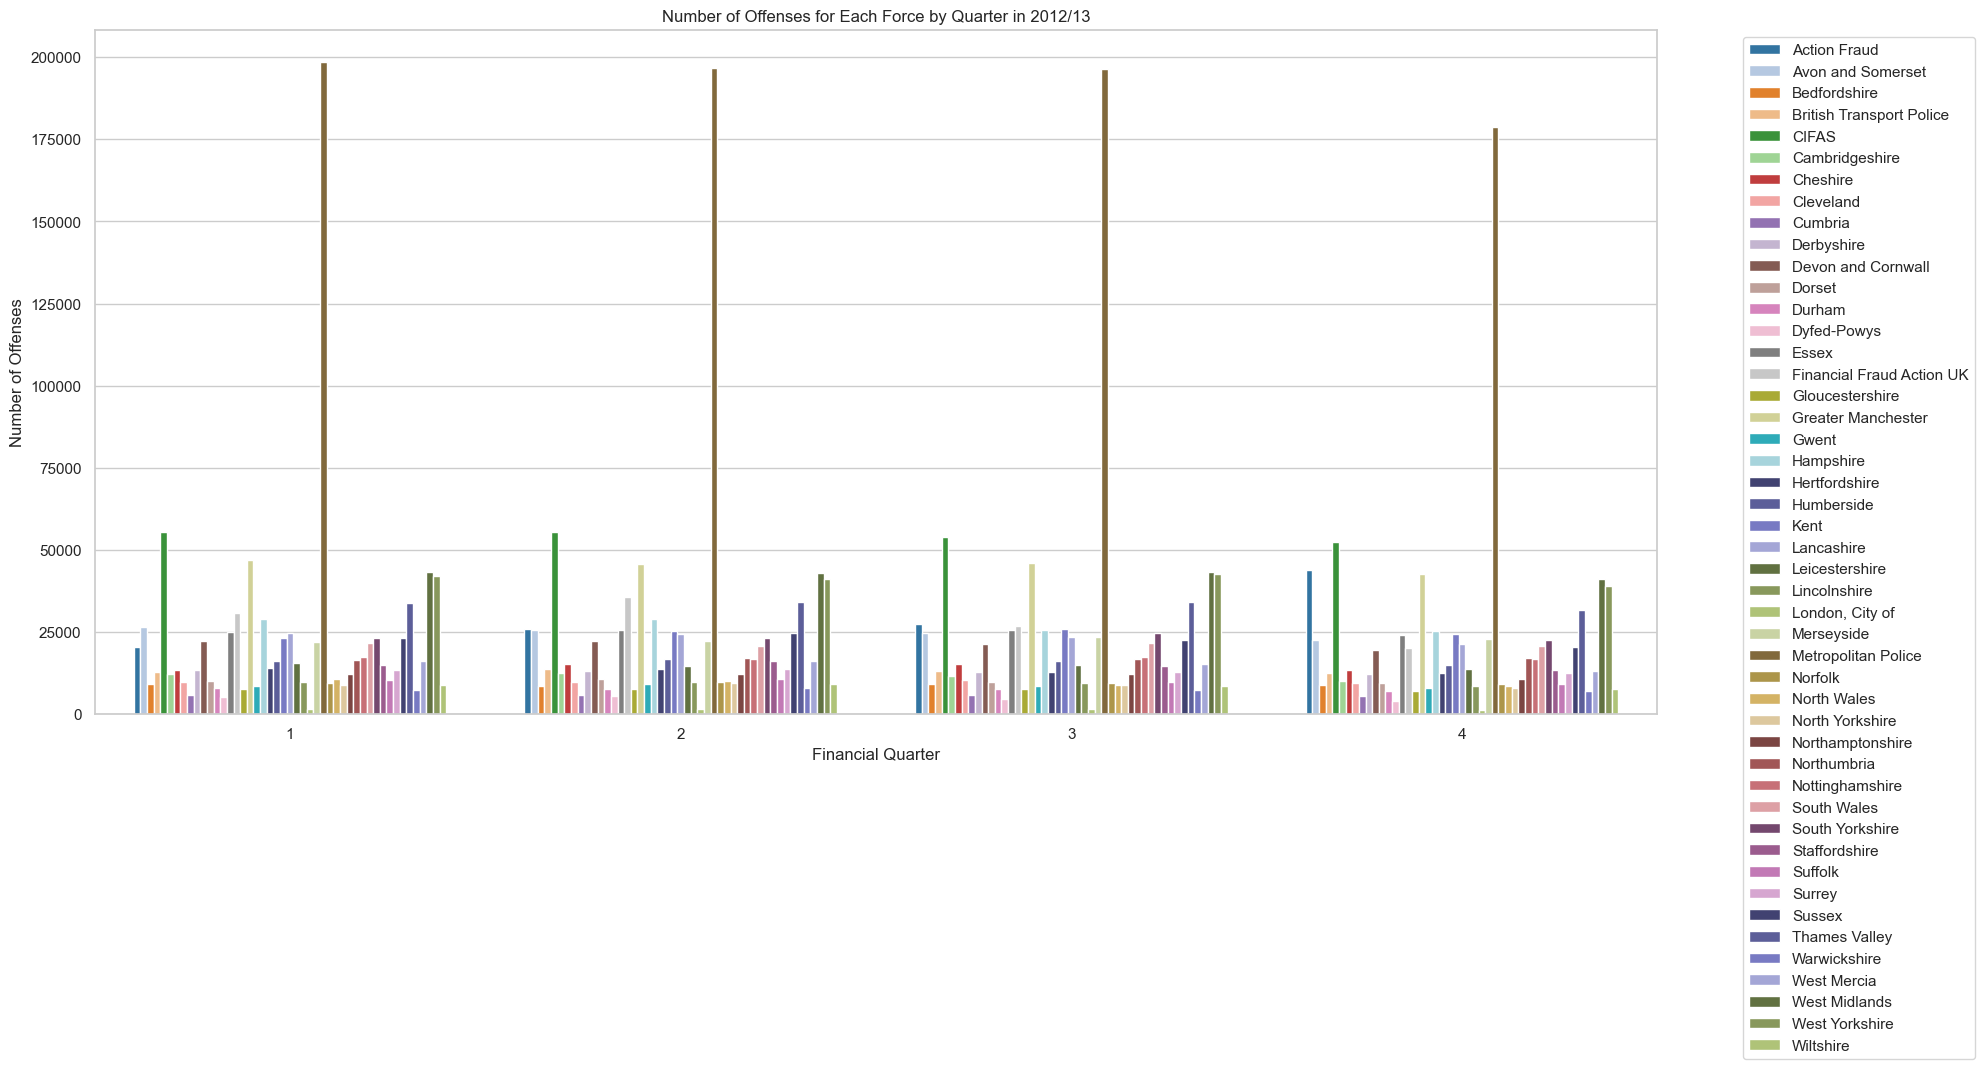

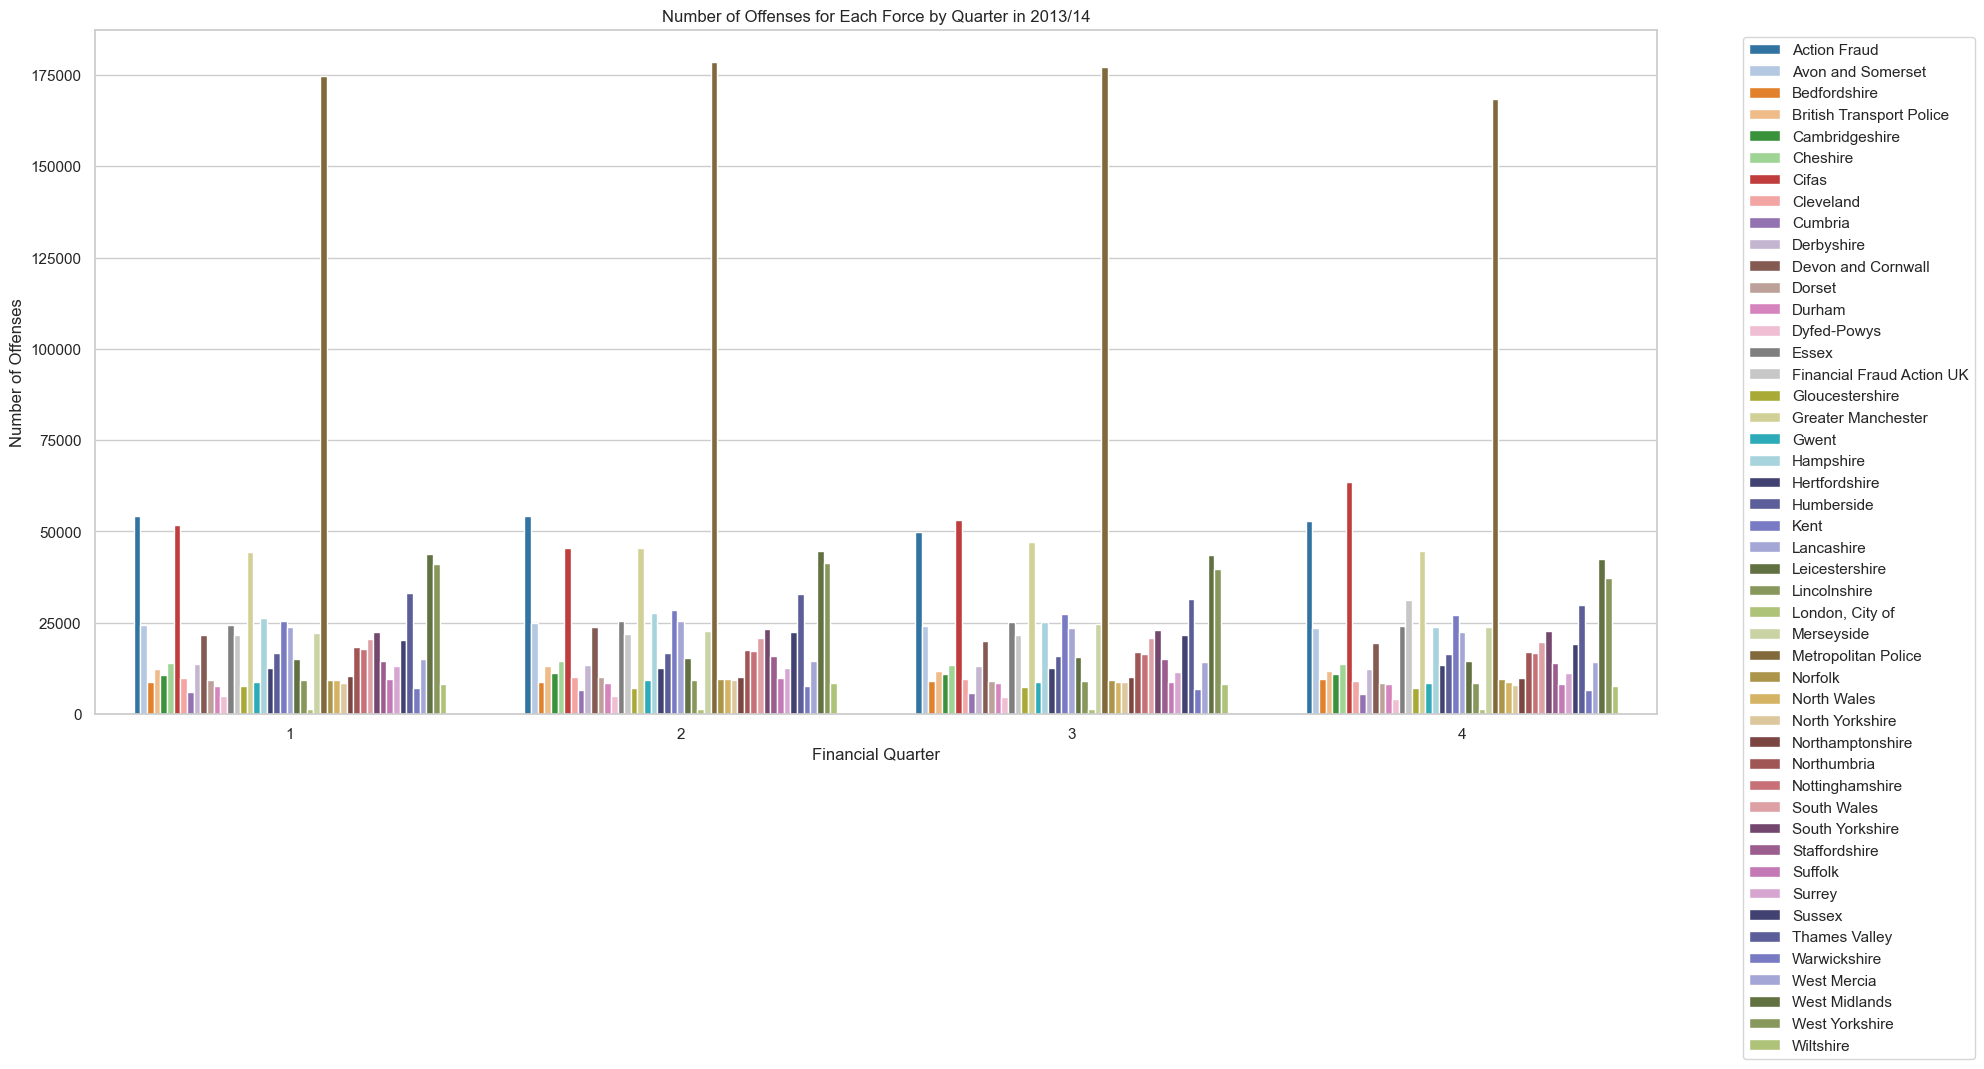

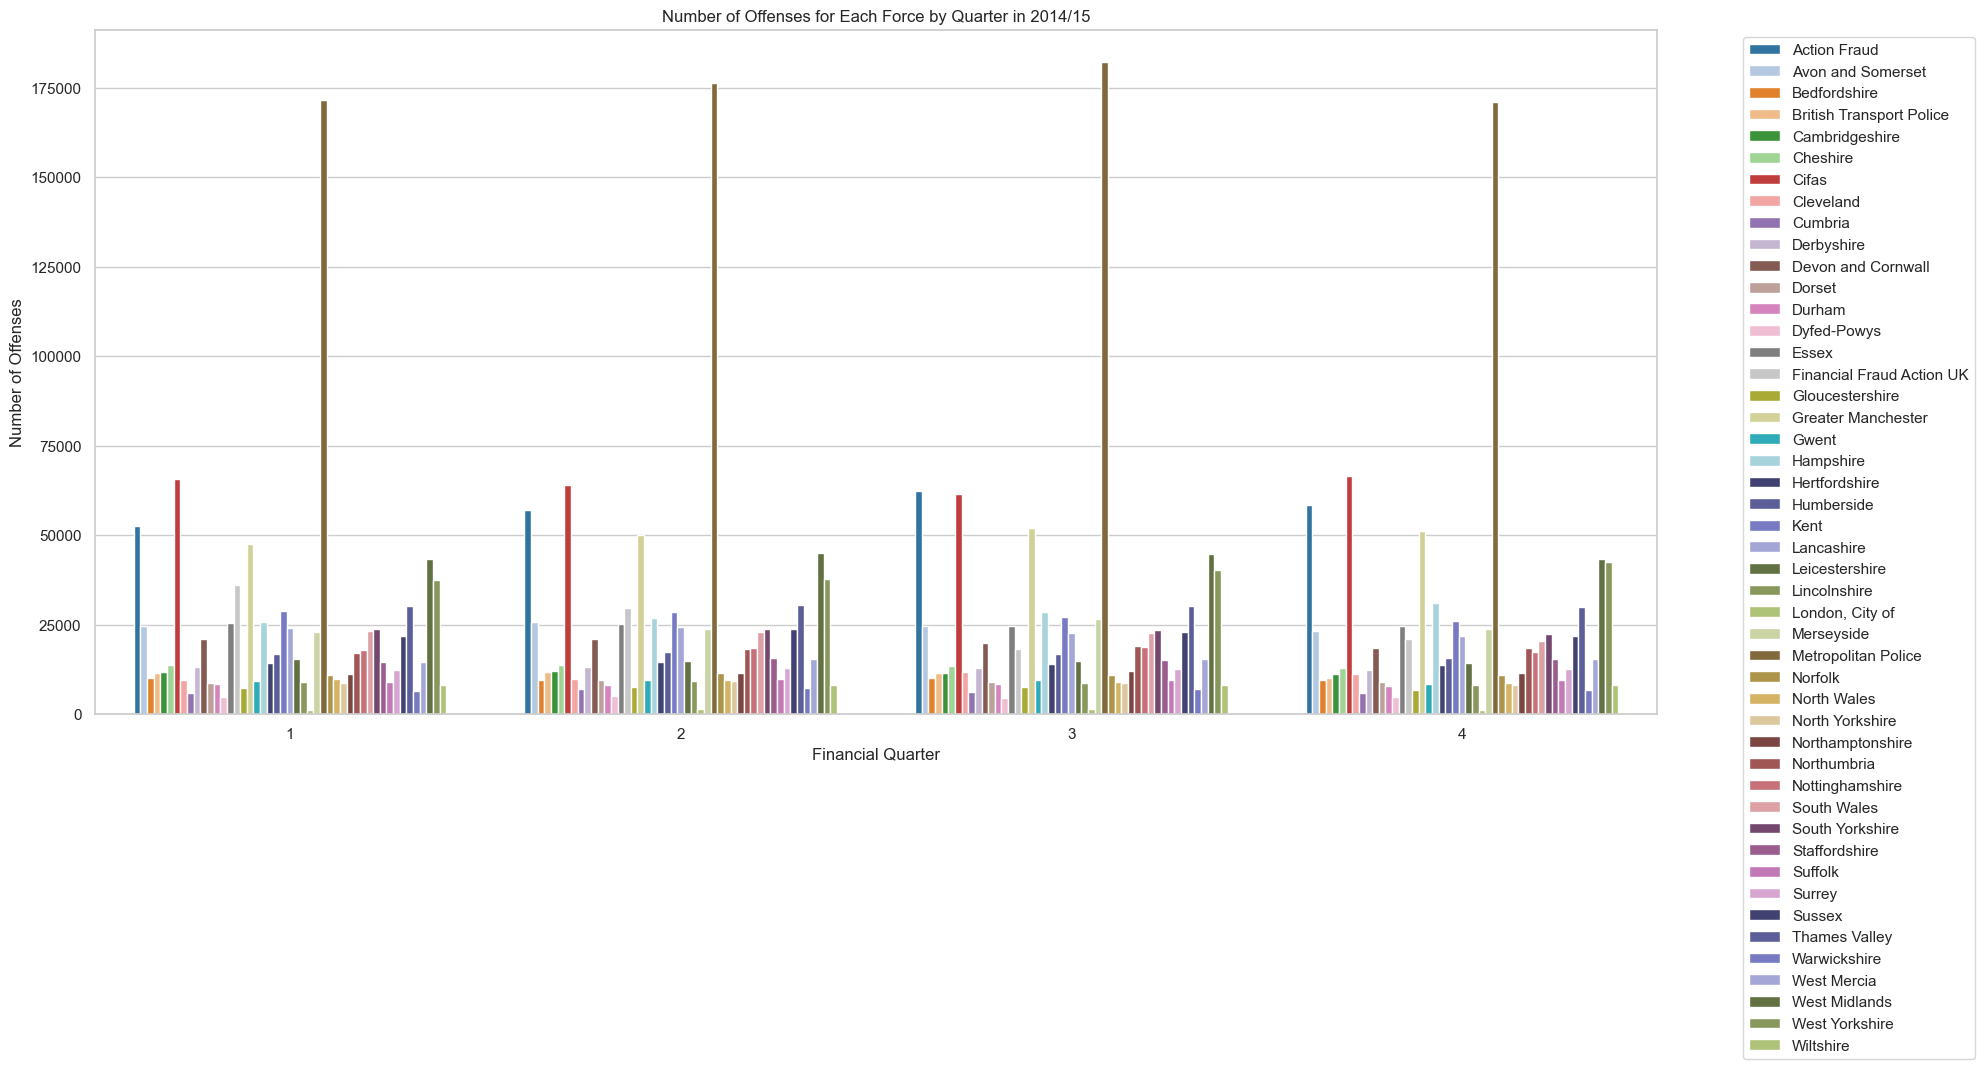

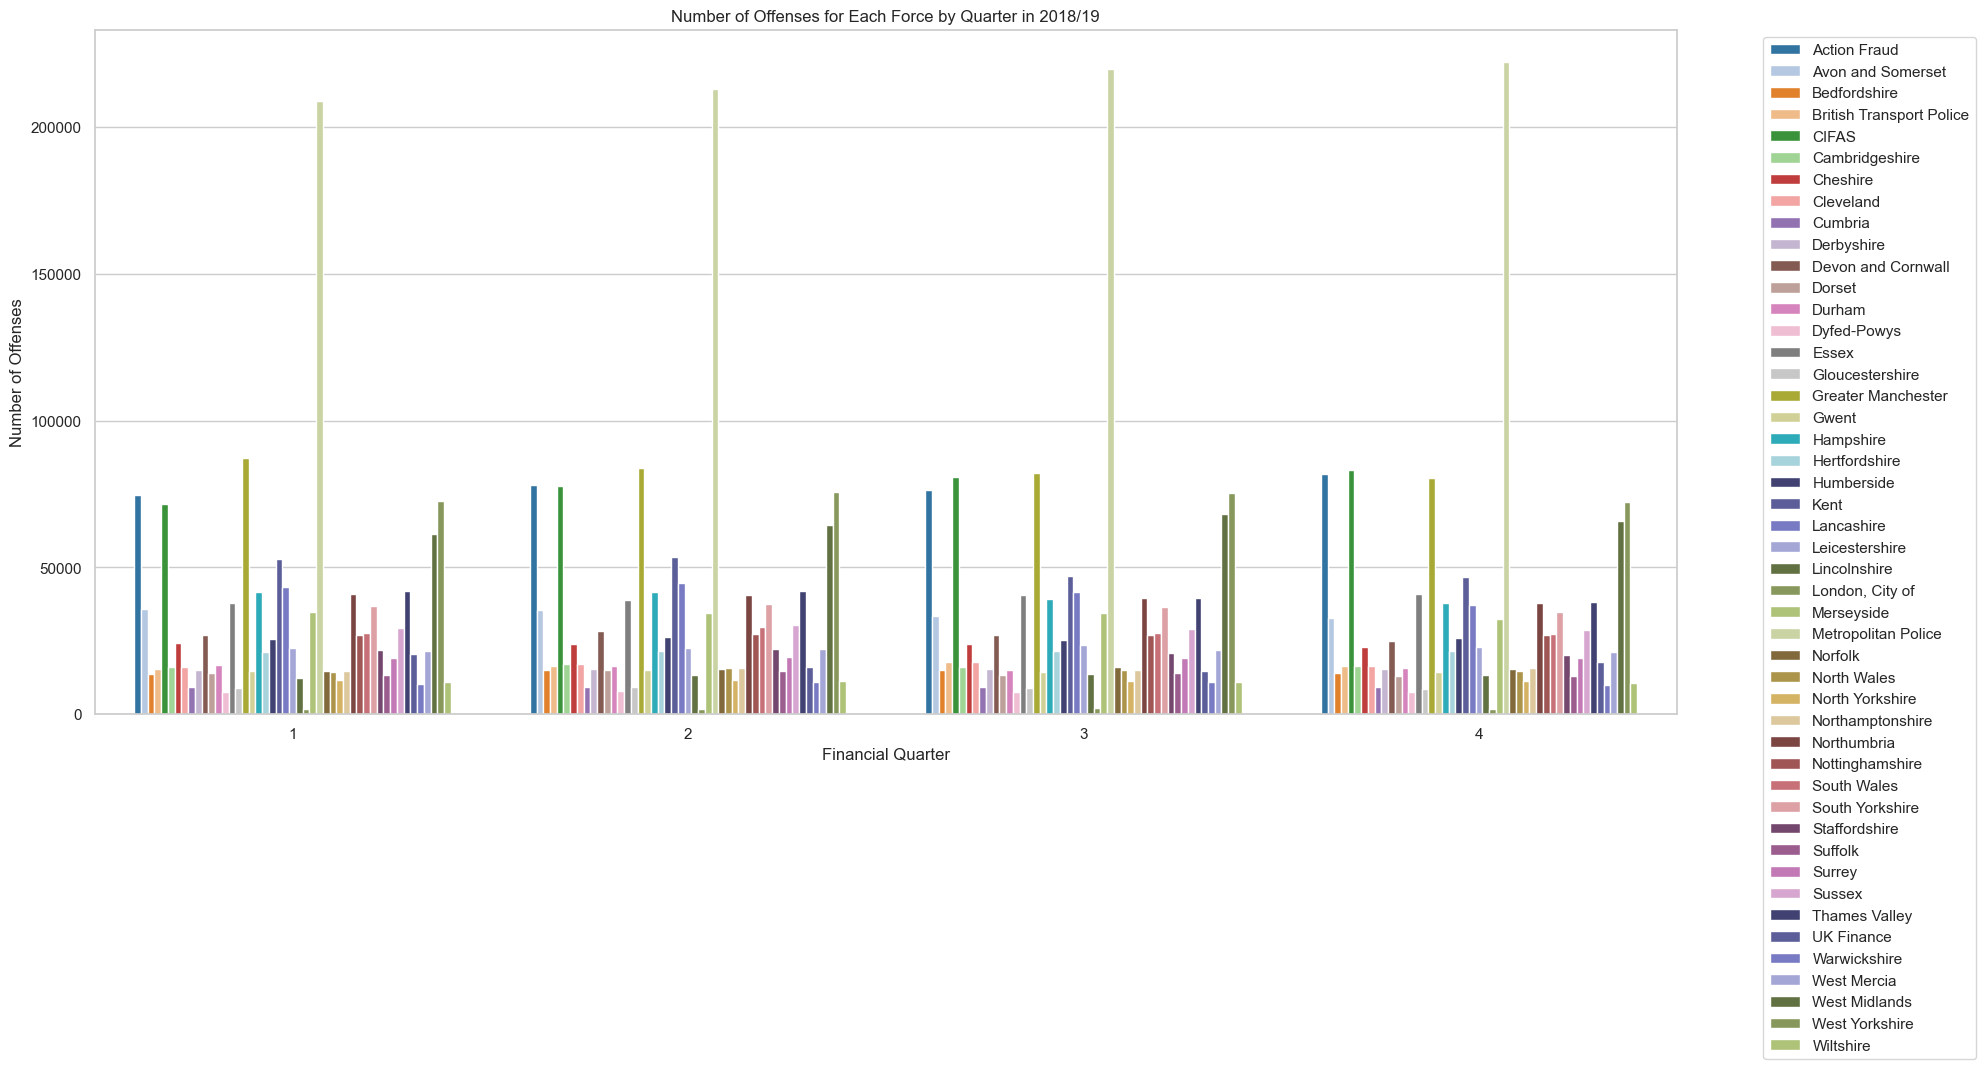

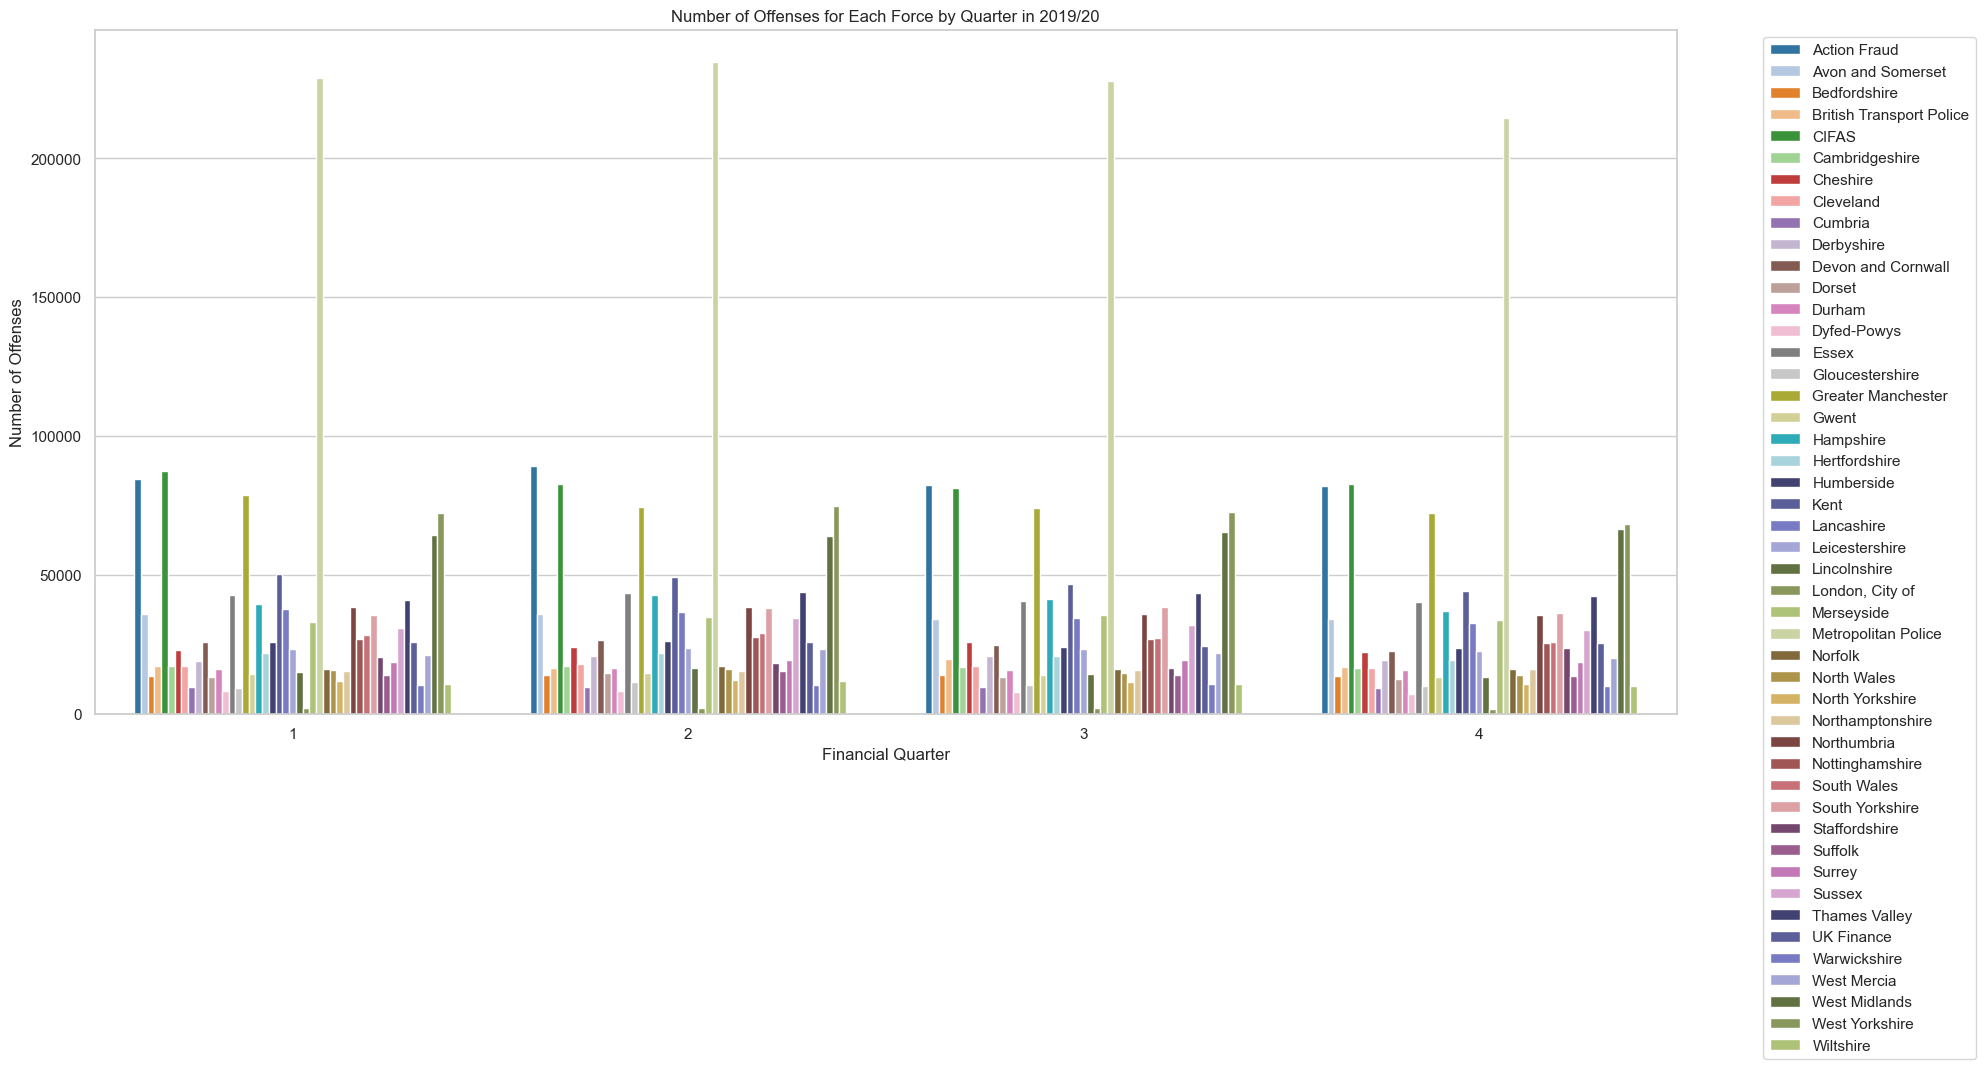

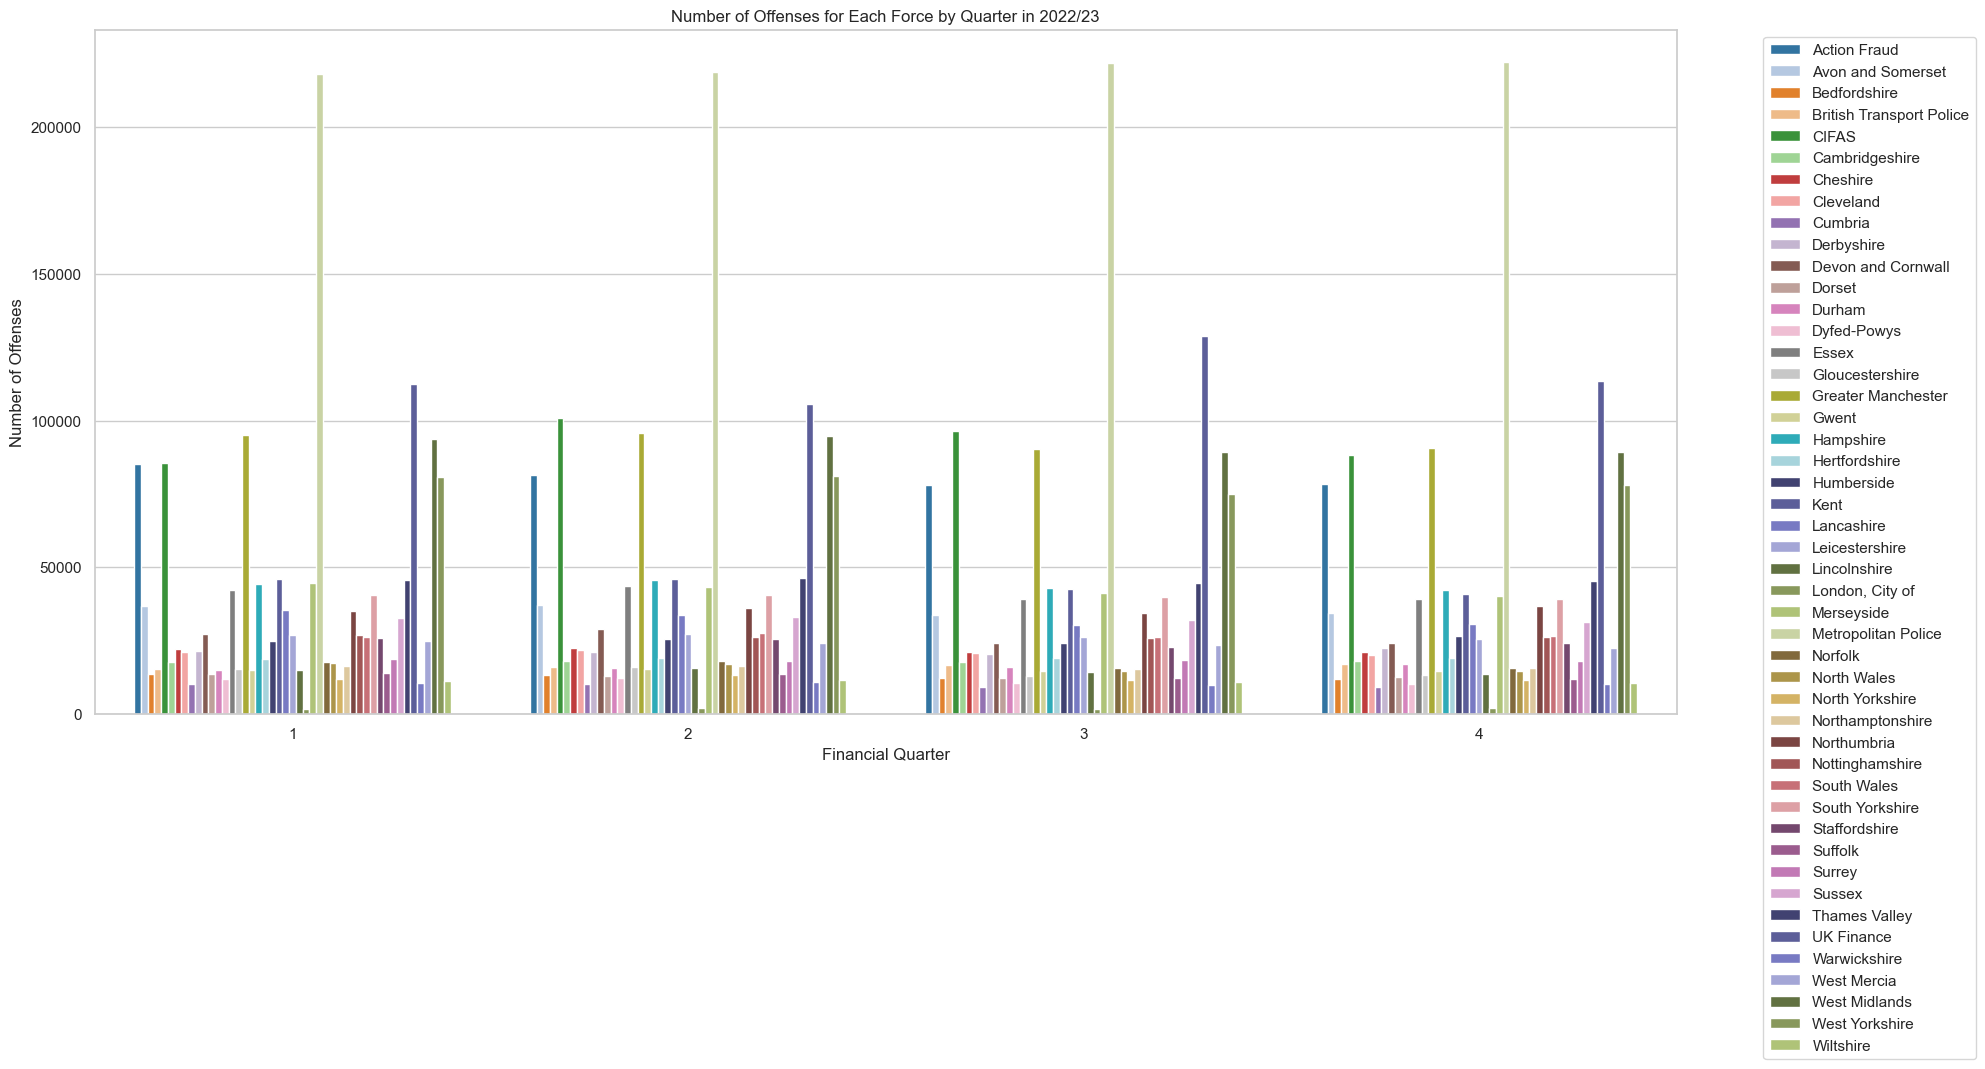

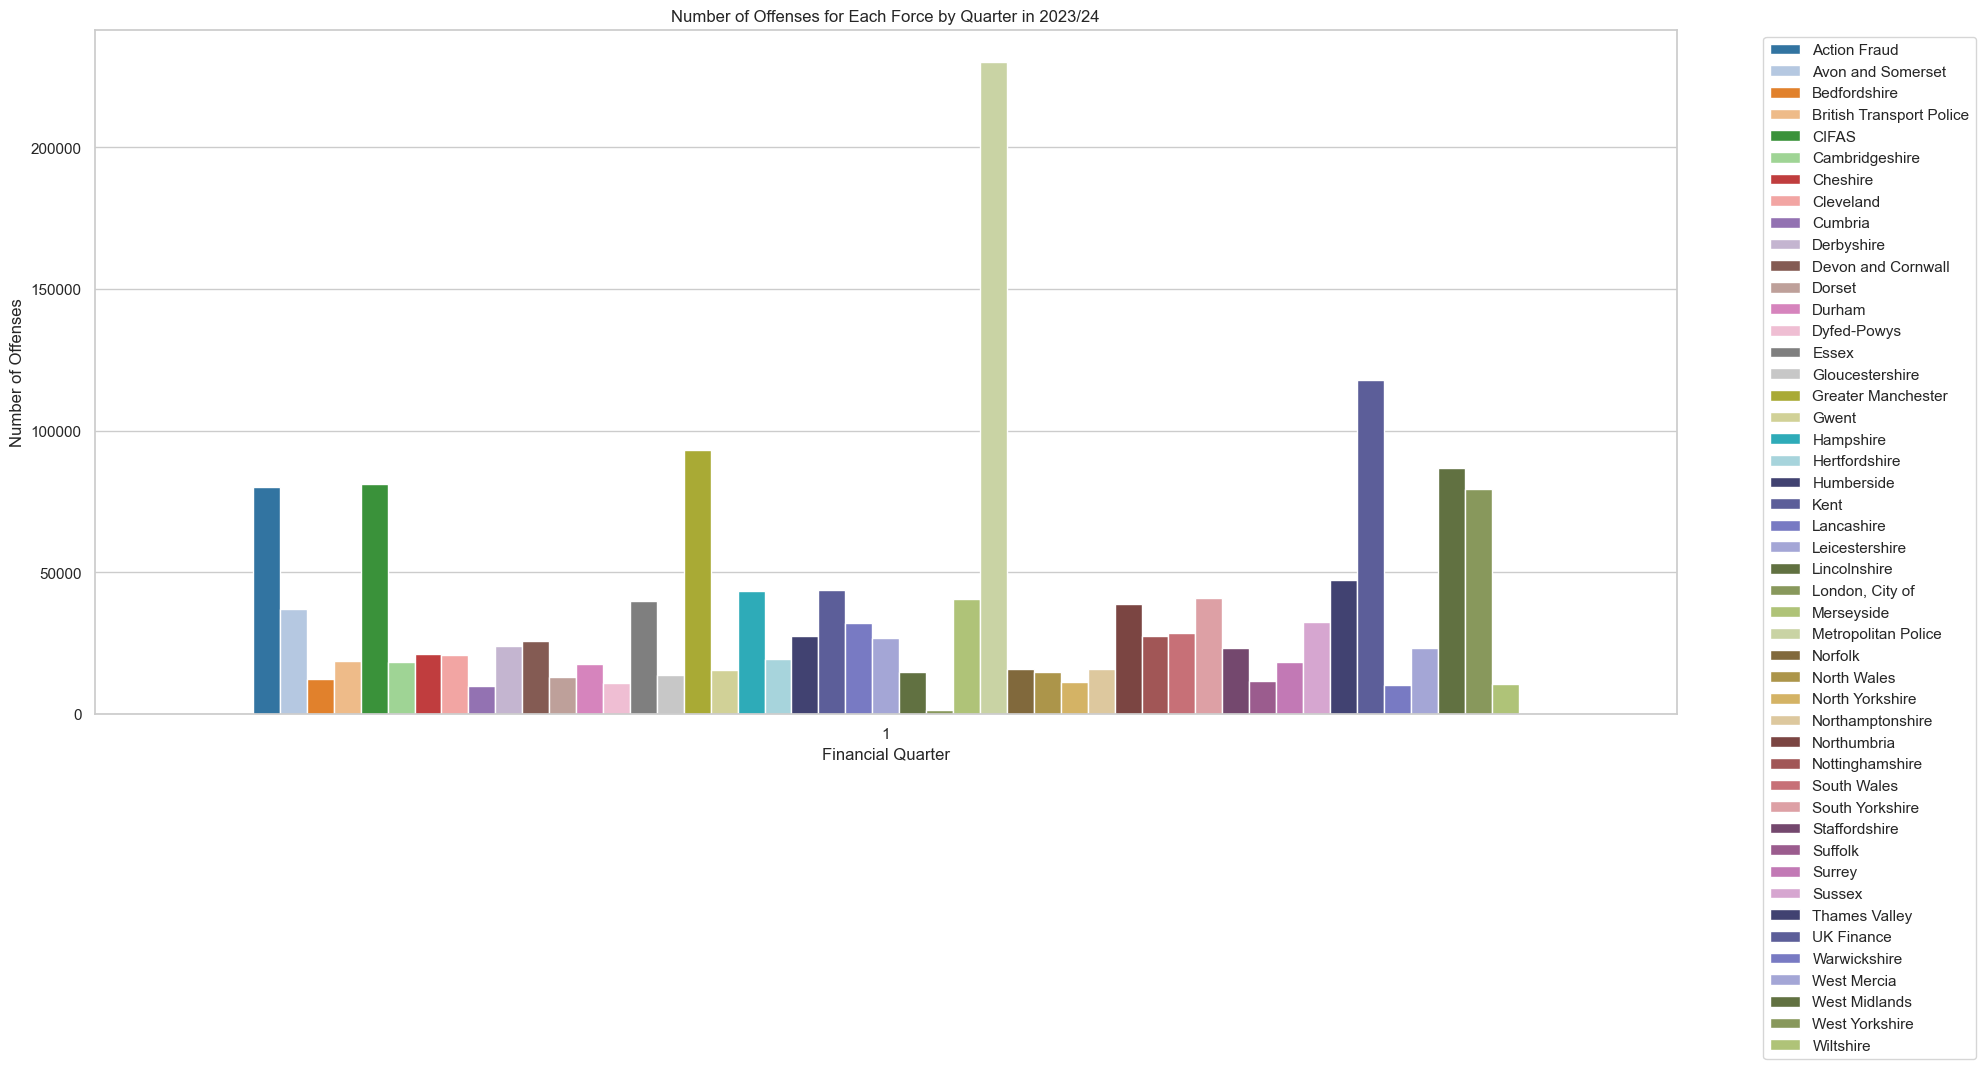

In [39]:
# Ensure seaborn styles are set
sns.set(style="whitegrid")

# Get unique years
years = data['Financial Year'].unique()

# Create a separate figure for each year
for year in years:
    # Filter data for the current year
    year_data = data[data['Financial Year'] == year]
    
    # Aggregate the data by Financial Quarter and Force Name
    aggregated_data = year_data.groupby(['Financial Quarter', 'Force Name'])['Number of Offences'].sum().reset_index()
    
    # Get distinct colors for each force
    unique_forces = aggregated_data['Force Name'].unique()
    
    # Generate a custom palette
    palette = sns.color_palette("tab20", min(20, len(unique_forces)))
    if len(unique_forces) > 20:
        additional_colors = sns.color_palette("tab20b", len(unique_forces) - 20)
        palette.extend(additional_colors)
    
    # Create the plot
    plt.figure(figsize=(20, 10))
    
    # Plot with distinct colors
    bar_plot = sns.barplot(
        data=aggregated_data, 
        x='Financial Quarter', 
        y='Number of Offences', 
        hue='Force Name', 
        dodge=True,
        palette=palette
    )
    
    # Adjust legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set plot title and labels
    plt.title(f'Number of Offenses for Each Force by Quarter in {year}')
    plt.xlabel('Financial Quarter')
    plt.ylabel('Number of Offenses')
    
    # Improve layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [346]:
offence_group_counts = data.groupby(['Force Name', 'Offence Group'])['Number of Offences'].sum().reset_index()
offence_group_counts

Force Name                         Offence Group  \
0         Action Fraud                        Fraud offences   
1    Avon and Somerset             Criminal damage and arson   
2    Avon and Somerset                         Drug offences   
3    Avon and Somerset                        Fraud offences   
4    Avon and Somerset  Miscellaneous crimes against society   
..                 ...                                   ...   
440          Wiltshire                 Public order offences   
441          Wiltshire                               Robbery   
442          Wiltshire                       Sexual offences   
443          Wiltshire                        Theft offences   
444          Wiltshire           Violence against the person   

     Number of Offences  
0               3183118  
1                168818  
2                 45060  
3                  1498  
4                 21582  
..                  ...  
440               28395  
441                2897  
442               16021  
443              163590  
444              143351  

[445 rows x 3 columns]

In [352]:
No_Group_pivot_table = offence_group_counts.pivot_table(index='Force Name', 
                                          values='Number of Offences', 
                                          columns='Offence Group').fillna(0).reset_index()
No_Group_pivot_table

Offence Group                 Force Name  Criminal damage and arson  \
0                           Action Fraud                        0.0   
1                      Avon and Somerset                   168818.0   
2                           Bedfordshire                    60409.0   
3               British Transport Police                    70689.0   
4                                  CIFAS                        0.0   
5                         Cambridgeshire                    79786.0   
6                               Cheshire                   100525.0   
7                                  Cifas                        0.0   
8                              Cleveland                   103148.0   
9                                Cumbria                    57767.0   
10                            Derbyshire                    96050.0   
11                    Devon and Cornwall                   156444.0   
12                                Dorset                    73367.0   
13                                Durham                    94313.0   
14                           Dyfed-Powys                    44456.0   
15                                 Essex                   170241.0   
16             Financial Fraud Action UK                        0.0   
17                       Gloucestershire                    52902.0   
18                    Greater Manchester                   370459.0   
19                                 Gwent                    84783.0   
20                             Hampshire                   193442.0   
21                         Hertfordshire                    94043.0   
22                            Humberside                   131449.0   
23                                  Kent                   227370.0   
24                            Lancashire                   193214.0   
25                        Leicestershire                   111487.0   
26                          Lincolnshire                    66088.0   
27                       London, City of                     2687.0   
28                            Merseyside                   181404.0   
29                   Metropolitan Police                   640096.0   
30                               Norfolk                    81546.0   
31                           North Wales                    80724.0   
32                       North Yorkshire                    63312.0   
33                      Northamptonshire                    76424.0   
34                           Northumbria                   204325.0   
35                       Nottinghamshire                   125022.0   
36                           South Wales                   143205.0   
37                       South Yorkshire                   194038.0   
38                         Staffordshire                   110938.0   
39                               Suffolk                    70614.0   
40                                Surrey                    96818.0   
41                                Sussex                   153574.0   
42                         Thames Valley                   198845.0   
43                            UK Finance                        0.0   
44                          Warwickshire                    47467.0   
45                           West Mercia                   105715.0   
46                         West Midlands                   282348.0   
47                        West Yorkshire                   317749.0   
48                             Wiltshire                    62577.0   

Offence Group  Drug offences  Fraud offences  \
0                        0.0       3183118.0   
1                    45060.0          1498.0   
2                    16893.0           536.0   
3                    29692.0           512.0   
4                        0.0       2231228.0   
5                    21752.0           843.0   
6                    26893.0           683.0   
7                        0.0       1077081.0   
8                

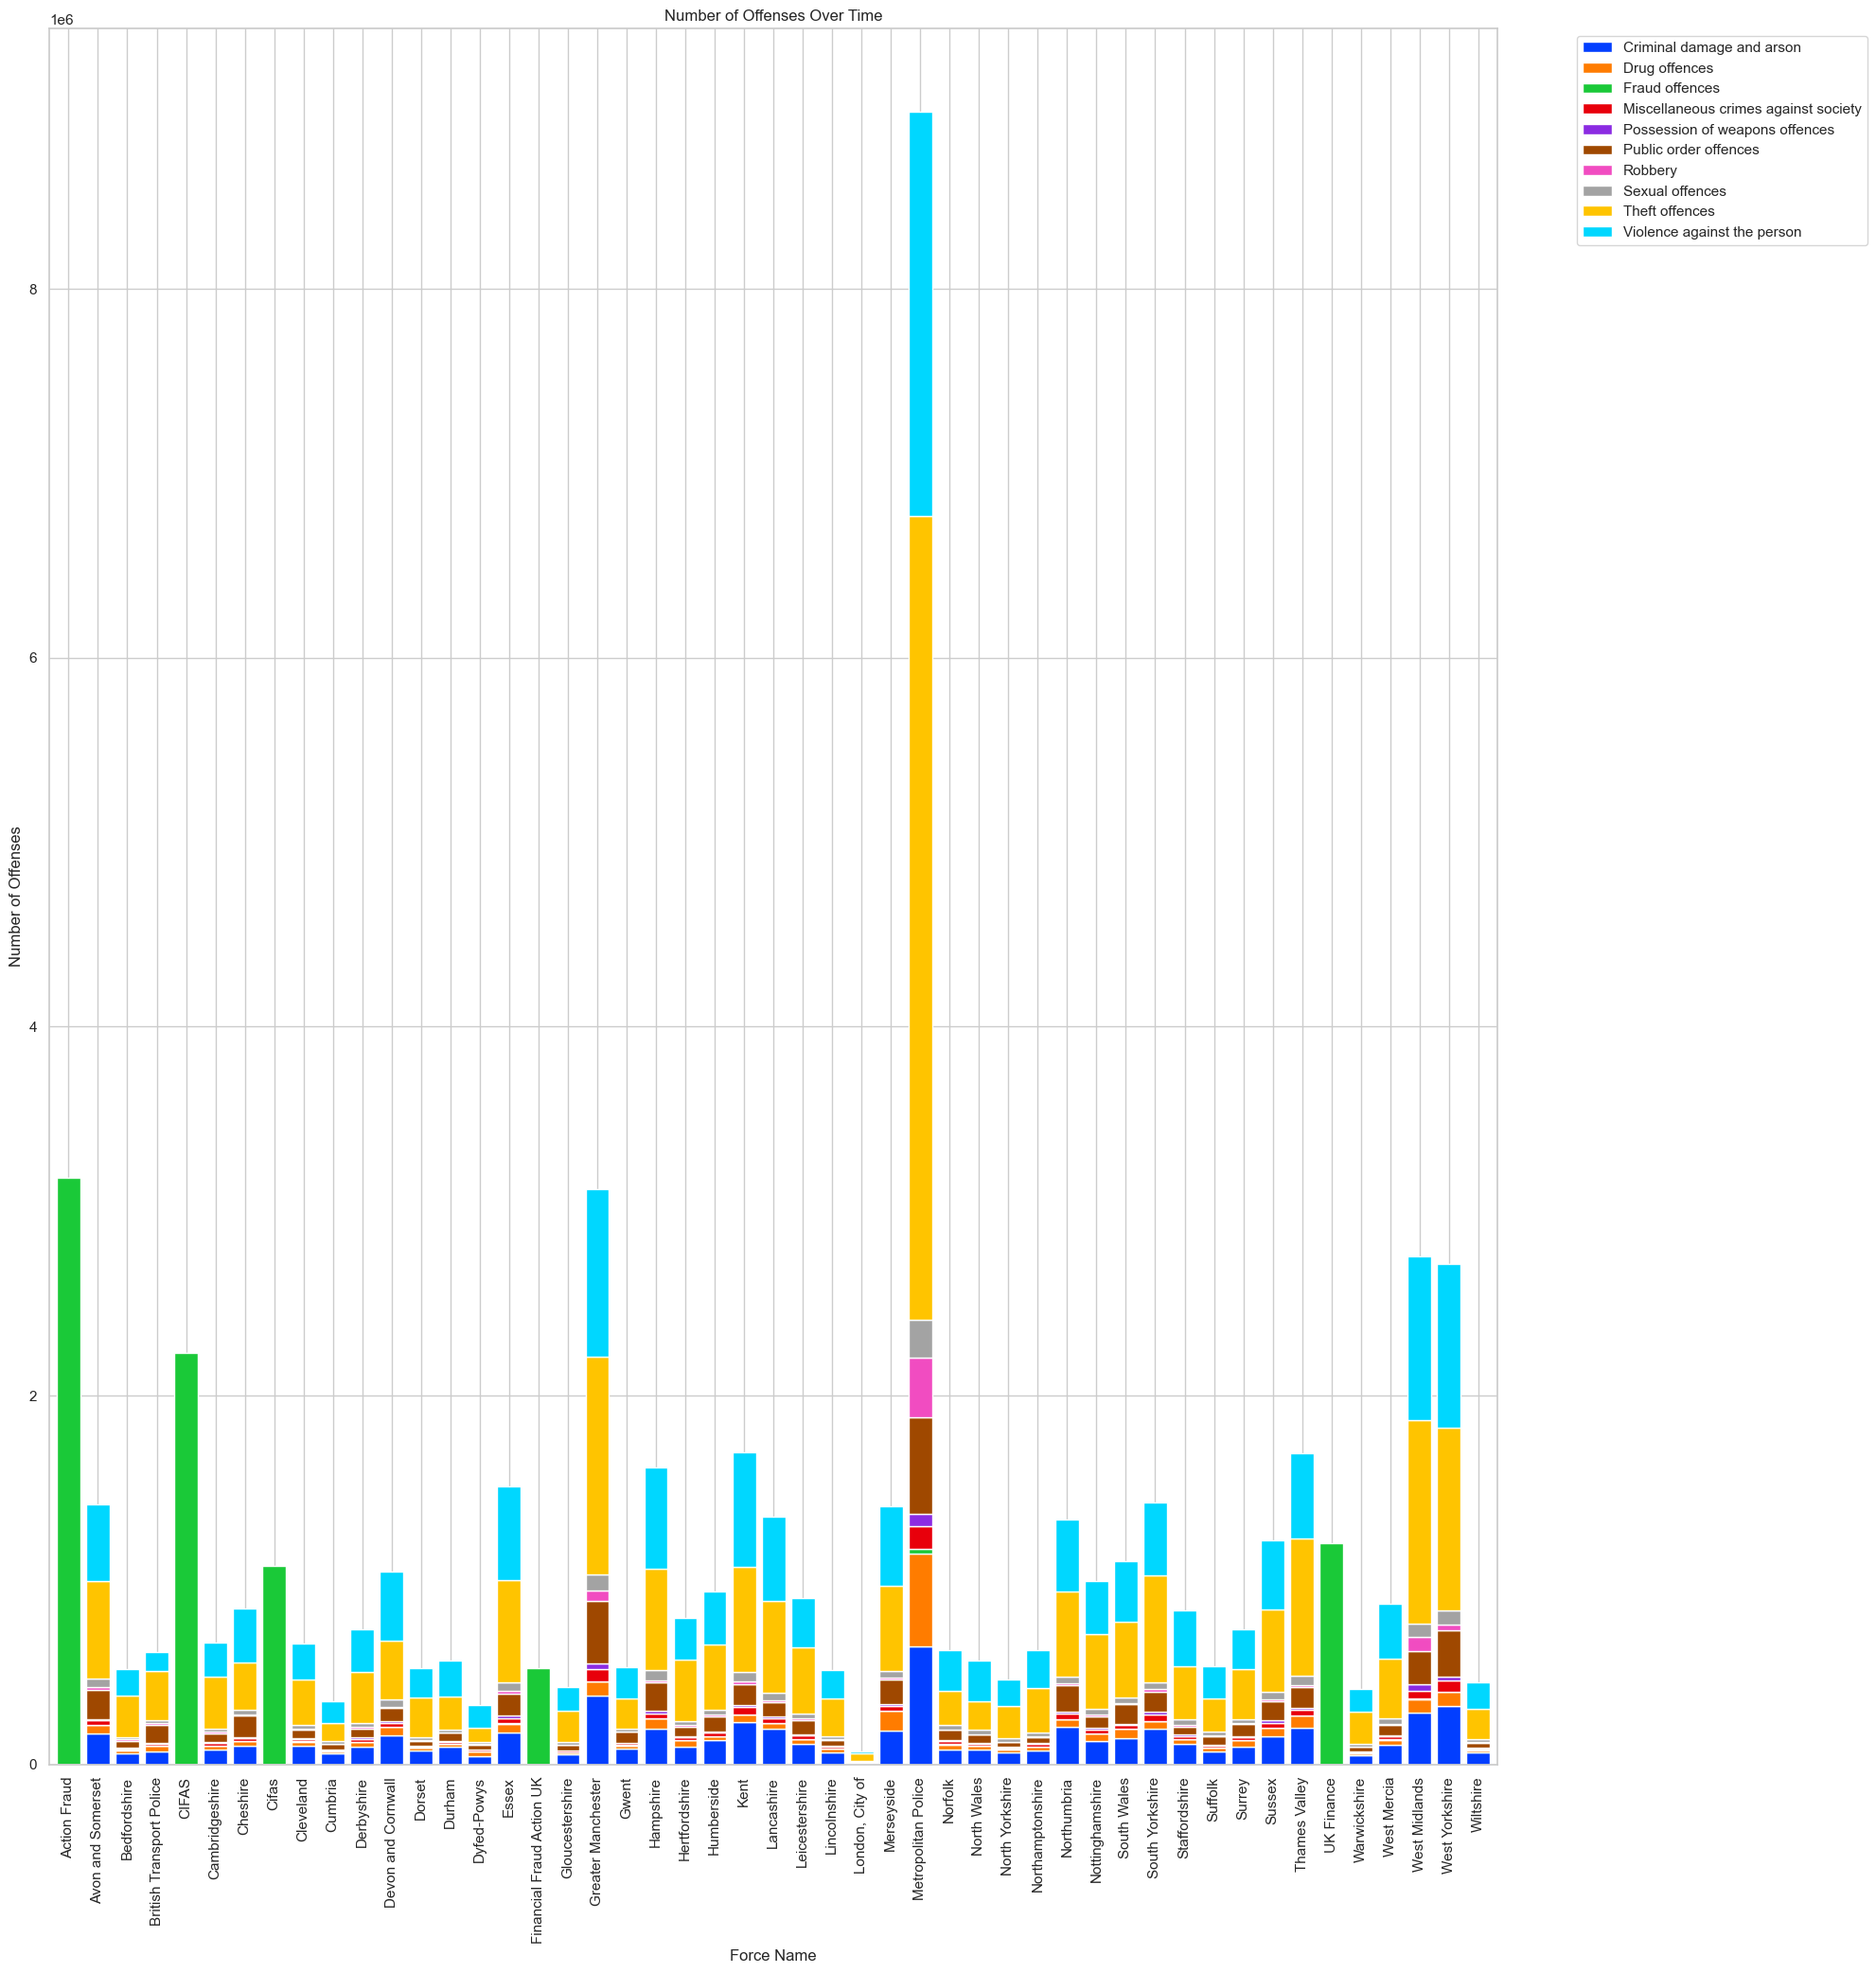

In [356]:
sns.set(style="whitegrid", palette="bright")

# Plot the pivot table as a bar plot
fig, ax = plt.subplots(figsize=(20, 21))
No_Group_pivot_table.plot(kind='bar', x = 'Force Name', stacked=True, ax=ax, width=0.8)

# Set plot title and labels
plt.title('Number of Offenses Over Time')
plt.xlabel('Force Name')
plt.xticks(rotation=90)
plt.ylabel('Number of Offenses')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


In [357]:
col = No_Group_pivot_table.select_dtypes(include='number' ).columns
Offence_Group_sum = pd.DataFrame(No_Group_pivot_table[col].sum()).reset_index()
Offence_Group_sum

Offence Group           0
0             Criminal damage and arson   6040678.0
1                         Drug offences   1956510.0
2                        Fraud offences   8277914.0
3  Miscellaneous crimes against society    964455.0
4        Possession of weapons offences    419491.0
5                 Public order offences   4029186.0
6                               Robbery    758696.0
7                       Sexual offences   1502423.0
8                        Theft offences  20054575.0
9           Violence against the person  15518807.0

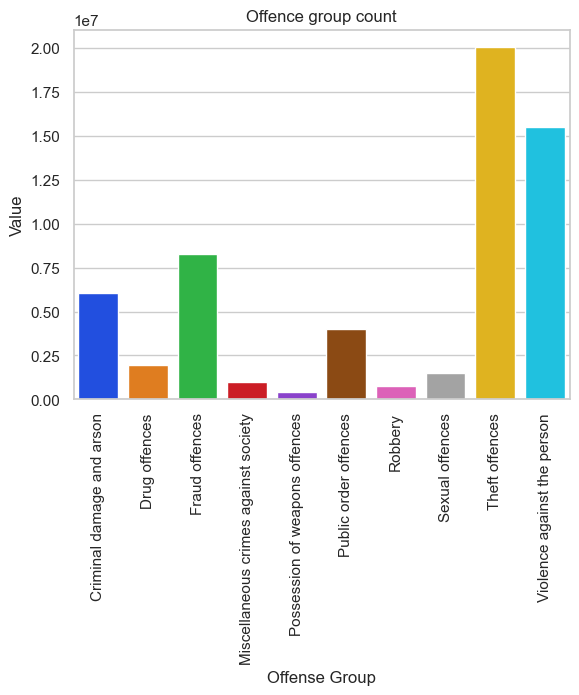

In [361]:
sns.barplot(data = Offence_Group_sum, x = 'Offence Group', y = 0  )
plt.title('Offence group count')
plt.xlabel('Offense Group')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.show()

In [362]:
Sub_Offence = data.groupby(['Force Name', 'Offence Subgroup',])['Number of Offences'].sum().reset_index()
Sub_Offence

Force Name          Offence Subgroup  Number of Offences
0          Action Fraud       Fraud: Action Fraud             2906085
1          Action Fraud       Fraud: action fraud              277033
2     Avon and Somerset                     Arson                7593
3     Avon and Somerset             Bicycle theft               33459
4     Avon and Somerset           Criminal damage              161225
...                 ...                       ...                 ...
1145          Wiltshire  Theft of a motor vehicle                6229
1146          Wiltshire      Trafficking of drugs                2916
1147          Wiltshire      Vehicle interference                4547
1148          Wiltshire      Violence with injury               59133
1149          Wiltshire   Violence without injury               58909

[1150 rows x 3 columns]

In [363]:
Sub_Offence_pivot_table = Sub_Offence.pivot_table(index='Force Name', 
                                          values='Number of Offences', 
                                          columns='Offence Subgroup').fillna(0).reset_index()
Sub_Offence_pivot_table

Offence Subgroup                 Force Name    Arson  Bicycle theft  \
0                              Action Fraud      0.0            0.0   
1                         Avon and Somerset   7593.0        33459.0   
2                              Bedfordshire   2488.0        10472.0   
3                  British Transport Police   1090.0        57596.0   
4                                     CIFAS      0.0            0.0   
5                            Cambridgeshire   3674.0        40408.0   
6                                  Cheshire   3969.0        15063.0   
7                                     Cifas      0.0            0.0   
8                                 Cleveland   4525.0        10087.0   
9                                   Cumbria   2059.0         3409.0   
10                               Derbyshire   3578.0        10382.0   
11                       Devon and Cornwall   6307.0         9717.0   
12                                   Dorset   1912.0        13999.0   
13                                   Durham   5263.0         5593.0   
14                              Dyfed-Powys   1622.0         1836.0   
15                                    Essex   8922.0        23403.0   
16                Financial Fraud Action UK      0.0            0.0   
17                          Gloucestershire   2854.0        10036.0   
18                       Greater Manchester  18777.0        45531.0   
19                                    Gwent   7520.0         4093.0   
20                                Hampshire   6250.0        37255.0   
21                            Hertfordshire   2701.0        14626.0   
22                               Humberside   6675.0        23346.0   
23                                     Kent   7327.0        17640.0   
24                               Lancashire   7745.0        18783.0   
25                           Leicestershire   4489.0        21881.0   
26                             Lincolnshire   3931.0        12274.0   
27                          London, City of     44.0         3821.0   
28                               Merseyside   8284.0        20396.0   
29                      Metropolitan Police  21917.0       219367.0   
30                                  Norfolk   3818.0        13467.0   
31                              North Wales   5131.0         5237.0   
32                          North Yorkshire   2024.0        13330.0   
33                         Northamptonshire   3640.0         9190.0   
34                              Northumbria  12185.0        20929.0   
35                          Nottinghamshire   5875.0        20282.0   
36                              South Wales   5914.0        21233.0   
37                          South Yorkshire  11129.0        13565.0   
38                            Staffordshire   4921.0        10902.0   
39                                  Suffolk   3425.0        11265.0   
40                                   Surrey   3726.0        13231.0   
41                                   Sussex   6640.0        26629.0   
42                            Thames Valley   9928.0        58165.0   
43                               UK Finance      0.0            0.0   
44                             Warwickshire   1904.0         7140.0   
45                              West Mercia   4091.0        11482.0   
46                            West Midlands  12148.0        32691.0   
47                           West Yorkshire  16686.0        24795.0   
48                                Wiltshire   1724.0         8610.0   

Offence Subgroup  Criminal damage  Death or serious injury - unlawful driving  \
0                             0.0                                         0.0   
1                        161225.0                                        61.0   
2                         57921.0                                       156.0   
3                         69599.0                                         1.0   
4                             0.0           

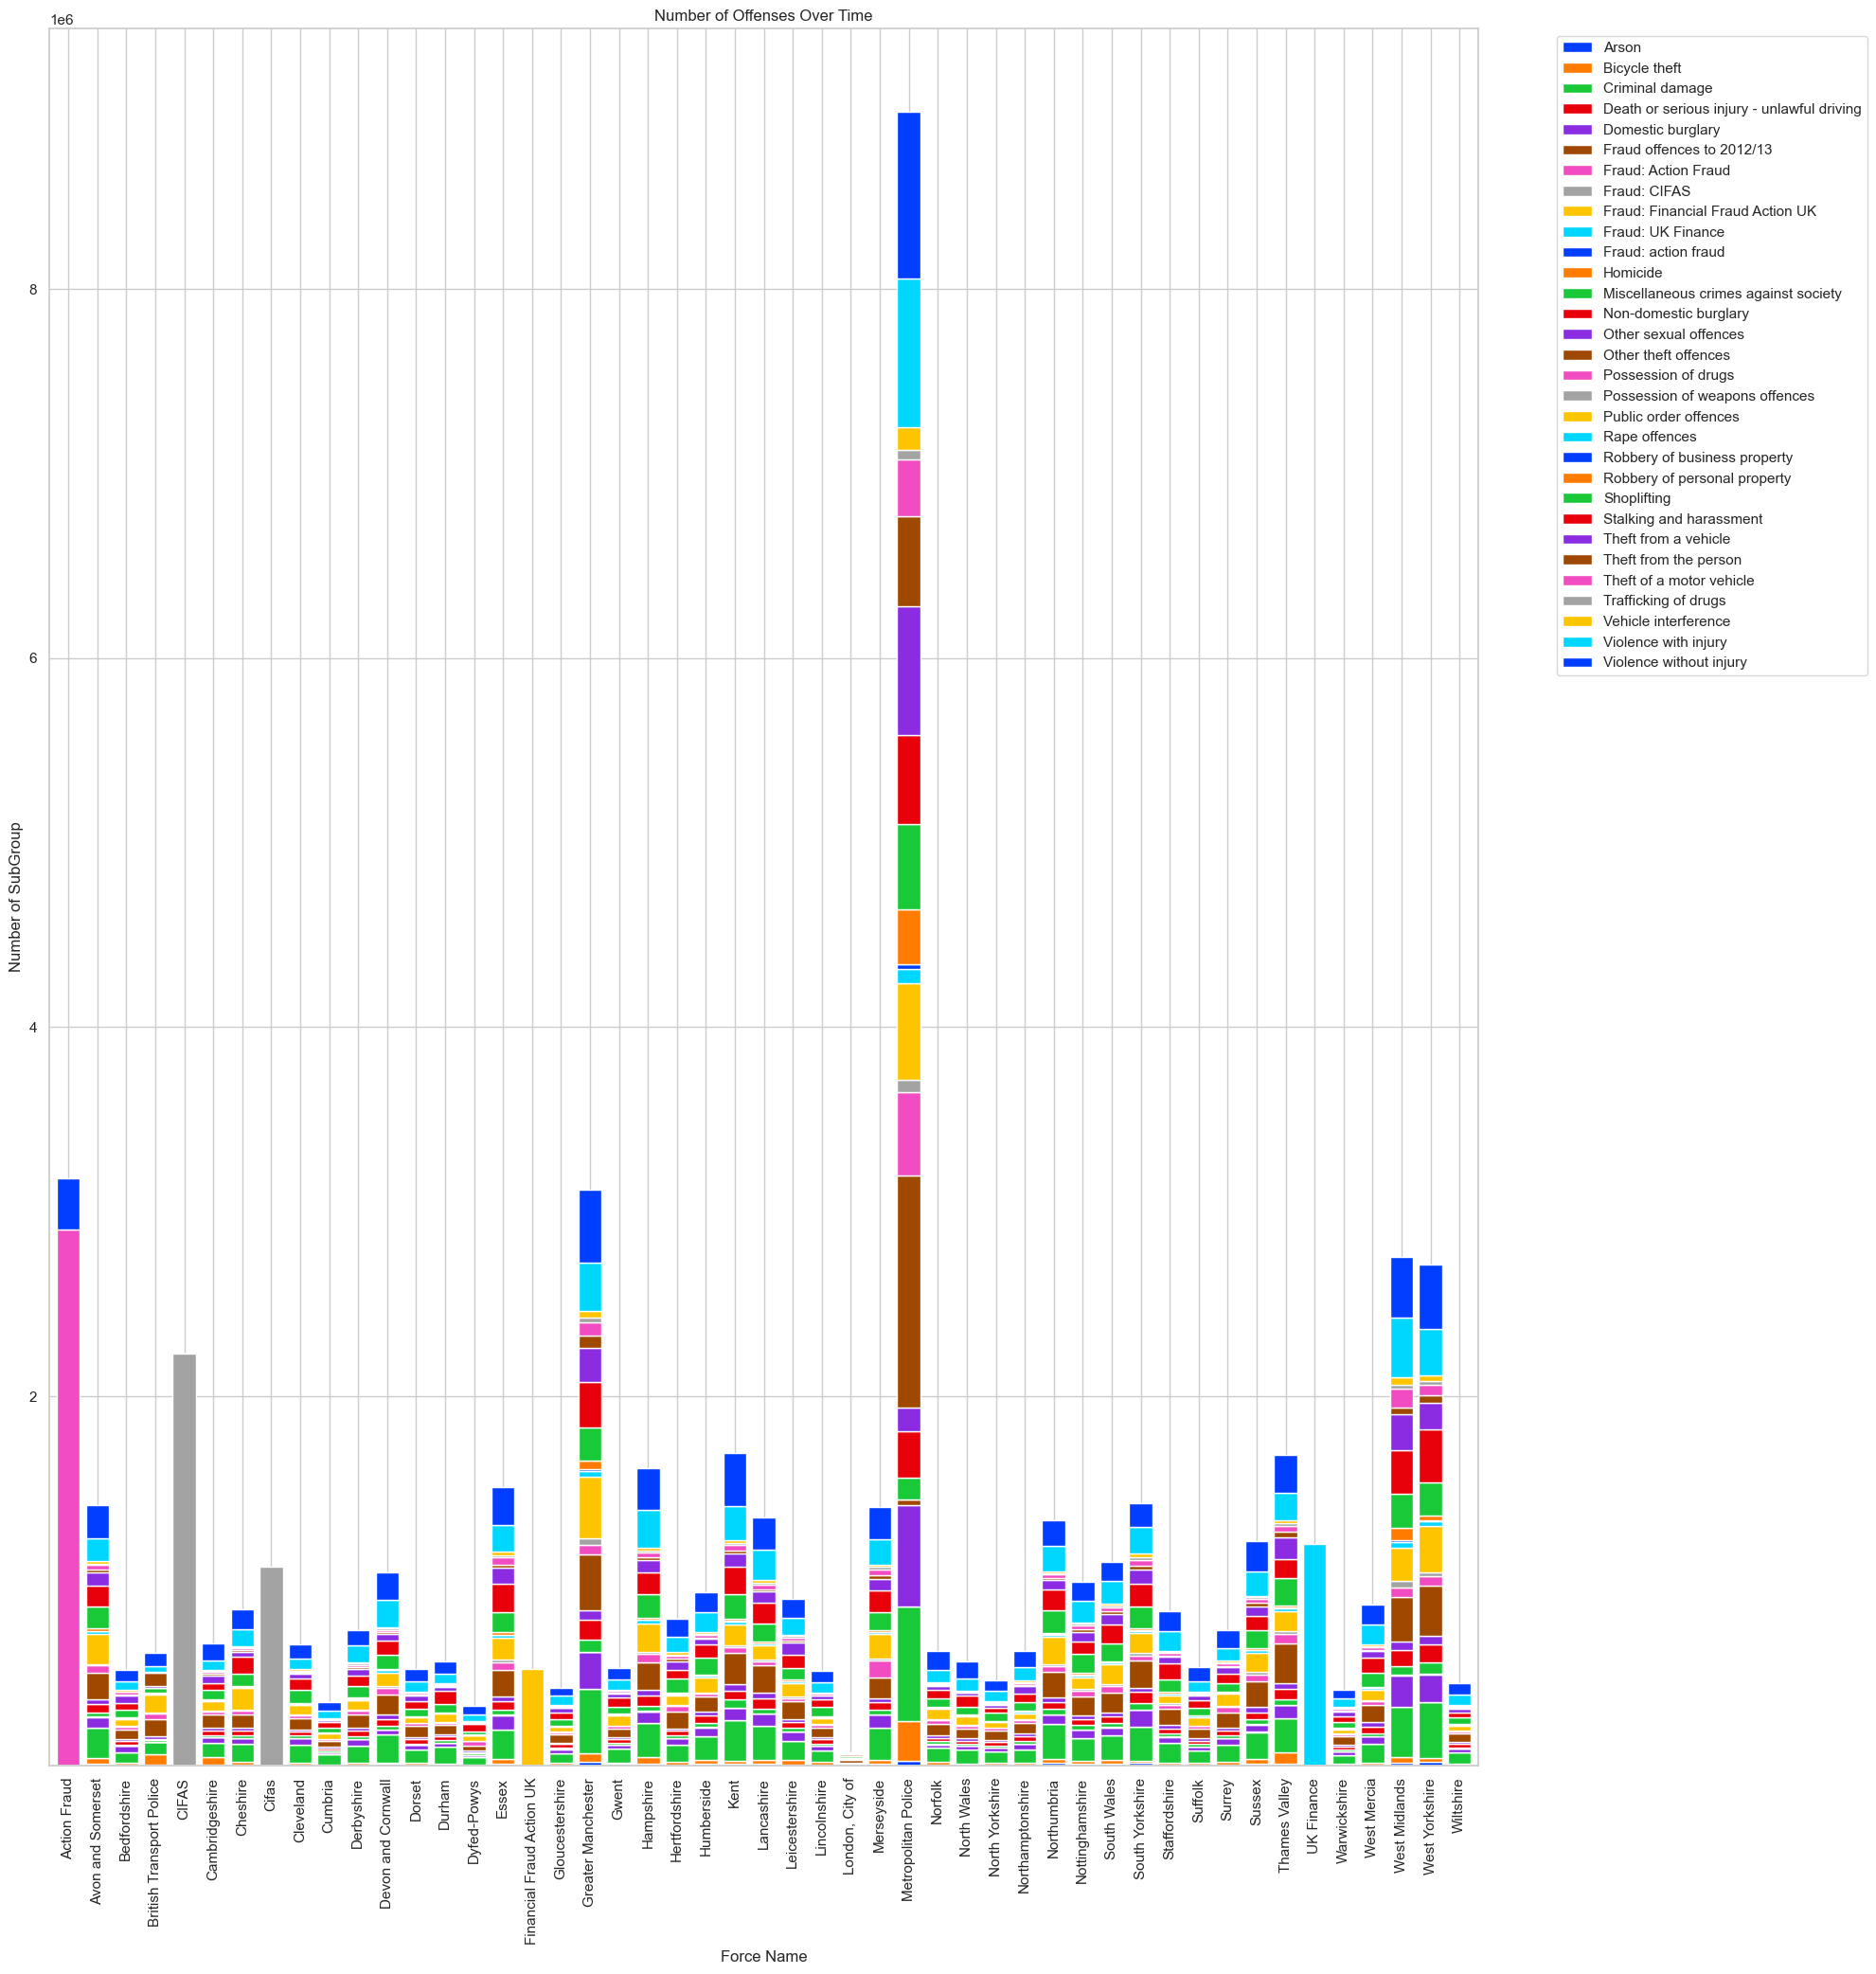

In [364]:
sns.set(style="whitegrid", palette="bright")

# Plot the pivot table as a bar plot
fig, ax = plt.subplots(figsize=(20, 21))
Sub_Offence_pivot_table.plot(kind='bar', x = 'Force Name', stacked=True, ax=ax, width=0.8)

# Set plot title and labels
plt.title('Number of Offenses Over Time')
plt.xlabel('Force Name')
plt.xticks(rotation=90)
plt.ylabel('Number of SubGroup')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [372]:

col = Sub_Offence_pivot_table.select_dtypes(include='number' ).columns
OffenceSubGroup_sum = pd.DataFrame(Sub_Offence_pivot_table[col].sum()).reset_index()
OffenceSubGroup_sum

Offence Subgroup          0
0                                        Arson   266425.0
1                                Bicycle theft  1006616.0
2                              Criminal damage  5774253.0
3   Death or serious injury - unlawful driving     8171.0
4                            Domestic burglary  2532329.0
5                    Fraud offences to 2012/13    62489.0
6                          Fraud: Action Fraud  2906085.0
7                                 Fraud: CIFAS  3308309.0
8             Fraud: Financial Fraud Action UK   523390.0
9                            Fraud: UK Finance  1200608.0
10                         Fraud: action fraud   277033.0
11                                    Homicide     7043.0
12        Miscellaneous crimes against society   964455.0
13                       Non-domestic burglary  1708852.0
14                       Other sexual offences   972081.0
15                        Other theft offences  5557466.0
16                         Possession of drugs  1586349.0
17              Possession of weapons offences   419491.0
18                       Public order offences  4029186.0
19                               Rape offences   530342.0
20                Robbery of business property    74246.0
21                Robbery of personal property   684450.0
22                                 Shoplifting  3722933.0
23                     Stalking and harassment  3987325.0
24                        Theft from a vehicle  2802551.0
25                       Theft from the person  1055052.0
26                    Theft of a motor vehicle  1135026.0
27                        Trafficking of drugs   370161.0
28                        Vehicle interference   533750.0
29                        Violence with injury  5268910.0
30                     Violence without injury  6247358.0

In [373]:
sns.barplot(data = OffenceSubGroup_sum, x = 'Offence Subgroup', y = 0  )
plt.title(' SUB Offence group count')
plt.xlabel('Sub Offense Group')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.show()

# Modelling

In [489]:

def classify_offense(num_offences):
    if num_offences > total_yearly_Force_offense['Number of Offences'].quantile(0.75):
        return 'High'
    elif num_offences > total_yearly_Force_offense['Number of Offences'].quantile(0.5):
        return 'Medium'
    else:
        return 'Low'

# Apply the function to create the 'High Crime Force' column
total_yearly_Force_offense['Crime Force Rate'] = total_yearly_Force_offense['Number of Offences'].apply(classify_offense)


total_yearly_Force_offense

Financial Year                Force Name  Number of Offences  \
0          2012/13              Action Fraud              117402   
1          2012/13         Avon and Somerset               99355   
2          2012/13              Bedfordshire               35678   
3          2012/13  British Transport Police               52189   
4          2012/13                     CIFAS              217369   
..             ...                       ...                 ...   
560        2023/24              Warwickshire               10341   
561        2023/24               West Mercia               23370   
562        2023/24             West Midlands               87016   
563        2023/24            West Yorkshire               79361   
564        2023/24                 Wiltshire               10585   

    Crime Force Rate  
0               High  
1             Medium  
2                Low  
3                Low  
4               High  
..               ...  
560              Low  
561              Low  
562           Medium  
563           Medium  
564              Low  

[565 rows x 4 columns]

In [495]:
Rate_Value = total_yearly_Force_offense['Crime Force Rate'].value_counts()
Rate_Value =  pd.DataFrame(Rate_Value).reset_index()
Rate_Value.columns = ['Crime Force Rate', 'Counts']
Rate_Value


Crime Force Rate  Counts
0              Low     283
1             High     141
2           Medium     141

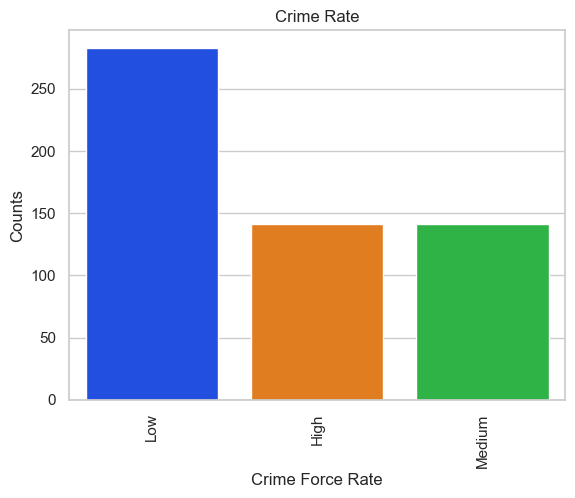

In [496]:
sns.barplot(data = Rate_Value, x = 'Crime Force Rate', y = 'Counts' )
plt.title('Crime Rate')
plt.xlabel('Crime Force Rate')
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.show()

In [412]:
total_yearly_Force_offense["Crime Force Rate"] =total_yearly_Force_offense["Crime Force Rate"].replace({"High": 2, "Medium": 1, "Low": 0})

total_yearly_Force_offense

Financial Year                Force Name  Number of Offences  \
0          2012/13              Action Fraud              117402   
1          2012/13         Avon and Somerset               99355   
2          2012/13              Bedfordshire               35678   
3          2012/13  British Transport Police               52189   
4          2012/13                     CIFAS              217369   
..             ...                       ...                 ...   
560        2023/24              Warwickshire               10341   
561        2023/24               West Mercia               23370   
562        2023/24             West Midlands               87016   
563        2023/24            West Yorkshire               79361   
564        2023/24                 Wiltshire               10585   

     Crime Force Rate  
0                   2  
1                   1  
2                   0  
3                   0  
4                   2  
..                ...  
560                 0  
561                 0  
562                 1  
563                 1  
564                 0  

[565 rows x 4 columns]

In [418]:
cat_columns = total_yearly_Force_offense.select_dtypes(exclude = 'number').columns
df = pd.get_dummies(total_yearly_Force_offense, columns = cat_columns)
df

Number of Offences  Crime Force Rate  Financial Year_2012/13  \
0                117402                 2                       1   
1                 99355                 1                       1   
2                 35678                 0                       1   
3                 52189                 0                       1   
4                217369                 2                       1   
..                  ...               ...                     ...   
560               10341                 0                       0   
561               23370                 0                       0   
562               87016                 1                       0   
563               79361                 1                       0   
564               10585                 0                       0   

     Financial Year_2013/14  Financial Year_2014/15  Financial Year_2015/16  \
0                         0                       0                       0   
1                         0                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         0                       0                       0   
..                      ...                     ...                     ...   
560                       0                       0                       0   
561                       0                       0                       0   
562                       0                       0                       0   
563                       0                       0                       0   
564                       0                       0                       0   

     Financial Year_2016/17  Financial Year_2017/18  Financial Year_2018/19  \
0                         0                       0                       0   
1                         0                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         0                       0                       0   
..                      ...                     ...                     ...   
560                       0                       0                       0   
561                       0                       0                       0   
562                       0                       0                       0   
563                       0                       0                       0   
564                       0                       0                       0   

     Financial Year_2019/20  ...  Force Name_Suffolk  Force Name_Surrey  \
0                         0  ...                   0                  0   
1                         0  ...                   0                  0   
2                         0  ...                   0                  0   
3                         0  ...                   0                  0   
4                         0  ...                   0                  0   
..                      ...  ...                 ...                ...   
560                       0  ...                   0                  0   
561                       0  ...                   0                  0   
562                       0  ...                   0                  0   
563                       0  ...                   0                  0   
564                       0  ...                   0                  0   

     Force Name_Sussex  Force Name_Thames Valley  Force Name_UK Finance  \
0                    0                         0                      0   
1                    0                         0                      0   
2                    0                         0                      0   
3                    0                         0                      0   
4 

In [419]:
X = df.drop('Crime Force Rate', axis = 1)
y =df['Crime Force Rate']

In [417]:
y

0      2
1      1
2      0
3      0
4      2
      ..
560    0
561    0
562    1
563    1
564    0
Name: Crime Force Rate, Length: 565, dtype: int64

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)

In [430]:
DecTre = DecisionTreeClassifier()
DecTre_Model = DecTre.fit(X_train, y_train)
DecTre_Model.score(X_test, y_test)

1.0

In [435]:
y_predict2 = DecTre_Model.predict(X_test)
y_predict2 = pd.DataFrame(y_predict2, columns=['Predicted Output'])
results2 = pd.concat([y_predict2, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index =False)

In [437]:
results2


Predicted Output  Crime Force Rate
0                   0                 0
1                   0                 0
2                   0                 0
3                   0                 0
4                   0                 0
..                ...               ...
221                 0                 0
222                 1                 1
223                 2                 2
224                 1                 1
225                 0                 0

[226 rows x 2 columns]

In [498]:
KNN =KNeighborsClassifier(n_neighbors =5)
KNN_Model = KNN.fit(X_train, y_train)
KNN_Model.score(X_test, y_test)

0.995575221238938

In [499]:
y_predict3 = KNN_Model.predict(X_test)
y_predict3 = pd.DataFrame(y_predict3, columns=['Predicted Output'])
results3 = pd.concat([y_predict3, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index =False)
results3

Predicted Output  Crime Force Rate
0                   0                 0
1                   0                 0
2                   0                 0
3                   0                 0
4                   0                 0
..                ...               ...
221                 0                 0
222                 1                 1
223                 2                 2
224                 1                 1
225                 0                 0

[226 rows x 2 columns]

In [456]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        55

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



In [500]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       115
           1       1.00      0.98      0.99        56
           2       1.00      1.00      1.00        55

    accuracy                           1.00       226
   macro avg       1.00      0.99      1.00       226
weighted avg       1.00      1.00      1.00       226

